# Import data from CSV

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats 
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/IS_Pongthanin/Project/Data Set/'
file1 = path + 'olist_customers_dataset.csv'
file2 = path + 'olist_geolocation_dataset.csv'
file3 = path + 'olist_order_items_dataset.csv'
file4 = path + 'olist_order_payments_dataset.csv'
file5 = path + 'olist_order_reviews_dataset.csv'
file6 = path + 'olist_orders_dataset.csv'
file7 = path + 'olist_products_dataset.csv'
file8 = path + 'olist_sellers_dataset.csv'
file9 = path + 'product_category_name_translation.csv'

In [4]:
df_customers = pd.read_csv(file1)
df_geolocation = pd.read_csv(file2)
df_item = pd.read_csv(file3)
df_order_pay = pd.read_csv(file4)
df_reviews = pd.read_csv(file5)
df_orders = pd.read_csv(file6)
df_products = pd.read_csv(file7)
df_sellers = pd.read_csv(file8)
df_category = pd.read_csv(file9)

# Data preparation & reviewing each table

## 1. Customer Table (olist_customers_dataset)

In [5]:
df_customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [6]:
#Check table shape
print("Customers Table contains", df_customers.shape[0], "rows and", df_customers.shape[1], "columns.")

Customers Table contains 99441 rows and 5 columns.


In [7]:
# checking for missing values
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
#Checking data type
#data.dtypes
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
#show unique values in customer_zip_code_prefix column
#df_customers['customer_zip_code_prefix'].value_counts()
df_customers['customer_zip_code_prefix'].unique()

array([14409,  9790,  1151, ...,  5538, 74980, 99043])

In [10]:
#Convert data type of "customer_zip_code_prefix,customer_state,customer_city" to category type

df_customers['customer_zip_code_prefix'] = df_customers['customer_zip_code_prefix'].astype('category')
df_customers['customer_state'] = df_customers['customer_state'].astype('category')
df_customers['customer_city'] = df_customers['customer_city'].astype('category')

In [11]:
df_customers['customer_zip_code_prefix'].unique()

[14409, 9790, 1151, 8775, 13056, ..., 87145, 98860, 5538, 74980, 99043]
Length: 14994
Categories (14994, int64): [1003, 1004, 1005, 1006, ..., 99965, 99970, 99980, 99990]

In [12]:
# show basic statistic
df_customers.describe()

customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

        customer_zip_code_prefix customer_city customer_state  
count                      99441         99441          99441  
unique                     14994          4119             27  
top                        22790     sao paulo             SP  
freq                         142         15540          41746

In [13]:
# dropping columns with unnecessary column
df_customers = df_customers.drop(columns=['customer_unique_id'])

In [14]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   customer_id               99441 non-null  object  
 1   customer_zip_code_prefix  99441 non-null  category
 2   customer_city             99441 non-null  category
 3   customer_state            99441 non-null  category
dtypes: category(3), object(1)
memory usage: 2.0+ MB


In [15]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_customers.duplicated(keep=False).sum()

0

In [16]:
# show basic statistic
df_customers.describe()

customer_id  customer_zip_code_prefix  \
count                              99441                     99441   
unique                             99441                     14994   
top     06b8999e2fba1a1fbc88172c00ba8bc7                     22790   
freq                                   1                       142   

       customer_city customer_state  
count          99441          99441  
unique          4119             27  
top        sao paulo             SP  
freq           15540          41746

In [17]:
#To select pandas categorical columns, use 'category' # พยายามเน้นที่เป็นตัวหนังสือก่อน
#The top is the most common value. 
#The freq is the most common value’s frequency.
df_customers.describe(include=['category'])

customer_zip_code_prefix customer_city customer_state
count                      99441         99441          99441
unique                     14994          4119             27
top                        22790     sao paulo             SP
freq                         142         15540          41746

Text(0, 0.5, 'No. of Customers')

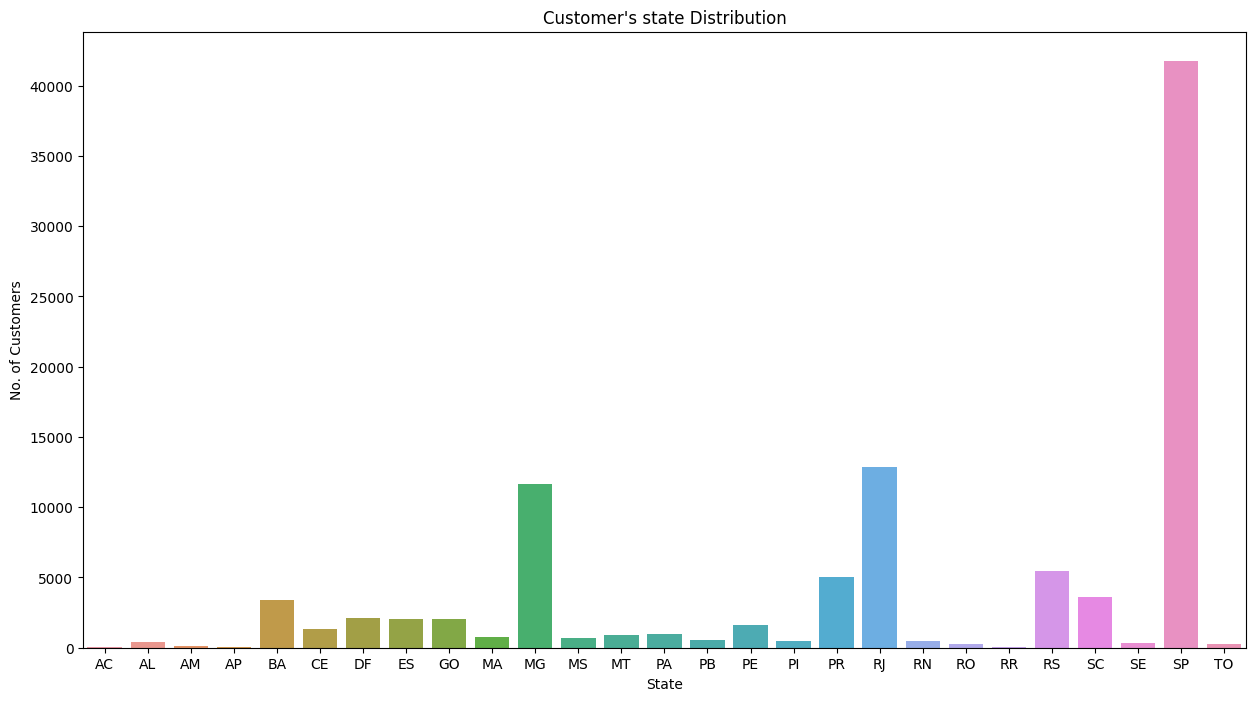

In [18]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df_customers)
plt.title("""Customer's state Distribution""")
plt.xlabel('State')
plt.ylabel('No. of Customers')

In [19]:
df_customers.head()

customer_id customer_zip_code_prefix  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                    14409   
1  18955e83d337fd6b2def6b18a428ac77                     9790   
2  4e7b3e00288586ebd08712fdd0374a03                     1151   
3  b2b6027bc5c5109e529d4dc6358b12c3                     8775   
4  4f2d8ab171c80ec8364f7c12e35b23ad                    13056   

           customer_city customer_state  
0                 franca             SP  
1  sao bernardo do campo             SP  
2              sao paulo             SP  
3        mogi das cruzes             SP  
4               campinas             SP

## 2. Geo Table (olist_geolocation_dataset)

In [20]:
# viewing the first 5 rows of the dataset
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [21]:
#Checking shape of geolocation table
print("Geolocation Table contains", df_geolocation.shape[0], "rows and", df_geolocation.shape[1], "columns.")

Geolocation Table contains 1000163 rows and 5 columns.


In [22]:
#Check null
df_geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [23]:
#Checking data type
#ตรวจชนิดของข้อมูล
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [24]:
#Convert data type of "geolocation_zip_code_prefix,geolocation_state,geolocation_city" to category type
df_geolocation['geolocation_zip_code_prefix'] = df_geolocation['geolocation_zip_code_prefix'].astype('category')
df_geolocation['geolocation_state'] = df_geolocation['geolocation_state'].astype('category')
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].astype('category')

In [25]:
df_geolocation['geolocation_city'].unique()

['sao paulo', 'são paulo', 'sao bernardo do campo', 'jundiaí', 'taboão da serra', ..., 'ibiaçá', 'santa cecilia do sul', 'ciríaco', 'estação', 'vila lângaro']
Length: 8011
Categories (8011, object): ['* cidade', '...arraial do cabo', '4o. centenario', '4º centenario',
                            ..., 'ângulo', 'érico cardoso', 'óbidos', 'óleo']

In [26]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_geolocation.duplicated(keep=False).sum()

390005

In [27]:
#Show duplicate row 
df_geolocation[df_geolocation.duplicated(keep=False)]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037       -23.545621       -46.639292   
1                              1046       -23.546081       -46.644820   
2                              1046       -23.546129       -46.642951   
6                              1047       -23.546273       -46.641225   
7                              1013       -23.546923       -46.634264   
...                             ...              ...              ...   
1000153                       99970       -28.343273       -51.873734   
1000154                       99950       -28.070493       -52.011342   
1000159                       99900       -27.877125       -52.224882   
1000160                       99950       -28.071855       -52.014716   
1000162                       99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
6              sao paulo                SP  
7              sao paulo                SP  
...                  ...               ...  
1000153          ciriaco                RS  
1000154         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000162         tapejara                RS  

[390005 rows x 5 columns]

In [28]:
#drop the duplicate row
df_geolocation.drop_duplicates(inplace=True)

In [29]:
df_geolocation.shape

(738332, 5)

In [30]:
df_geolocation.duplicated(keep=False).sum()

0

In [31]:
df_geolocation.describe()

geolocation_lat  geolocation_lng
count    738332.000000    738332.000000
mean        -20.998353       -46.461098
std           5.892315         4.393705
min         -36.605374      -101.466766
25%         -23.603061       -48.867822
50%         -22.873588       -46.647278
75%         -19.923336       -43.836974
max          45.065933       121.105394

In [32]:
df_geolocation.describe(include=['category'])

geolocation_zip_code_prefix geolocation_city geolocation_state
count                        738332           738332            738332
unique                        19015             8011                27
top                           38400        sao paulo                SP
freq                            779            79927            285976

In [33]:
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        1037       -23.545621       -46.639292   
1                        1046       -23.546081       -46.644820   
2                        1046       -23.546129       -46.642951   
3                        1041       -23.544392       -46.639499   
4                        1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

Text(0, 0.5, 'No. of record in each state')

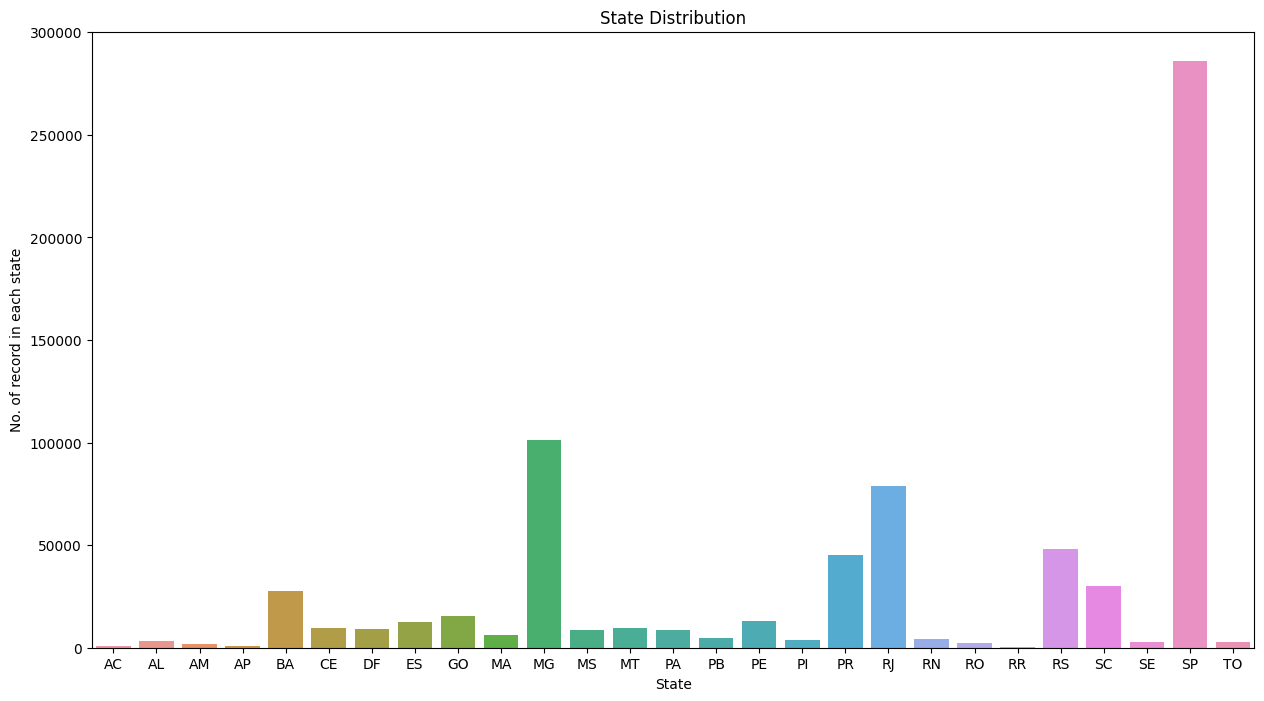

In [34]:
# plotting state distribution
plt.figure(figsize=(15,8))
sns.countplot(x='geolocation_state', data=df_geolocation)
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('No. of record in each state')

In [35]:
# viewing the first 5 rows of the dataset
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                        1037       -23.545621       -46.639292   
1                        1046       -23.546081       -46.644820   
2                        1046       -23.546129       -46.642951   
3                        1041       -23.544392       -46.639499   
4                        1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

##3. Item Table (olist_order_items_dataset)

In [36]:
# viewing the first 5 rows of the dataset
df_item.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [37]:
df_item.shape

(112650, 7)

In [38]:
df_item.groupby([df_item['order_id'],'product_id']).sum().reset_index()

<ipython-input-38-d7e1e943777a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_item.groupby([df_item['order_id'],'product_id']).sum().reset_index()


order_id                        product_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  4244733e06e7ecb4970a6e2683c13e61   
1       00018f77f2f0320c557190d7a144bdd3  e5f2d52b802189ee658865ca93d83a8f   
2       000229ec398224ef6ca0657da4fc703e  c777355d18b72b67abbeef9df44fd0fd   
3       00024acbcdf0a6daa1e931b038114c75  7634da152a4610f1595efa32f14722fc   
4       00042b26cf59d7ce69dfabb4e55b4fd9  ac6c3623068f30de03045865e4e10089   
...                                  ...                               ...   
102420  fffc94f6ce00a00581880bf54a75a037  4aa6014eceb682077f9dc4bffebc05b0   
102421  fffcd46ef2263f404302a634eb57f7eb  32e07fd915822b0765e448c4dd74c828   
102422  fffce4705a9662cd70adb13d4a31832d  72a30483855e2eafc67aee5dc2560482   
102423  fffe18544ffabc95dfada21779c9644f  9c422a519119dcad7575db5af1ba540e   
102424  fffe41c64501cc87c801fd61db3f6244  350688d9dc1e75ff97be326363655e01   

        order_item_id   price  freight_value  
0                   1   58.90          13.29  
1                   1  239.90          19.93  
2                   1  199.00          17.87  
3                   1   12.99          12.79  
4                   1  199.90          18.14  
...               ...     ...            ...  
102420              1  299.99          43.41  
102421              1  350.00          36.53  
102422              1   99.90          16.95  
102423              1   55.99           8.72  
102424              1   43.00          12.79  

[102425 rows x 5 columns]

In [39]:
#Calculate total price & fright_value by combining order_id
df_item_group=df_item.groupby([df_item['order_id'],'seller_id','product_id','shipping_limit_date']).sum().reset_index()

In [40]:
df_item_group.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3  00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4  00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   

                         product_id  shipping_limit_date  order_item_id  \
0  4244733e06e7ecb4970a6e2683c13e61  2017-09-19 09:45:35              1   
1  e5f2d52b802189ee658865ca93d83a8f  2017-05-03 11:05:13              1   
2  c777355d18b72b67abbeef9df44fd0fd  2018-01-18 14:48:30              1   
3  7634da152a4610f1595efa32f14722fc  2018-08-15 10:10:18              1   
4  ac6c3623068f30de03045865e4e10089  2017-02-13 13:57:51              1   

    price  freight_value  
0   58.90          13.29  
1  239.90          19.93  
2  199.00          17.87  
3   12.99          12.79  
4  199.90          18.14

In [41]:
df_item_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             102425 non-null  object 
 1   seller_id            102425 non-null  object 
 2   product_id           102425 non-null  object 
 3   shipping_limit_date  102425 non-null  object 
 4   order_item_id        102425 non-null  int64  
 5   price                102425 non-null  float64
 6   freight_value        102425 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.5+ MB


In [42]:
#Change shipping limit date from "Object" to "date time"
df_item_group["shipping_limit_date"] = pd.to_datetime(df_item_group["shipping_limit_date"], format='%Y-%m-%d %H:%M:%S')

In [43]:
df_item_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102425 entries, 0 to 102424
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             102425 non-null  object        
 1   seller_id            102425 non-null  object        
 2   product_id           102425 non-null  object        
 3   shipping_limit_date  102425 non-null  datetime64[ns]
 4   order_item_id        102425 non-null  int64         
 5   price                102425 non-null  float64       
 6   freight_value        102425 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.5+ MB


In [44]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_item_group.duplicated(keep=False).sum()

0

In [45]:
# checking for missing values
df_item_group.isnull().sum()

order_id               0
seller_id              0
product_id             0
shipping_limit_date    0
order_item_id          0
price                  0
freight_value          0
dtype: int64

In [46]:
df_item_group.describe()

order_item_id          price  freight_value
count  102425.000000  102425.000000  102425.000000
mean        1.317413     132.698498      21.985936
std         1.996990     205.308847      20.464659
min         1.000000       0.850000       0.000000
25%         1.000000      44.900000      13.520000
50%         1.000000      81.000000      16.850000
75%         1.000000     147.900000      23.260000
max       210.000000   13440.000000    1794.960000

In [47]:
df_item_group.describe(include=['object'])

order_id                         seller_id  \
count                             102425                            102425   
unique                             98666                              3095   
top     ca3625898fbd48669d50701aba51cd5f  6560211a19b47992c3666cc44a7e94c0   
freq                                   8                              1982   

                              product_id  
count                             102425  
unique                             32951  
top     99a4788cb24856965c36a24e339b6058  
freq                                 467

In [48]:
df_item_group[df_item_group['freight_value']==0]

order_id                         seller_id  \
104     00404fa7a687c8c44ca69d42695aae73  7d13fca15225358621be4086e1eb0964   
237     00a870c6c06346e85335524935c600c0  955fee9216a65b617aa5c0531780ce60   
436     011c899816ea29773525bd3322dbb6aa  7d13fca15225358621be4086e1eb0964   
460     012b3f6ab7776a8ab3443a4ad7bef2e6  1f50f920176fa81dab994f9023523100   
1622    04105b54650921ca3246f52e6f175f46  955fee9216a65b617aa5c0531780ce60   
...                                  ...                               ...   
100988  fc698f330ec7fb74859071cc6cb29772  1f50f920176fa81dab994f9023523100   
101354  fd4907109f6bac23f07064af84bec02d  4869f7a5dfa277a7dca6462dcf3b52b2   
101493  fd95e4b85ebbb81853d4a6be3d61432b  4869f7a5dfa277a7dca6462dcf3b52b2   
101992  fee19a0dc7358b6962a611cecf6a37b4  37be5a7c751166fbc5f8ccba4119e043   
102388  ffe73fc1d73e03fdb50e63903ddfe882  4869f7a5dfa277a7dca6462dcf3b52b2   

                              product_id shipping_limit_date  order_item_id  \
104     53b36df67ebb7c41585e8d54d6772e08 2018-05-15 04:31:26              1   
237     aca2eb7d00ea1a7b8ebd4e68314663af 2018-05-14 00:14:29              1   
436     53b36df67ebb7c41585e8d54d6772e08 2018-05-07 05:30:45              1   
460     422879e10f46682990de24d770e7f83d 2018-05-09 21:30:50              3   
1622    aca2eb7d00ea1a7b8ebd4e68314663af 2018-04-27 09:31:35              1   
...                                  ...                 ...            ...   
100988  422879e10f46682990de24d770e7f83d 2018-04-25 02:31:57              1   
101354  7a10781637204d8d10485c71a6108a2e 2018-04-30 11:31:32              1   
101493  53b36df67ebb7c41585e8d54d6772e08 2018-05-04 11:10:31              1   
101992  f1c7f353075ce59d8a6f3cf58f419c9c 2017-09-07 22:06:31              1   
102388  53b36df67ebb7c41585e8d54d6772e08 2018-04-23 13:15:15              1   

        price  freight_value  
104      99.9            0.0  
237      69.9            0.0  
436      99.9            0.0  
460     107.8            0.0  
1622     69.9            0.0  
...       ...            ...  
100988   53.9            0.0  
101354  219.0            0.0  
101493  106.9            0.0  
101992  195.0            0.0  
102388  112.9            0.0  

[339 rows x 7 columns]

In [49]:
df_item_group.describe(include=['object'])

order_id                         seller_id  \
count                             102425                            102425   
unique                             98666                              3095   
top     ca3625898fbd48669d50701aba51cd5f  6560211a19b47992c3666cc44a7e94c0   
freq                                   8                              1982   

                              product_id  
count                             102425  
unique                             32951  
top     99a4788cb24856965c36a24e339b6058  
freq                                 467

In [50]:
df_item_group[df_item_group['order_id']=='ca3625898fbd48669d50701aba51cd5f']

order_id                         seller_id  \
80867  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80868  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80869  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80870  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80871  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80872  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
80873  ca3625898fbd48669d50701aba51cd5f  888faa8bfb0b159c37de6d898b961c31   
80874  ca3625898fbd48669d50701aba51cd5f  888faa8bfb0b159c37de6d898b961c31   

                             product_id shipping_limit_date  order_item_id  \
80867  0cf2faf9749f53924cea652a09d8e327 2018-08-16 02:25:07              2   
80868  0de59eddc63167215c972b0d785ffa7b 2018-08-16 02:25:07              7   
80869  1065e0ebef073787a7bf691924c60eeb 2018-08-16 02:25:07              1   
80870  21b524c4c060169fa75ccf08c7da4627 2018-08-16 02:25:07              8   
80871  309dd69eb83cea38c51709d62befe1a4 2018-08-16 02:25:07             19   
80872  4a5c3967bfd3629fe07ef4d0cc8c3818 2018-08-16 02:25:07              6   
80873  5dae498eff2d80057f56122235a36aff 2018-08-17 02:25:07              5   
80874  678c229b41c0e497d35a25a8be1cc631 2018-08-17 02:25:07              7   

       price  freight_value  
80867   33.9           1.84  
80868  318.0           7.34  
80869  309.0           1.84  
80870   63.7           0.15  
80871  112.0           7.36  
80872  109.9           0.15  
80873   95.9           0.15  
80874   95.9           0.15

Text(0.5, 0, 'Price')

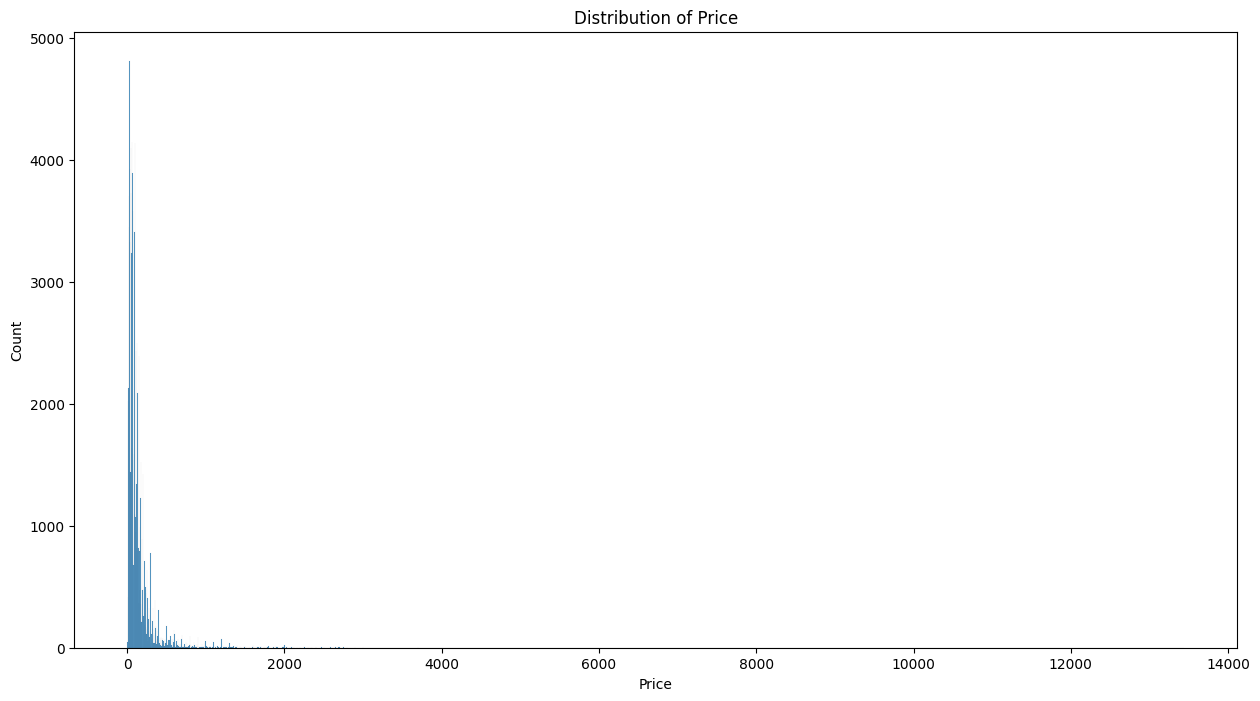

In [51]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=df_item_group)
plt.title('Distribution of Price')
plt.xlabel('Price')

Text(0.5, 0, 'Freight Value')

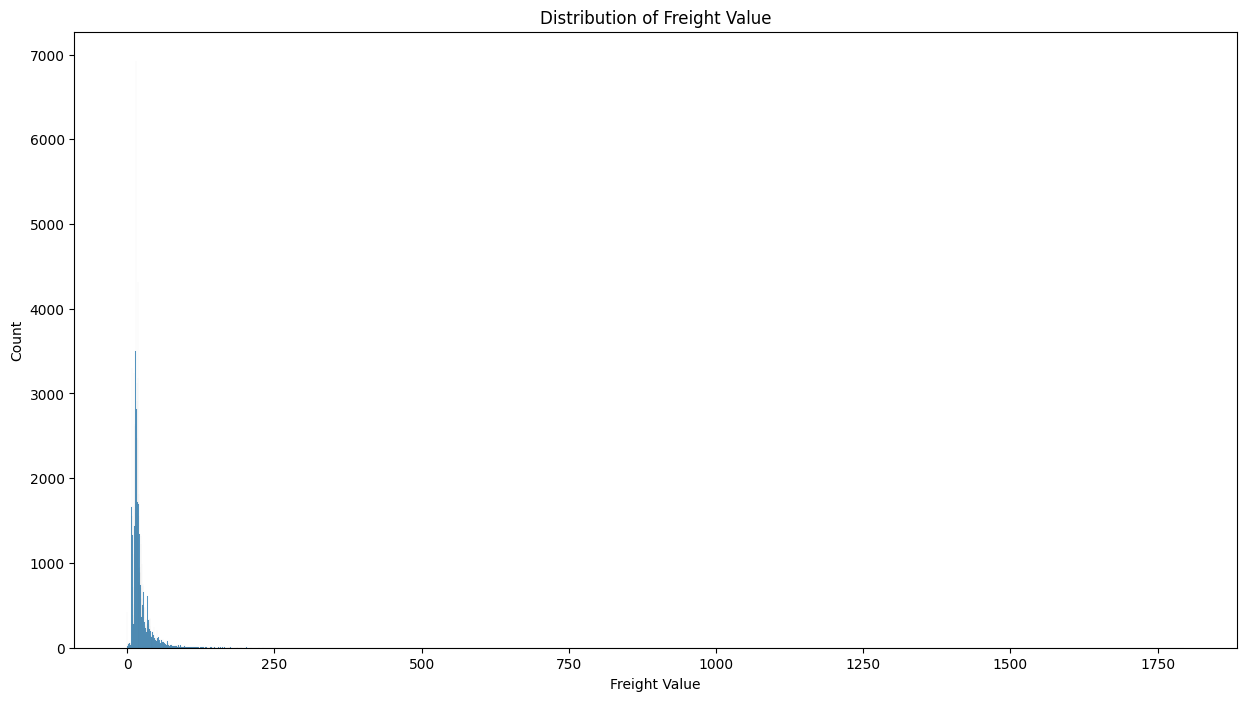

In [52]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=df_item_group)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')

In [53]:
# viewing the first 5 rows of the dataset
df_item_group.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
2  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
3  00024acbcdf0a6daa1e931b038114c75  9d7a1d34a5052409006425275ba1c2b4   
4  00042b26cf59d7ce69dfabb4e55b4fd9  df560393f3a51e74553ab94004ba5c87   

                         product_id shipping_limit_date  order_item_id  \
0  4244733e06e7ecb4970a6e2683c13e61 2017-09-19 09:45:35              1   
1  e5f2d52b802189ee658865ca93d83a8f 2017-05-03 11:05:13              1   
2  c777355d18b72b67abbeef9df44fd0fd 2018-01-18 14:48:30              1   
3  7634da152a4610f1595efa32f14722fc 2018-08-15 10:10:18              1   
4  ac6c3623068f30de03045865e4e10089 2017-02-13 13:57:51              1   

    price  freight_value  
0   58.90          13.29  
1  239.90          19.93  
2  199.00          17.87  
3   12.99          12.79  
4  199.90          18.14

##4. Payment Table (olist_order_payments_dataset)

In [54]:
# viewing the first 5 rows of the dataset
df_order_pay.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [55]:
# checking for missing values
df_order_pay.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [56]:
df_order_pay.shape

(103886, 5)

In [57]:
#Calculate total payment_value by combining order_id
df_order_pay_group=df_order_pay.groupby([df_order_pay['order_id'],'payment_type'])['payment_value'].sum().reset_index()

In [58]:
df_order_pay_group.head()

order_id payment_type  payment_value
0  00010242fe8c5a6d1ba2dd792cb16214  credit_card          72.19
1  00018f77f2f0320c557190d7a144bdd3  credit_card         259.83
2  000229ec398224ef6ca0657da4fc703e  credit_card         216.87
3  00024acbcdf0a6daa1e931b038114c75  credit_card          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9  credit_card         218.04

In [59]:
df_order_pay_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101686 entries, 0 to 101685
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       101686 non-null  object 
 1   payment_type   101686 non-null  object 
 2   payment_value  101686 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [60]:
df_order_pay_group['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [61]:
df_order_pay_group['payment_type'] = df_order_pay_group['payment_type'].astype('category')

In [62]:
df_order_pay_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101686 entries, 0 to 101685
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   order_id       101686 non-null  object  
 1   payment_type   101686 non-null  category
 2   payment_value  101686 non-null  float64 
dtypes: category(1), float64(1), object(1)
memory usage: 1.6+ MB


In [63]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_order_pay_group.duplicated(keep=False).sum()

0

In [64]:
df_order_pay_group.describe()

payment_value
count  101686.000000
mean      157.434378
std       219.880693
min         0.000000
25%        59.220000
50%       102.315000
75%       174.015000
max     13664.080000

In [65]:
df_order_pay_group.describe(include=['category'])

payment_type
count        101686
unique            5
top     credit_card
freq          76505

In [66]:
df_order_pay_group.describe(include=['object'])

order_id
count                             101686
unique                             99440
top     d6e320ab3eb91f810c2a3296998bdcc8
freq                                   2

In [67]:
df_order_pay_group[df_order_pay_group['order_id']=='d6e320ab3eb91f810c2a3296998bdcc8']

order_id payment_type  payment_value
85459  d6e320ab3eb91f810c2a3296998bdcc8  credit_card          96.61
85460  d6e320ab3eb91f810c2a3296998bdcc8      voucher          42.04

Text(0, 0.5, 'No. of Customers')

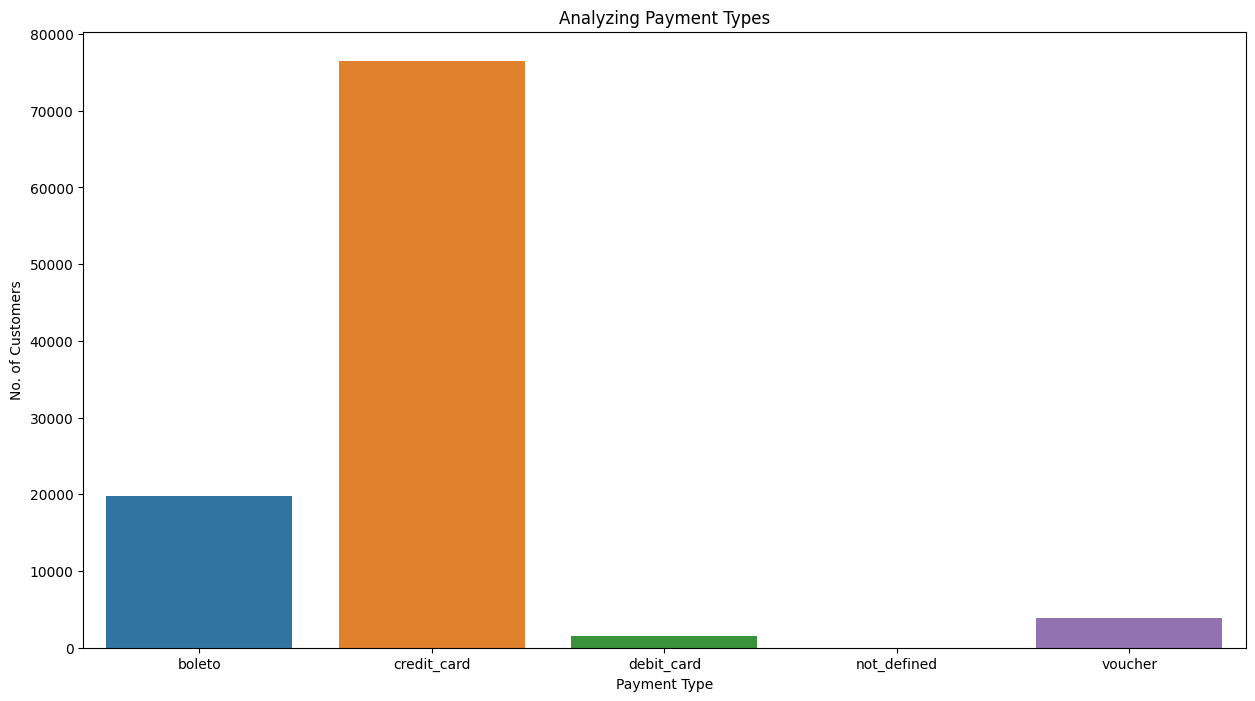

In [68]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=df_order_pay_group)
plt.title('Analyzing Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('No. of Customers')

In [69]:
df_order_pay_group['payment_type'].value_counts()

credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: payment_type, dtype: int64

Text(0, 0.5, 'No. of Orders')

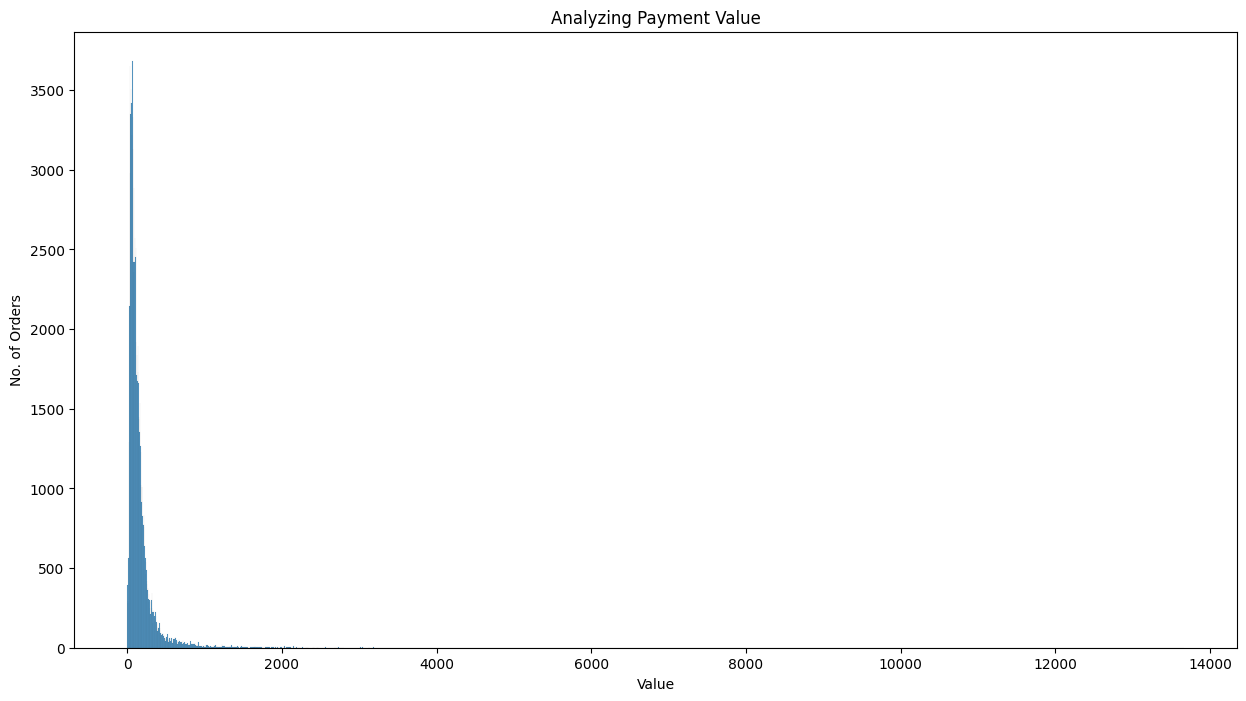

In [70]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=df_order_pay_group)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

Text(0, 0.5, '')

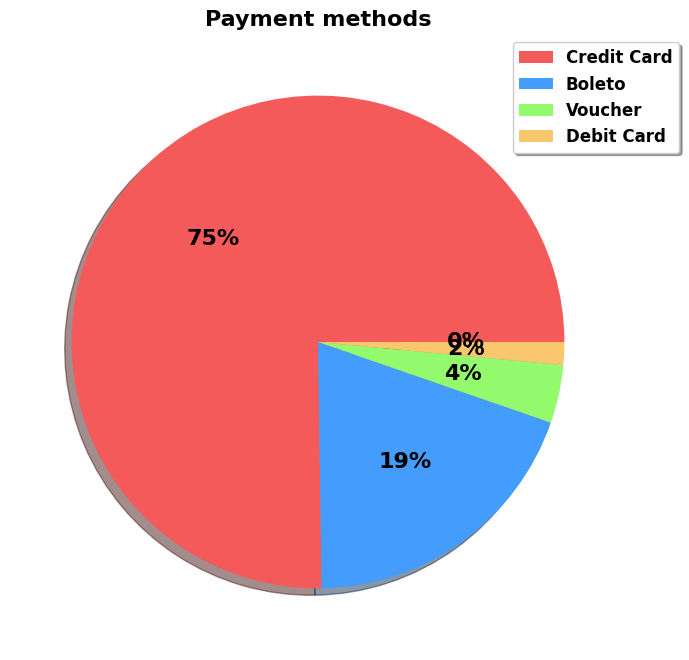

In [71]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = df_order_pay_group["payment_type"][df_order_pay_group["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Payment methods", fontweight='bold', size=16)
plt.ylabel("")

In [72]:
# viewing the first 5 rows of the dataset
df_order_pay_group.head()

order_id payment_type  payment_value
0  00010242fe8c5a6d1ba2dd792cb16214  credit_card          72.19
1  00018f77f2f0320c557190d7a144bdd3  credit_card         259.83
2  000229ec398224ef6ca0657da4fc703e  credit_card         216.87
3  00024acbcdf0a6daa1e931b038114c75  credit_card          25.78
4  00042b26cf59d7ce69dfabb4e55b4fd9  credit_card         218.04

##5. Review Table (olist_order_reviews_dataset)

In [73]:
# viewing the first 5 rows of the dataset
df_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [74]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [75]:
#Change "review_creation_date" and "review_answer_timestamp" type from object to datetime
df_reviews["review_creation_date"] = pd.to_datetime(df_reviews["review_creation_date"], format='%Y-%m-%d %H:%M:%S')
df_reviews["review_answer_timestamp"] = pd.to_datetime(df_reviews["review_answer_timestamp"], format='%Y-%m-%d %H:%M:%S')

In [76]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   review_id                100000 non-null  object        
 1   order_id                 100000 non-null  object        
 2   review_score             100000 non-null  int64         
 3   review_comment_title     11715 non-null   object        
 4   review_comment_message   41753 non-null   object        
 5   review_creation_date     100000 non-null  datetime64[ns]
 6   review_answer_timestamp  100000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [77]:
percent_missing = df_reviews.isnull().sum() * 100 / len(df_reviews)
print("percent of missing value is:\n",percent_missing)

percent of missing value is:
 review_id                   0.000
order_id                    0.000
review_score                0.000
review_comment_title       88.285
review_comment_message     58.247
review_creation_date        0.000
review_answer_timestamp     0.000
dtype: float64


In [78]:
# dropping columns with many missing values
df_reviews = df_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

In [79]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_reviews.duplicated(keep=False).sum()

0

In [80]:
df_reviews.shape

(100000, 5)

In [81]:
df_reviews.describe()

review_score
count  100000.000000
mean        4.070890
std         1.359663
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

In [82]:
df_reviews.describe(include=['object'])

review_id                          order_id
count                             100000                            100000
unique                             99173                             99441
top     2172867fd5b1a55f98fe4608e1547b4b  03c939fd7fd3b38f8485a0f95798f1f6
freq                                   3                                 3

In [83]:
df_reviews[df_reviews['review_id']=='2172867fd5b1a55f98fe4608e1547b4b']

review_id                          order_id  \
15243  2172867fd5b1a55f98fe4608e1547b4b  559d606ac642899e44550f194fec7e08   
28806  2172867fd5b1a55f98fe4608e1547b4b  ac6e61336e852cdc45fe59ada3763a66   
54384  2172867fd5b1a55f98fe4608e1547b4b  e11ba7fd8fe0728dcd89efddcda9fb11   

       review_score review_creation_date review_answer_timestamp  
15243             5           2018-02-15     2018-02-26 15:53:18  
28806             5           2018-02-15     2018-02-26 15:53:18  
54384             5           2018-02-15     2018-02-26 15:53:18

In [84]:
df_reviews[df_reviews['order_id']=='03c939fd7fd3b38f8485a0f95798f1f6']

review_id                          order_id  \
8329   b04ed893318da5b863e878cd3d0511df  03c939fd7fd3b38f8485a0f95798f1f6   
51931  f4bb9d6dd4fb6dcc2298f0e7b17b8e1e  03c939fd7fd3b38f8485a0f95798f1f6   
70005  405eb2ea45e1dbe2662541ae5b47e2aa  03c939fd7fd3b38f8485a0f95798f1f6   

       review_score review_creation_date review_answer_timestamp  
8329              3           2018-03-20     2018-03-21 02:28:23  
51931             4           2018-03-29     2018-03-30 00:29:09  
70005             3           2018-03-06     2018-03-06 19:50:32

ทำการลองไม่ต้อง grouping ดู ***

In [85]:
df_reviews.shape

(100000, 5)

Text(0, 0.5, 'No. of Reviews')

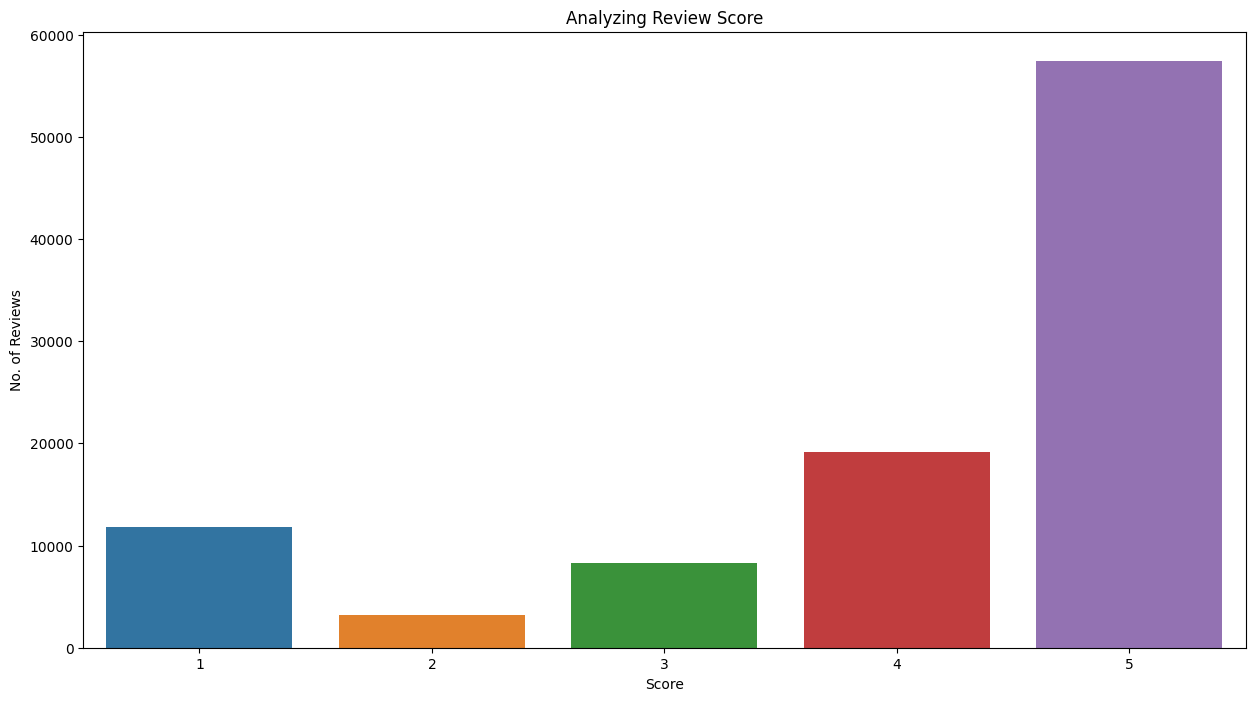

In [86]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=df_reviews)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

In [87]:
df_reviews['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [88]:
# checking for missing values
df_reviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [89]:
# viewing the first 5 rows of the dataset
df_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_creation_date review_answer_timestamp  
0             4           2018-01-18     2018-01-18 21:46:59  
1             5           2018-03-10     2018-03-11 03:05:13  
2             5           2018-02-17     2018-02-18 14:36:24  
3             5           2017-04-21     2017-04-21 22:02:06  
4             5           2018-03-01     2018-03-02 10:26:53

##6. Order Table (olist_orders_dataset)

In [90]:
# viewing the first 5 rows of the dataset
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [91]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [92]:
#Change data type to datetime
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_approved_at"] = pd.to_datetime(df_orders["order_approved_at"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_delivered_carrier_date"] = pd.to_datetime(df_orders["order_delivered_carrier_date"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_delivered_customer_date"] = pd.to_datetime(df_orders["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')

In [93]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [94]:
df_orders['order_status'] = df_orders['order_status'].astype('category')

In [95]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [96]:
df_orders.describe(include=['object'])

order_id                       customer_id
count                              99441                             99441
unique                             99441                             99441
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d
freq                                   1                                 1

In [97]:
#check duplicated row
#By setting keep on False, all duplicates are True.
df_orders.duplicated(keep=False).sum()

0

In [98]:
df_orders.shape

(99441, 8)

In [99]:
# Attempt to find number of null for each columns
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Text(0, 0.5, 'No. of Order')

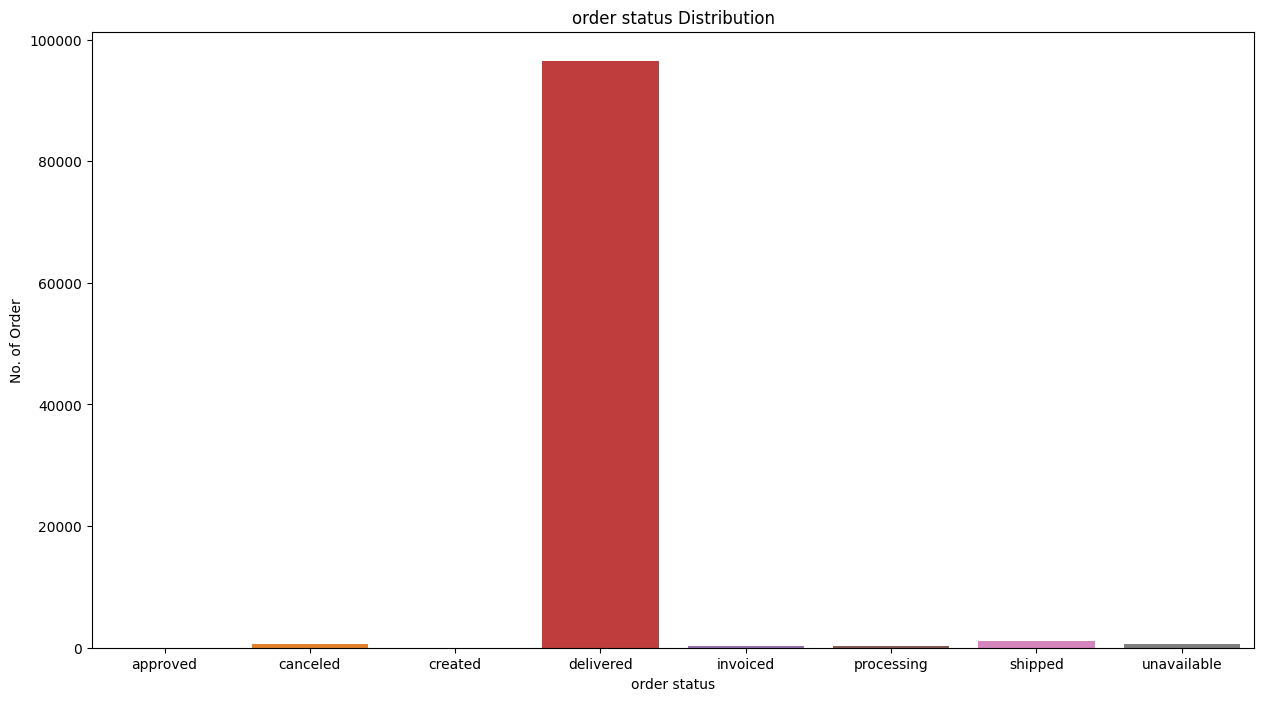

In [100]:
# plotting the category wise distribution of order status
plt.figure(figsize=(15,8))
sns.countplot(x='order_status', data=df_orders)
plt.title('order status Distribution')
plt.xlabel('order status')
plt.ylabel('No. of Order')

Text(0, 0.5, '')

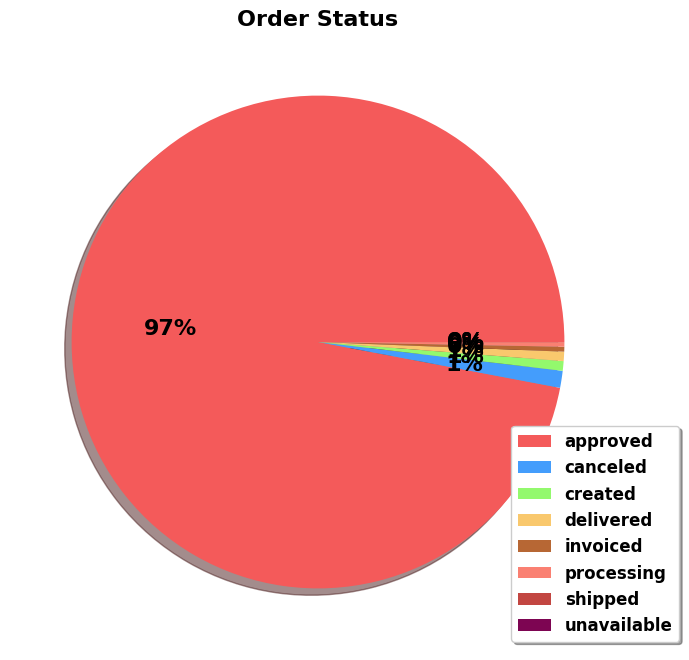

In [101]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d','#b76734','#fa8072','#c24641','#7d0552']
legend = ["approved", "canceled", "created", "delivered","invoiced","processing","shipped","unavailable"]

p = df_orders["order_status"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Order Status", fontweight='bold', size=16)
plt.ylabel("")

In [102]:
df_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [103]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  category      
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](5), object(2)
memory usage: 5.4+ MB


In [104]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [105]:
df_orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

##7. Product (olist_products_dataset) and Product Category Info (product_category_name_translation) Tables

In [106]:
# viewing the first 5 rows of the product category info table
df_category.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [107]:
df_category.shape

(71, 2)

In [108]:
df_category['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [109]:
# checking for missing values
df_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [110]:
df_products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [111]:
df_products.shape

(32951, 9)

In [112]:
df_products['product_category_name'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [113]:
# merging the product and prodinfo tables
df_products = df_products.merge(df_category, on='product_category_name')

In [114]:
# viewing the first 5 rows of the products table
df_products.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  6a2fb4dd53d2cdb88e0432f1284a004c            perfumaria   
2  0d009643171aee696f4733340bc2fdd0            perfumaria   
3  b1eae565a61935e0011ee7682fef9dc9            perfumaria   
4  8da90b37f0fb171b4877c124f965b1f6            perfumaria   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 39.0                       346.0                 2.0   
2                 52.0                       150.0                 1.0   
3                 49.0                       460.0                 2.0   
4                 56.0                       733.0                 3.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0              14.0   
1             400.0               27.0                5.0              20.0   
2             422.0               21.0               16.0              18.0   
3             267.0               17.0               13.0              17.0   
4             377.0               18.0               13.0              15.0   

  product_category_name_english  
0                     perfumery  
1                     perfumery  
2                     perfumery  
3                     perfumery  
4                     perfumery

In [115]:
df_products.shape

(32328, 10)

In [116]:
# dropping the columns
df_products = df_products.drop(columns=['product_category_name'])

In [117]:
# checking for missing values
df_products.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

In [118]:
df_products['product_category_name_english'] = df_products['product_category_name_english'].astype('category')

In [119]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   product_id                     32328 non-null  object  
 1   product_name_lenght            32328 non-null  float64 
 2   product_description_lenght     32328 non-null  float64 
 3   product_photos_qty             32328 non-null  float64 
 4   product_weight_g               32327 non-null  float64 
 5   product_length_cm              32327 non-null  float64 
 6   product_height_cm              32327 non-null  float64 
 7   product_width_cm               32327 non-null  float64 
 8   product_category_name_english  32328 non-null  category
dtypes: category(1), float64(7), object(1)
memory usage: 2.3+ MB


In [120]:
# viewing the first 5 rows of the products table
df_products.head()

product_id  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5                 40.0   
1  6a2fb4dd53d2cdb88e0432f1284a004c                 39.0   
2  0d009643171aee696f4733340bc2fdd0                 52.0   
3  b1eae565a61935e0011ee7682fef9dc9                 49.0   
4  8da90b37f0fb171b4877c124f965b1f6                 56.0   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                       287.0                 1.0             225.0   
1                       346.0                 2.0             400.0   
2                       150.0                 1.0             422.0   
3                       460.0                 2.0             267.0   
4                       733.0                 3.0             377.0   

   product_length_cm  product_height_cm  product_width_cm  \
0               16.0               10.0              14.0   
1               27.0                5.0              20.0   
2               21.0               16.0              18.0   
3               17.0               13.0              17.0   
4               18.0               13.0              15.0   

  product_category_name_english  
0                     perfumery  
1                     perfumery  
2                     perfumery  
3                     perfumery  
4                     perfumery

In [121]:
df_products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32328.000000                32328.000000        32328.000000   
mean             48.474078                  771.520168            2.188815   
std              10.246388                  635.180062            1.736746   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32327.000000       32327.000000       32327.000000   
mean        2276.960807          30.856498          16.955950   
std         4279.734063          16.958460          13.637246   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          20.500000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32327.000000  
mean          23.208464  
std           12.080665  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

In [122]:
df_products.describe(include="object")

product_id
count                              32328
unique                             32328
top     1e9e8ef04dbcff4541ed26657ea517e5
freq                                   1

In [123]:
df_products[df_products['product_weight_g']==0]

product_id  product_name_lenght  \
13462  81781c0fed9fe1ad6e8c81fca1e1cb08                 51.0   
13831  8038040ee2a71048d4bdbbdc985b69ab                 48.0   
13955  36ba42dd187055e1fbe943b2d11430ca                 53.0   
15507  e673e90efa65a5409ff4196c038bb5af                 53.0   

       product_description_lenght  product_photos_qty  product_weight_g  \
13462                       529.0                 1.0               0.0   
13831                       528.0                 1.0               0.0   
13955                       528.0                 1.0               0.0   
15507                       528.0                 1.0               0.0   

       product_length_cm  product_height_cm  product_width_cm  \
13462               30.0               25.0              30.0   
13831               30.0               25.0              30.0   
13955               30.0               25.0              30.0   
15507               30.0               25.0              30.0   

      product_category_name_english  
13462                bed_bath_table  
13831                bed_bath_table  
13955                bed_bath_table  
15507                bed_bath_table

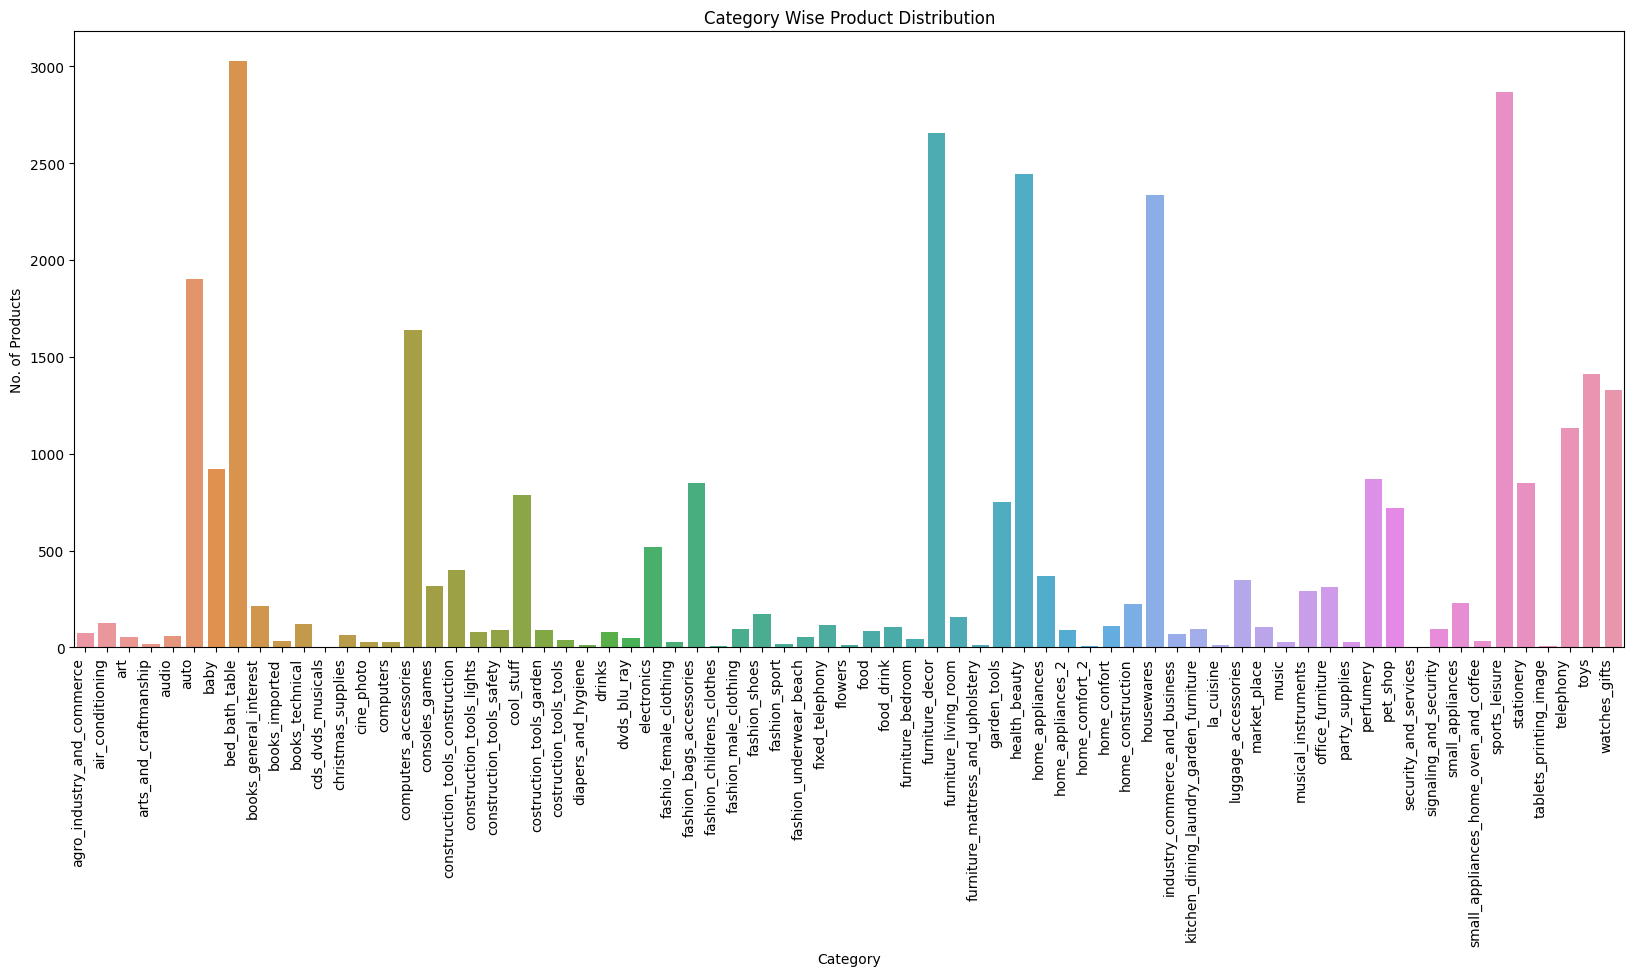

In [124]:
# plotting the category wise distribution of products
plt.figure(figsize=(20,8))
ax=sns.countplot(x='product_category_name_english', data=df_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')
plt.show()

Text(0.5, 0, 'Product Name Length')

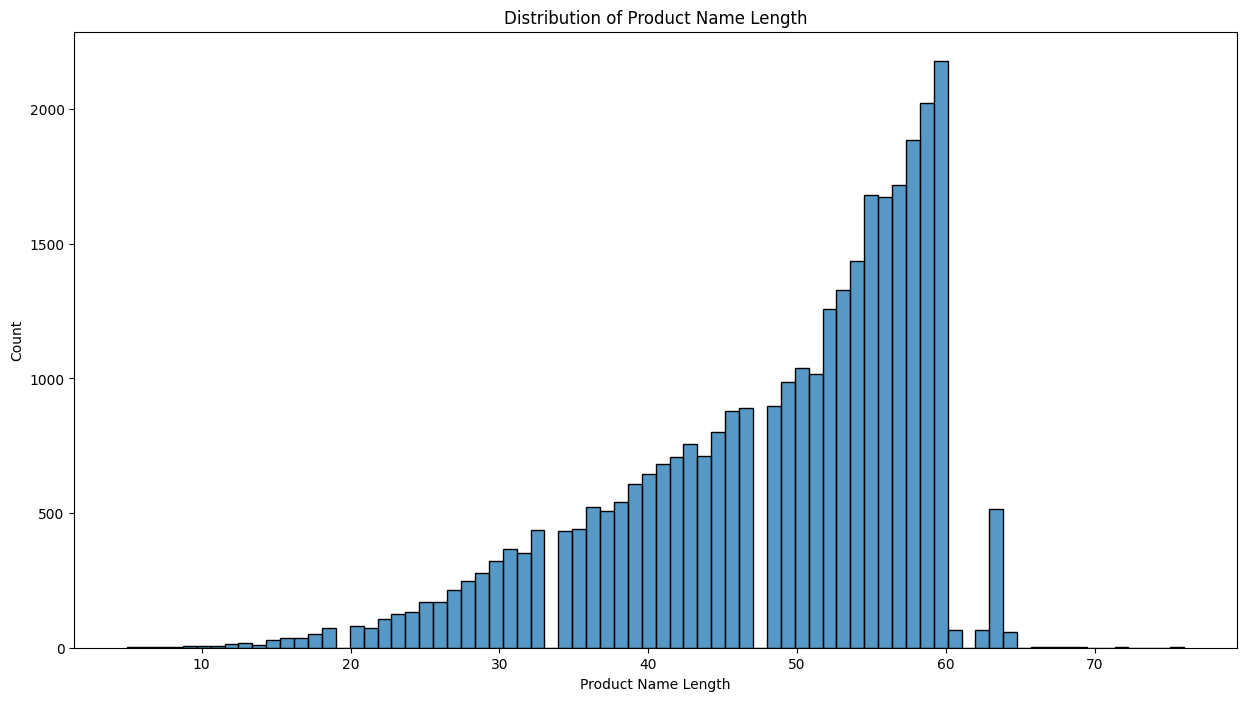

In [125]:
# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=df_products)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')

Text(0.5, 0, 'Product Description Length')

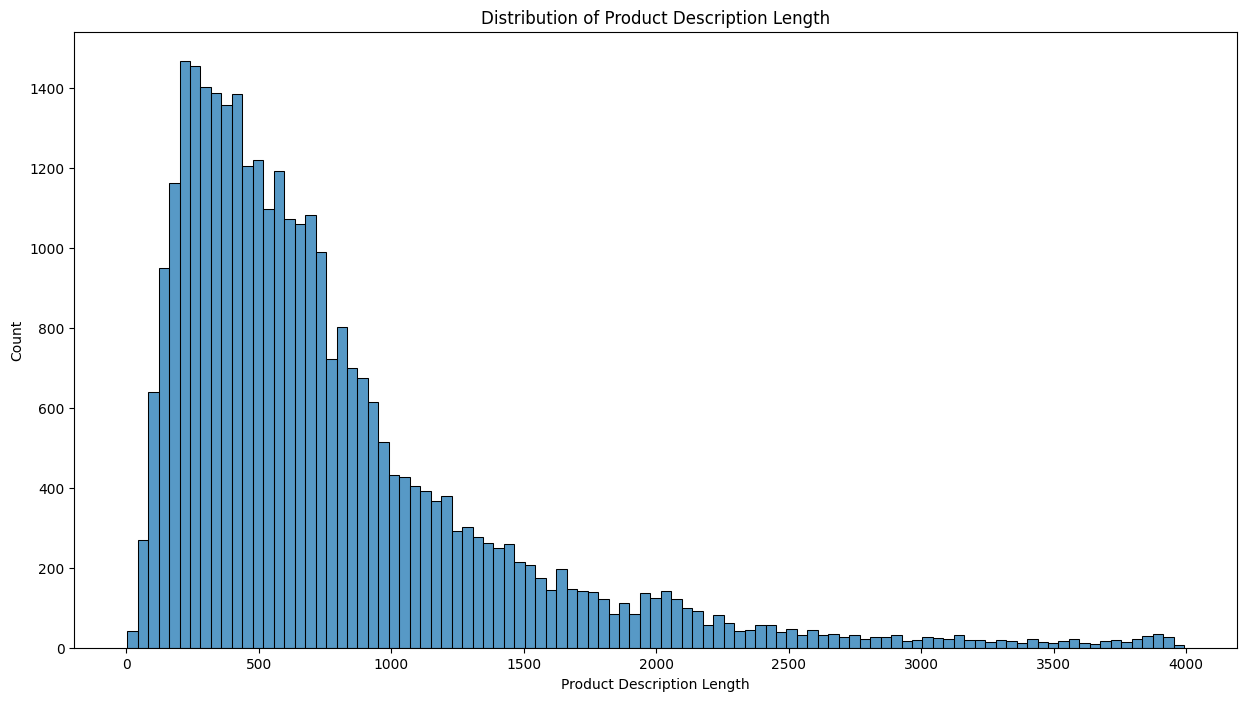

In [126]:
# plotting the distribution of product description length
plt.figure(figsize=(15,8))
sns.histplot(x='product_description_lenght', data=df_products)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')

Text(0.5, 0, 'Product Photos Quantity')

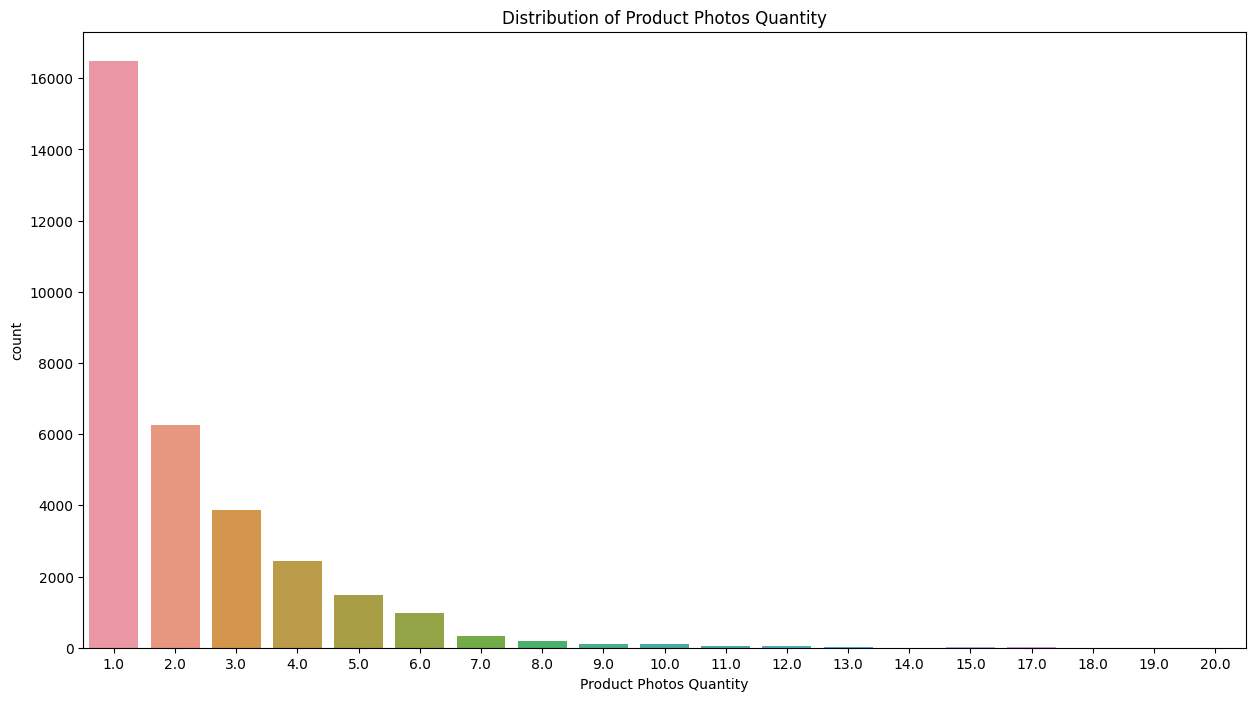

In [127]:
# plotting the distribution of product photos quantity
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=df_products)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')

In [128]:
df_products.shape

(32328, 9)

##8. Seller Table (olist_sellers_dataset)

In [129]:
# viewing the first 5 rows of the table
df_sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [130]:
# checking for missing values
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [131]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [132]:
#Change data type to category
df_sellers['seller_zip_code_prefix'] = df_sellers['seller_zip_code_prefix'].astype('category')
df_sellers['seller_city'] = df_sellers['seller_city'].astype('category')
df_sellers['seller_state'] = df_sellers['seller_state'].astype('category')

In [133]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   seller_id               3095 non-null   object  
 1   seller_zip_code_prefix  3095 non-null   category
 2   seller_city             3095 non-null   category
 3   seller_state            3095 non-null   category
dtypes: category(3), object(1)
memory usage: 143.2+ KB


Text(0, 0.5, 'No. of Sellers')

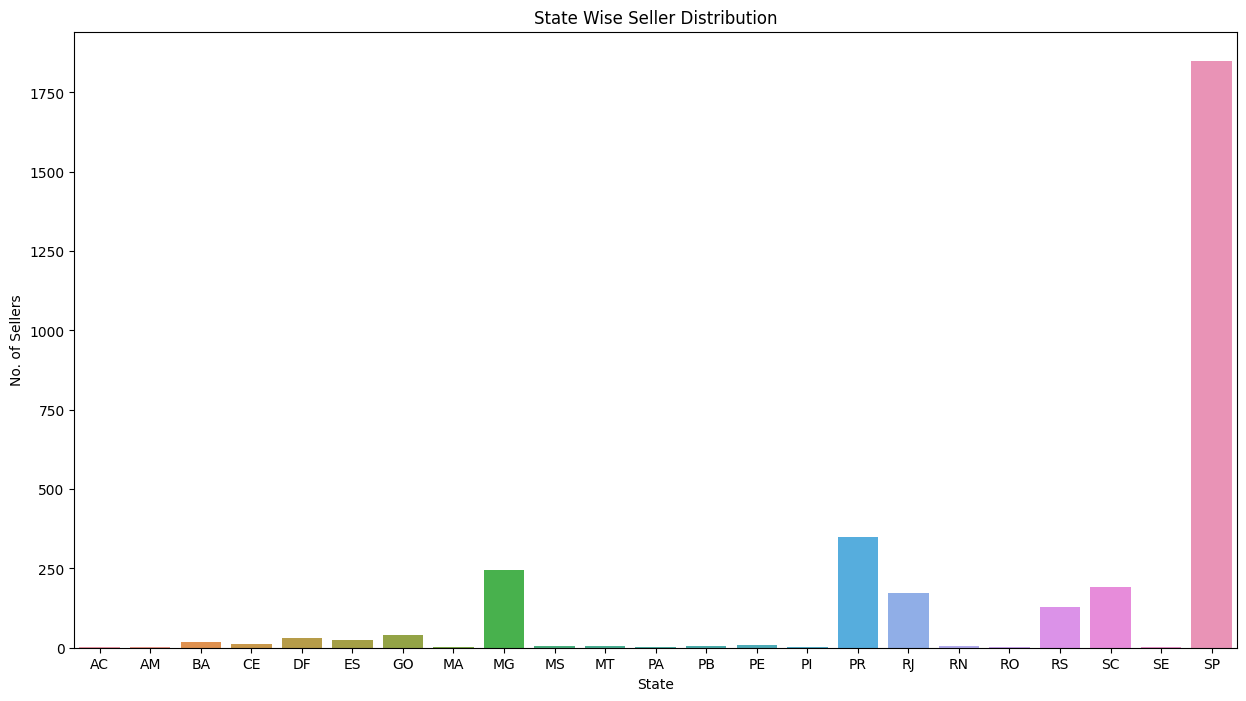

In [134]:
# plotting state wise seller distribution
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=df_sellers)
plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')

In [135]:
df_sellers.shape

(3095, 4)

In [136]:
df_sellers.head()

seller_id seller_zip_code_prefix        seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                  13023           campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                  13844         mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d                  20031     rio de janeiro   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                   4195          sao paulo   
4  51a04a8a6bdcb23deccc82b0b80742cf                  12914  braganca paulista   

  seller_state  
0           SP  
1           SP  
2           RJ  
3           SP  
4           SP

# Merging each tables

## Step 1: Merging customer data set with a Geolocation first

In [137]:
df = pd.merge(df_customers,df_geolocation,left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
df.rename(columns={
    'geolocation_lat' : 'customer_lat',
    'geolocation_lng' : 'customer_lng',
}, inplace=True)
df.head()

customer_id  customer_zip_code_prefix customer_city  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   
1  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   
2  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   
3  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   
4  06b8999e2fba1a1fbc88172c00ba8bc7                     14409        franca   

  customer_state geolocation_zip_code_prefix  customer_lat  customer_lng  \
0             SP                       14409    -20.509897    -47.397866   
1             SP                       14409    -20.497396    -47.399241   
2             SP                       14409    -20.510459    -47.399553   
3             SP                       14409    -20.480940    -47.394161   
4             SP                       14409    -20.515413    -47.398194   

  geolocation_city geolocation_state  
0           franca                SP  
1           franca                SP  
2           franca                SP  
3           franca                SP  
4           franca                SP

In [138]:
# dropping columns with unnecessary column
df = df.drop(columns=['customer_lat','customer_lng','geolocation_state','geolocation_city','geolocation_zip_code_prefix'])

In [139]:
df.duplicated(subset=['customer_id'],keep='last').sum()

10228565

In [140]:
df=df.drop_duplicates(subset=['customer_id'],keep='last')
df

customer_id  customer_zip_code_prefix  \
125       06b8999e2fba1a1fbc88172c00ba8bc7                     14409   
251       5dca924cc99eea2dc5ba40d11ec5dd0f                     14409   
377       661897d4968f1b59bfff74c7eb2eb4fc                     14409   
503       702b62324327ccba20f1be3465426437                     14409   
629       bdf997bae7ca819b0415f5174d6b4302                     14409   
...                                    ...                       ...   
10327706  0b7a30ba373aeb55cf28add5b5477956                     87145   
10327711  ff6b440b2465bfaef05c675efb48cd15                     98860   
10327718  3f7029d9b98a47370cd5f3a97adcbccd                      5538   
10327726  d9110683c7a282144e9fc97660026a28                     74980   
10327727  6fb4f2354f36e554ac80141e9128f528                     99043   

                 customer_city customer_state  
125                     franca             SP  
251                     franca             SP  
377                     franca             SP  
503                     franca             SP  
629                     franca             SP  
...                        ...            ...  
10327706              paicandu             PR  
10327711     eugenio de castro             RS  
10327718             sao paulo             SP  
10327726  aparecida de goiania             GO  
10327727           passo fundo             RS  

[99163 rows x 4 columns]

## Step 2: Merging seller data set with a geolocation data set

In [141]:
df2 = pd.merge(df_sellers, df_geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df2.rename(columns={
    'geolocation_lat' : 'seller_lat',
    'geolocation_lng' : 'sellet_lng',
}, inplace=True)
df2

seller_id  seller_zip_code_prefix seller_city  \
0       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
2       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
3       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
4       3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
...                                  ...                     ...         ...   
311784  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
311785  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
311786  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
311787  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   
311788  9e25199f6ef7e7c347120ff175652c3b                   12051     taubate   

       seller_state geolocation_zip_code_prefix  seller_lat  sellet_lng  \
0                SP                       13023  -22.898536  -47.063125   
1                SP                       13023  -22.895499  -47.061944   
2                SP                       13023  -22.891740  -47.060820   
3                SP                       13023  -22.895762  -47.066144   
4                SP                       13023  -22.896154  -47.062431   
...             ...                         ...         ...         ...   
311784           SP                       12051  -23.011130  -45.592347   
311785           SP                       12051  -23.013452  -45.584299   
311786           SP                       12051  -23.009155  -45.592019   
311787           SP                       12051  -23.009019  -45.584925   
311788           SP                       12051  -23.010990  -45.586938   

       geolocation_city geolocation_state  
0              campinas                SP  
1              campinas                SP  
2              campinas                SP  
3              campinas                SP  
4              campinas                SP  
...                 ...               ...  
311784          taubate                SP  
311785          taubaté                SP  
311786          taubate                SP  
311787          taubate                SP  
311788          taubaté                SP  

[311789 rows x 9 columns]

In [142]:
# dropping columns with unnecessary column
df2 = df2.drop(columns=['seller_lat','sellet_lng','geolocation_state','geolocation_city','geolocation_zip_code_prefix'])

In [143]:
df2.duplicated(subset=['seller_id'],keep='last').sum()

308701

In [144]:
df2=df2.drop_duplicates(subset=['seller_id'],keep='last')
df2

seller_id  seller_zip_code_prefix  \
57      3442f8959a84dea7ee197c632cb2df15                   13023   
115     e0eabded302882513ced4ea3eb0c7059                   13023   
206     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
304     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
402     1d2732ef8321502ee8488e8bed1ab8cd                   20031   
...                                  ...                     ...   
311532  f1fdf2d13186575751aa25876536d85c                    5314   
311594  98dddbc4601dd4443ca174359b237166                   87111   
311639  74871d19219c7d518d0090283e03c137                    4650   
311723  e603cf3fec55f8697c9059638d6c8eb5                   96080   
311788  9e25199f6ef7e7c347120ff175652c3b                   12051   

           seller_city seller_state  
57            campinas           SP  
115           campinas           SP  
206         mogi guacu           SP  
304     rio de janeiro           RJ  
402     rio de janeiro           RJ  
...                ...          ...  
311532       sao paulo           SP  
311594         sarandi           PR  
311639       sao paulo           SP  
311723         pelotas           RS  
311788         taubate           SP  

[3088 rows x 4 columns]

## Step 3: Merging all data set together

In [145]:
df_final = pd.merge(df_item_group,df_products, on='product_id', how='inner')
df_final = df_final.merge(df2, on='seller_id', how='inner')

In [146]:
df_final.shape

(100719, 18)

In [147]:
df_final = df_final.merge(df_orders, on='order_id', how='inner')

In [148]:
df_final.shape

(100719, 25)

In [149]:
df_final = df_final.merge(df_order_pay_group, on='order_id', how='inner')

In [150]:
df_final.shape

(102995, 27)

In [151]:
df_final = df_final.merge(df, on='customer_id', how='inner')

In [152]:
df_final.shape

(102710, 30)

In [153]:
df_final = df_final.merge(df_reviews, on='order_id', how='inner')

In [154]:
df_final.shape

(103314, 34)

In [155]:
df_final.duplicated(keep=False).sum()

0

In [156]:
df_final.head(5)

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2  532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3  6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4  7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   

                         product_id shipping_limit_date  order_item_id  price  \
0  4244733e06e7ecb4970a6e2683c13e61 2017-09-19 09:45:35              1   58.9   
1  4244733e06e7ecb4970a6e2683c13e61 2017-07-05 02:44:11              1   55.9   
2  4244733e06e7ecb4970a6e2683c13e61 2018-05-23 10:56:25              1   64.9   
3  4244733e06e7ecb4970a6e2683c13e61 2017-08-07 18:55:08              1   58.9   
4  4244733e06e7ecb4970a6e2683c13e61 2017-08-16 22:05:11              1   58.9   

   freight_value  product_name_lenght  product_description_lenght  \
0          13.29                 58.0                       598.0   
1          17.96                 58.0                       598.0   
2          18.33                 58.0                       598.0   
3          16.17                 58.0                       598.0   
4          13.29                 58.0                       598.0   

   product_photos_qty  ...  order_estimated_delivery_date  payment_type  \
0                 4.0  ...                     2017-09-29   credit_card   
1                 4.0  ...                     2017-07-26        boleto   
2                 4.0  ...                     2018-06-07   credit_card   
3                 4.0  ...                     2017-08-25   credit_card   
4                 4.0  ...                     2017-09-01   credit_card   

   payment_value  customer_zip_code_prefix          customer_city  \
0          72.19                     28013  campos dos goytacazes   
1          73.86                     75800                  jatai   
2          83.23                     30720         belo horizonte   
3          75.07                     83070   sao jose dos pinhais   
4          72.19                     36400   conselheiro lafaiete   

   customer_state                         review_id review_score  \
0              RJ  97ca439bc427b48bc1cd7177abe71365            5   
1              GO  b11cba360bbe71410c291b764753d37f            5   
2              MG  af01c4017c5ab46df6cc810e069e654a            4   
3              PR  8304ff37d8b16b57086fa283fe0c44f8            5   
4              MG  426f43a82185969503fb3c86241a9535            5   

  review_creation_date review_answer_timestamp  
0           2017-09-21     2017-09-22 10:57:03  
1           2017-07-14     2017-07-17 12:50:07  
2           2018-06-05     2018-06-06 21:41:12  
3           2017-08-10     2017-08-13 03:35:17  
4           2017-08-25     2017-08-28 00:51:18  

[5 rows x 34 columns]

In [157]:
df_final.describe()

order_item_id          price  freight_value  product_name_lenght  \
count  103314.000000  103314.000000  103314.000000        103314.000000   
mean        1.316762     132.430260      21.995793            48.860987   
std         1.991249     204.574219      20.415122            10.005044   
min         1.000000       0.850000       0.000000             5.000000   
25%         1.000000      44.900000      13.530000            42.000000   
50%         1.000000      80.000000      16.880000            52.000000   
75%         1.000000     146.990000      23.270000            57.000000   
max       210.000000   13440.000000    1794.960000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               103314.000000       103314.000000     103313.000000   
mean                   785.710175            2.232640       2090.555874   
std                    650.713359            1.736679       3737.424855   
min                      4.000000            1.000000          0.000000   
25%                    347.000000            1.000000        300.000000   
50%                    601.000000            2.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  \
count      103313.000000      103313.000000     103313.000000   
mean           30.160135          16.441919         23.093038   
std            16.124178          13.329382         11.739963   
min             7.000000           2.000000          6.000000   
25%            18.000000           8.000000         15.000000   
50%            25.000000          13.000000         20.000000   
75%            38.000000          20.000000         30.000000   
max           105.000000         105.000000        118.000000   

       seller_zip_code_prefix  payment_value  customer_zip_code_prefix  \
count           103314.000000  103314.000000             103314.000000   
mean             24641.848094     160.844447              35036.306415   
std              27690.068672     220.804006              29762.905234   
min               1001.000000       0.010000               1003.000000   
25%               6440.000000      60.630000              11320.000000   
50%              13720.000000     104.700000              24356.500000   
75%              29141.000000     179.070000              58280.000000   
max              99730.000000   13664.080000              99980.000000   

        review_score  
count  103314.000000  
mean        4.062450  
std         1.363928  
min         1.000000  
25%         4.000000  
50%         5.000000  
75%         5.000000  
max         5.000000

In [158]:
df_final.describe(include=['category'])

product_category_name_english seller_city seller_state order_status  \
count                         103314      103314       103314       103314   
unique                            71         604           23            7   
top                   bed_bath_table   sao paulo           SP    delivered   
freq                           10557       25510        73470       101094   

       payment_type customer_city customer_state  
count        103314        103314         103314  
unique            4          4046             27  
top     credit_card     sao paulo             SP  
freq          77867         16203          43488

In [159]:
df_final.describe(include=['object'])

order_id                         seller_id  \
count                             103314                            103314   
unique                             96773                              3026   
top     1c11d0f4353b31ac3417fbfa5f0f2a8a  6560211a19b47992c3666cc44a7e94c0   
freq                                  12                              2027   

                              product_id                       customer_id  \
count                             103314                            103314   
unique                             32220                             96773   
top     99a4788cb24856965c36a24e339b6058  50920f8cd0681fd86ebe93670c8fe52e   
freq                                 488                                12   

                               review_id  
count                             103314  
unique                             96572  
top     6fe49ee0a2b00dddf7ebddb5847f9283  
freq                                  12

In [160]:
df_final[df_final['order_id']=='ca3625898fbd48669d50701aba51cd5f']

order_id                         seller_id  \
75767  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75768  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75769  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75770  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75771  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75772  ca3625898fbd48669d50701aba51cd5f  0b35c634521043bf4b47e21547b99ab5   
75773  ca3625898fbd48669d50701aba51cd5f  888faa8bfb0b159c37de6d898b961c31   
75774  ca3625898fbd48669d50701aba51cd5f  888faa8bfb0b159c37de6d898b961c31   

                             product_id shipping_limit_date  order_item_id  \
75767  4a5c3967bfd3629fe07ef4d0cc8c3818 2018-08-16 02:25:07              6   
75768  309dd69eb83cea38c51709d62befe1a4 2018-08-16 02:25:07             19   
75769  21b524c4c060169fa75ccf08c7da4627 2018-08-16 02:25:07              8   
75770  0cf2faf9749f53924cea652a09d8e327 2018-08-16 02:25:07              2   
75771  0de59eddc63167215c972b0d785ffa7b 2018-08-16 02:25:07              7   
75772  1065e0ebef073787a7bf691924c60eeb 2018-08-16 02:25:07              1   
75773  5dae498eff2d80057f56122235a36aff 2018-08-17 02:25:07              5   
75774  678c229b41c0e497d35a25a8be1cc631 2018-08-17 02:25:07              7   

       price  freight_value  product_name_lenght  product_description_lenght  \
75767  109.9           0.15                 55.0                       338.0   
75768  112.0           7.36                 57.0                       338.0   
75769   63.7           0.15                 60.0                       338.0   
75770   33.9           1.84                 59.0                       338.0   
75771  318.0           7.34                 58.0                       339.0   
75772  309.0           1.84                 59.0                       339.0   
75773   95.9           0.15                 58.0                       338.0   
75774   95.9           0.15                 60.0                       339.0   

       product_photos_qty  ...  order_estimated_delivery_date  payment_type  \
75767                 1.0  ...                     2018-09-13   credit_card   
75768                 1.0  ...                     2018-09-13   credit_card   
75769                 1.0  ...                     2018-09-13   credit_card   
75770                 1.0  ...                     2018-09-13   credit_card   
75771                 1.0  ...                     2018-09-13   credit_card   
75772                 1.0  ...                     2018-09-13   credit_card   
75773                 1.0  ...                     2018-09-13   credit_card   
75774                 1.0  ...                     2018-09-13   credit_card   

       payment_value  customer_zip_code_prefix customer_city  customer_state  \
75767        1157.28                     14610          ipua              SP   
75768        1157.28                     14610          ipua              SP   
75769        1157.28                     14610          ipua              SP   
75770        1157.28                     14610          ipua              SP   
75771        1157.28                     14610          ipua              SP   
75772        1157.28                     14610          ipua              SP   
75773        1157.28                     14610          ipua              SP   
75774        1157.28                     14610          ipua              SP   

                              review_id review_score review_creation_date  \
75767  b8017a9ca639f71a9a4a745985f4a729            3           2018-08-22   
75768  b8017a9ca639f71a9a4a745985f4a729            3           2018-08-22   
75769  b8017a9ca639f71a9a4a745985f4a729            3           2018-08-22   
75770  b8017a9ca639f71a9a4a745985f4a729            3           2018-08-22   
75771  b8017a9ca639f71a9a4a745985f4a729            3           2018-08-22   
75772  b8017a9ca63

# Data cleaning (Deal with a missing & Null)

In [161]:
#Checking data attributes
#data.dtypes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103314 entries, 0 to 103313
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103314 non-null  object        
 1   seller_id                      103314 non-null  object        
 2   product_id                     103314 non-null  object        
 3   shipping_limit_date            103314 non-null  datetime64[ns]
 4   order_item_id                  103314 non-null  int64         
 5   price                          103314 non-null  float64       
 6   freight_value                  103314 non-null  float64       
 7   product_name_lenght            103314 non-null  float64       
 8   product_description_lenght     103314 non-null  float64       
 9   product_photos_qty             103314 non-null  float64       
 10  product_weight_g               103313 non-null  float64       
 11  

In [162]:
#Change data type to category
df_final['seller_zip_code_prefix'] = df_final['seller_zip_code_prefix'].astype('category')
df_final['seller_id'] = df_final['seller_id'].astype('category')
df_final['customer_id'] = df_final['customer_id'].astype('category')
df_final['customer_zip_code_prefix'] = df_final['customer_zip_code_prefix'].astype('category')

In [163]:
#Checking data attributes
#data.dtypes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103314 entries, 0 to 103313
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103314 non-null  object        
 1   seller_id                      103314 non-null  category      
 2   product_id                     103314 non-null  object        
 3   shipping_limit_date            103314 non-null  datetime64[ns]
 4   order_item_id                  103314 non-null  int64         
 5   price                          103314 non-null  float64       
 6   freight_value                  103314 non-null  float64       
 7   product_name_lenght            103314 non-null  float64       
 8   product_description_lenght     103314 non-null  float64       
 9   product_photos_qty             103314 non-null  float64       
 10  product_weight_g               103313 non-null  float64       
 11  

In [164]:
# Attempt to find number of null for each columns
df_final.isnull().sum()

order_id                            0
seller_id                           0
product_id                          0
shipping_limit_date                 0
order_item_id                       0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_category_name_english       0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  13
order_delivered_carrier_date     1020
order_delivered_customer_date    2221
order_estimated_delivery_date       0
payment_type                        0
payment_valu

## Filtering

We try to focusing only the order that already finished deilvered, So we plan to drop other rows

In [165]:
df_final = df_final[df_final['order_status'] == 'delivered']
df_final.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2  532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3  6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4  7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   

                         product_id shipping_limit_date  order_item_id  price  \
0  4244733e06e7ecb4970a6e2683c13e61 2017-09-19 09:45:35              1   58.9   
1  4244733e06e7ecb4970a6e2683c13e61 2017-07-05 02:44:11              1   55.9   
2  4244733e06e7ecb4970a6e2683c13e61 2018-05-23 10:56:25              1   64.9   
3  4244733e06e7ecb4970a6e2683c13e61 2017-08-07 18:55:08              1   58.9   
4  4244733e06e7ecb4970a6e2683c13e61 2017-08-16 22:05:11              1   58.9   

   freight_value  product_name_lenght  product_description_lenght  \
0          13.29                 58.0                       598.0   
1          17.96                 58.0                       598.0   
2          18.33                 58.0                       598.0   
3          16.17                 58.0                       598.0   
4          13.29                 58.0                       598.0   

   product_photos_qty  ...  order_estimated_delivery_date  payment_type  \
0                 4.0  ...                     2017-09-29   credit_card   
1                 4.0  ...                     2017-07-26        boleto   
2                 4.0  ...                     2018-06-07   credit_card   
3                 4.0  ...                     2017-08-25   credit_card   
4                 4.0  ...                     2017-09-01   credit_card   

   payment_value  customer_zip_code_prefix          customer_city  \
0          72.19                     28013  campos dos goytacazes   
1          73.86                     75800                  jatai   
2          83.23                     30720         belo horizonte   
3          75.07                     83070   sao jose dos pinhais   
4          72.19                     36400   conselheiro lafaiete   

  customer_state                         review_id review_score  \
0             RJ  97ca439bc427b48bc1cd7177abe71365            5   
1             GO  b11cba360bbe71410c291b764753d37f            5   
2             MG  af01c4017c5ab46df6cc810e069e654a            4   
3             PR  8304ff37d8b16b57086fa283fe0c44f8            5   
4             MG  426f43a82185969503fb3c86241a9535            5   

  review_creation_date review_answer_timestamp  
0           2017-09-21     2017-09-22 10:57:03  
1           2017-07-14     2017-07-17 12:50:07  
2           2018-06-05     2018-06-06 21:41:12  
3           2017-08-10     2017-08-13 03:35:17  
4           2017-08-25     2017-08-28 00:51:18  

[5 rows x 34 columns]

In [166]:
df_final['review_score'].value_counts()

5    58875
4    19598
1    10769
3     8524
2     3328
Name: review_score, dtype: int64

We would like to drop a order_status column too

In [167]:
df_final.drop(columns='order_status', inplace=True)

In [168]:
# Attempt to find number of null for each columns again
df_final.isnull().sum()

order_id                          0
seller_id                         0
product_id                        0
shipping_limit_date               0
order_item_id                     0
price                             0
freight_value                     0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  1
product_length_cm                 1
product_height_cm                 1
product_width_cm                  1
product_category_name_english     0
seller_zip_code_prefix            0
seller_city                       0
seller_state                      0
customer_id                       0
order_purchase_timestamp          0
order_approved_at                13
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
payment_type                      0
payment_value                     0
customer_zip_code_prefix          0
customer_city               

According to our data contain a remaining null max value only 13 or below 0.01%, we decide to drop it 

In [169]:
df_final.dropna(inplace=True)

# rechecking null for each columns again
df_final.isnull().sum()

order_id                         0
seller_id                        0
product_id                       0
shipping_limit_date              0
order_item_id                    0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_type                     0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state      

In [170]:
df_final.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2  532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3  6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4  7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   

                         product_id shipping_limit_date  order_item_id  price  \
0  4244733e06e7ecb4970a6e2683c13e61 2017-09-19 09:45:35              1   58.9   
1  4244733e06e7ecb4970a6e2683c13e61 2017-07-05 02:44:11              1   55.9   
2  4244733e06e7ecb4970a6e2683c13e61 2018-05-23 10:56:25              1   64.9   
3  4244733e06e7ecb4970a6e2683c13e61 2017-08-07 18:55:08              1   58.9   
4  4244733e06e7ecb4970a6e2683c13e61 2017-08-16 22:05:11              1   58.9   

   freight_value  product_name_lenght  product_description_lenght  \
0          13.29                 58.0                       598.0   
1          17.96                 58.0                       598.0   
2          18.33                 58.0                       598.0   
3          16.17                 58.0                       598.0   
4          13.29                 58.0                       598.0   

   product_photos_qty  ...  order_estimated_delivery_date  payment_type  \
0                 4.0  ...                     2017-09-29   credit_card   
1                 4.0  ...                     2017-07-26        boleto   
2                 4.0  ...                     2018-06-07   credit_card   
3                 4.0  ...                     2017-08-25   credit_card   
4                 4.0  ...                     2017-09-01   credit_card   

   payment_value  customer_zip_code_prefix          customer_city  \
0          72.19                     28013  campos dos goytacazes   
1          73.86                     75800                  jatai   
2          83.23                     30720         belo horizonte   
3          75.07                     83070   sao jose dos pinhais   
4          72.19                     36400   conselheiro lafaiete   

  customer_state                         review_id review_score  \
0             RJ  97ca439bc427b48bc1cd7177abe71365            5   
1             GO  b11cba360bbe71410c291b764753d37f            5   
2             MG  af01c4017c5ab46df6cc810e069e654a            4   
3             PR  8304ff37d8b16b57086fa283fe0c44f8            5   
4             MG  426f43a82185969503fb3c86241a9535            5   

  review_creation_date review_answer_timestamp  
0           2017-09-21     2017-09-22 10:57:03  
1           2017-07-14     2017-07-17 12:50:07  
2           2018-06-05     2018-06-06 21:41:12  
3           2017-08-10     2017-08-13 03:35:17  
4           2017-08-25     2017-08-28 00:51:18  

[5 rows x 33 columns]

In [171]:
df_final.describe()

order_item_id          price  freight_value  product_name_lenght  \
count  101071.000000  101071.000000  101071.000000        101071.000000   
mean        1.317480     131.662071      21.950260            48.892363   
std         1.999547     202.726450      20.303319             9.986395   
min         1.000000       0.850000       0.000000             5.000000   
25%         1.000000      44.900000      13.515000            43.000000   
50%         1.000000      79.990000      16.880000            52.000000   
75%         1.000000     145.990000      23.250000            57.000000   
max       210.000000   13440.000000    1794.960000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               101071.000000       101071.000000     101071.000000   
mean                   785.025932            2.233628       2085.453028   
std                    649.961937            1.736957       3725.833078   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    601.000000            2.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  payment_value  \
count      101071.000000      101071.000000     101071.000000  101071.000000   
mean           30.145986          16.402588         23.080884     160.185206   
std            16.093488          13.289114         11.719682     219.322512   
min             7.000000           2.000000          6.000000       0.010000   
25%            18.000000           8.000000         15.000000      60.545000   
50%            25.000000          13.000000         20.000000     104.560000   
75%            38.000000          20.000000         30.000000     178.525000   
max           105.000000         105.000000        118.000000   13664.080000   

        review_score  
count  101071.000000  
mean        4.112574  
std         1.320812  
min         1.000000  
25%         4.000000  
50%         5.000000  
75%         5.000000  
max         5.000000

In [172]:
df_final.describe(include="object")

order_id                        product_id  \
count                             101071                            101071   
unique                             94633                             31510   
top     1c11d0f4353b31ac3417fbfa5f0f2a8a  99a4788cb24856965c36a24e339b6058   
freq                                  12                               476   

                               review_id  
count                             101071  
unique                             94453  
top     6fe49ee0a2b00dddf7ebddb5847f9283  
freq                                  12

## Feature Engineering to add new feature before spliting

### Timing

Estimate timing for every process to understand performance in every process

In [173]:
df_final['Seller_packing_performance']=(df_final.order_delivered_carrier_date-df_final.shipping_limit_date).dt.days
df_final['Approved_duration']=(df_final.order_approved_at-df_final.order_purchase_timestamp).dt.seconds
df_final['Delivery_performance']=(df_final.order_delivered_customer_date-df_final.order_estimated_delivery_date).dt.days
df_final['Total_shipping_date']=(df_final.order_delivered_customer_date-df_final.order_delivered_carrier_date).dt.days
df_final['Estimate_total_shipping_date']=(df_final.order_estimated_delivery_date-df_final.order_delivered_carrier_date).dt.days
df_final['day_of_week'] = df_final['order_purchase_timestamp'].dt.dayofweek

In [174]:
#After calculate a timing, we drop a unnecessary columns
df_final.drop(columns=df_final.select_dtypes(include=['datetime64[ns]']),inplace=True)

In [175]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101071 entries, 0 to 103313
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       101071 non-null  object  
 1   seller_id                      101071 non-null  category
 2   product_id                     101071 non-null  object  
 3   order_item_id                  101071 non-null  int64   
 4   price                          101071 non-null  float64 
 5   freight_value                  101071 non-null  float64 
 6   product_name_lenght            101071 non-null  float64 
 7   product_description_lenght     101071 non-null  float64 
 8   product_photos_qty             101071 non-null  float64 
 9   product_weight_g               101071 non-null  float64 
 10  product_length_cm              101071 non-null  float64 
 11  product_height_cm              101071 non-null  float64 
 12  product_width_cm

### Pricing

finding an effect on delivery cost

In [176]:
#Calculation freight value ratio per order
df_final['freight_value_per_product'] = df_final.freight_value / df_final.price

#Cost per delivery size
df_final['Cost_per_delivery_size'] = df_final.freight_value / (df_final.product_length_cm*df_final.product_height_cm*df_final.product_width_cm)

### Packing size density

Finding an effect on product packing size

If a seller packing small weight product with too much bigger size of box, customer might unhappy.


In [177]:
#Calculating package density
df_final['packing_density'] = df_final.product_weight_g / (df_final.product_length_cm*df_final.product_height_cm*df_final.product_width_cm)

### Rating

Seller rating, Product rating and Number of product sold by seller

In [178]:
#seller_ratingx = {}
#product_ratingx = {}
#product_soldx = {}

#for item in df_final['seller_id'].unique():
  #seller_ratingx[item] = round(df_final[df_final['seller_id'] == item].describe().iloc[1][11],1)
  #product_soldx[item] = int(df_final[df_final['seller_id'] == item].describe().iloc[0][0])

#for item in df_final['product_id'].unique():
  #product_ratingx[item] = round(df_final[df_final['product_id'] == item].describe().iloc[1][11],1)
  #product_soldx[item] = int(df_final[df_final['seller_id'] == item].describe().iloc[0][0])

#seller_rating = []
#product_sold = []

#for item in df_final['seller_id']:
  #seller_rating.append(seller_ratingx[item])
  #product_sold.append(product_soldx[item])

#product_rating = []
#for item in df_final['product_id']:
  #product_rating.append(product_ratingx[item])

#df_final['seller_rating'] = seller_rating
#df_final['product_sold'] = product_sold
#df_final['product_rating'] = product_rating

In [179]:
#df_final.head()

In [180]:
#df_final[df_final['product_id']=='87285b34884572647811a353c7ac498a']

In [181]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101071 entries, 0 to 103313
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       101071 non-null  object  
 1   seller_id                      101071 non-null  category
 2   product_id                     101071 non-null  object  
 3   order_item_id                  101071 non-null  int64   
 4   price                          101071 non-null  float64 
 5   freight_value                  101071 non-null  float64 
 6   product_name_lenght            101071 non-null  float64 
 7   product_description_lenght     101071 non-null  float64 
 8   product_photos_qty             101071 non-null  float64 
 9   product_weight_g               101071 non-null  float64 
 10  product_length_cm              101071 non-null  float64 
 11  product_height_cm              101071 non-null  float64 
 12  product_width_cm

# Exploratory data analysis (EDA) & Visualization

## Analyze review score

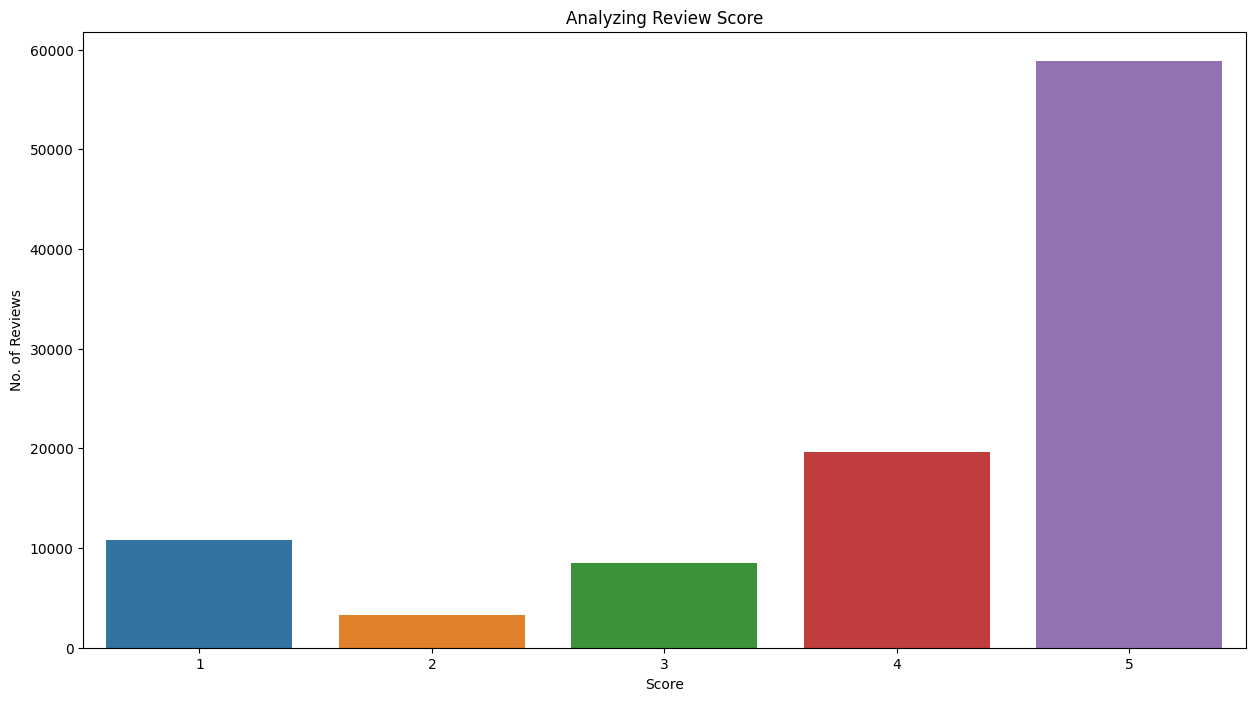

In [182]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=df_final)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')
sns.set(font_scale=2)

In [183]:
df_final["review_score"].value_counts() / df_final["review_score"].count() * 100

5    58.235300
4    19.386372
1    10.653897
3     8.432686
2     3.291745
Name: review_score, dtype: float64

In [184]:
df_final["review_score"].value_counts()

5    58859
4    19594
1    10768
3     8523
2     3327
Name: review_score, dtype: int64

Text(0, 0.5, 'No. of Orders')

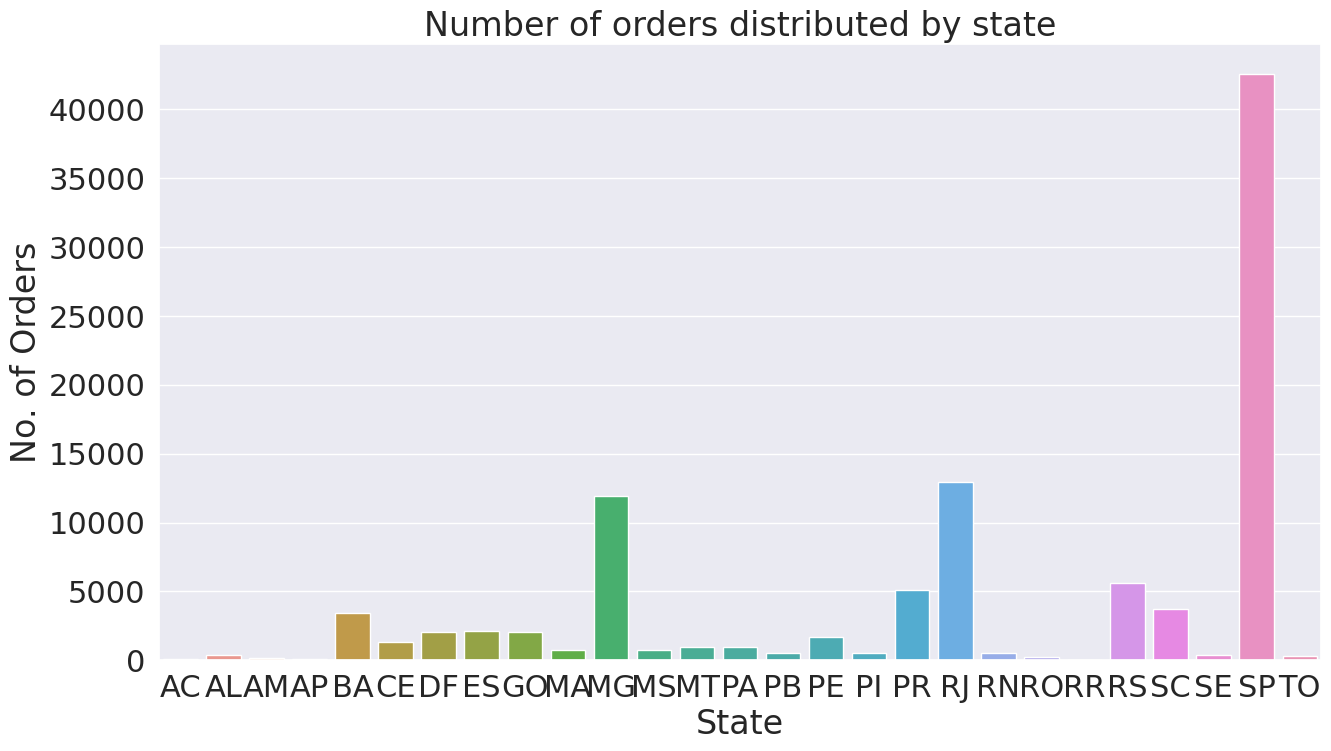

In [185]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=df_final)
plt.title("""Number of orders distributed by state""")
plt.xlabel('State')
plt.ylabel('No. of Orders')

In [186]:
df_final["customer_state"].value_counts() / df_final["customer_state"].count() * 100

SP    42.147599
RJ    12.803871
MG    11.798637
RS     5.546596
PR     5.075640
SC     3.656835
BA     3.403548
ES     2.071811
GO     2.020362
DF     2.001563
PE     1.645378
CE     1.313928
PA     0.975552
MT     0.929050
MA     0.740074
MS     0.729190
PB     0.529331
RN     0.494702
PI     0.490744
AL     0.408624
SE     0.342334
TO     0.286927
RO     0.248340
AM     0.150389
AC     0.079152
AP     0.071237
RR     0.038587
Name: customer_state, dtype: float64

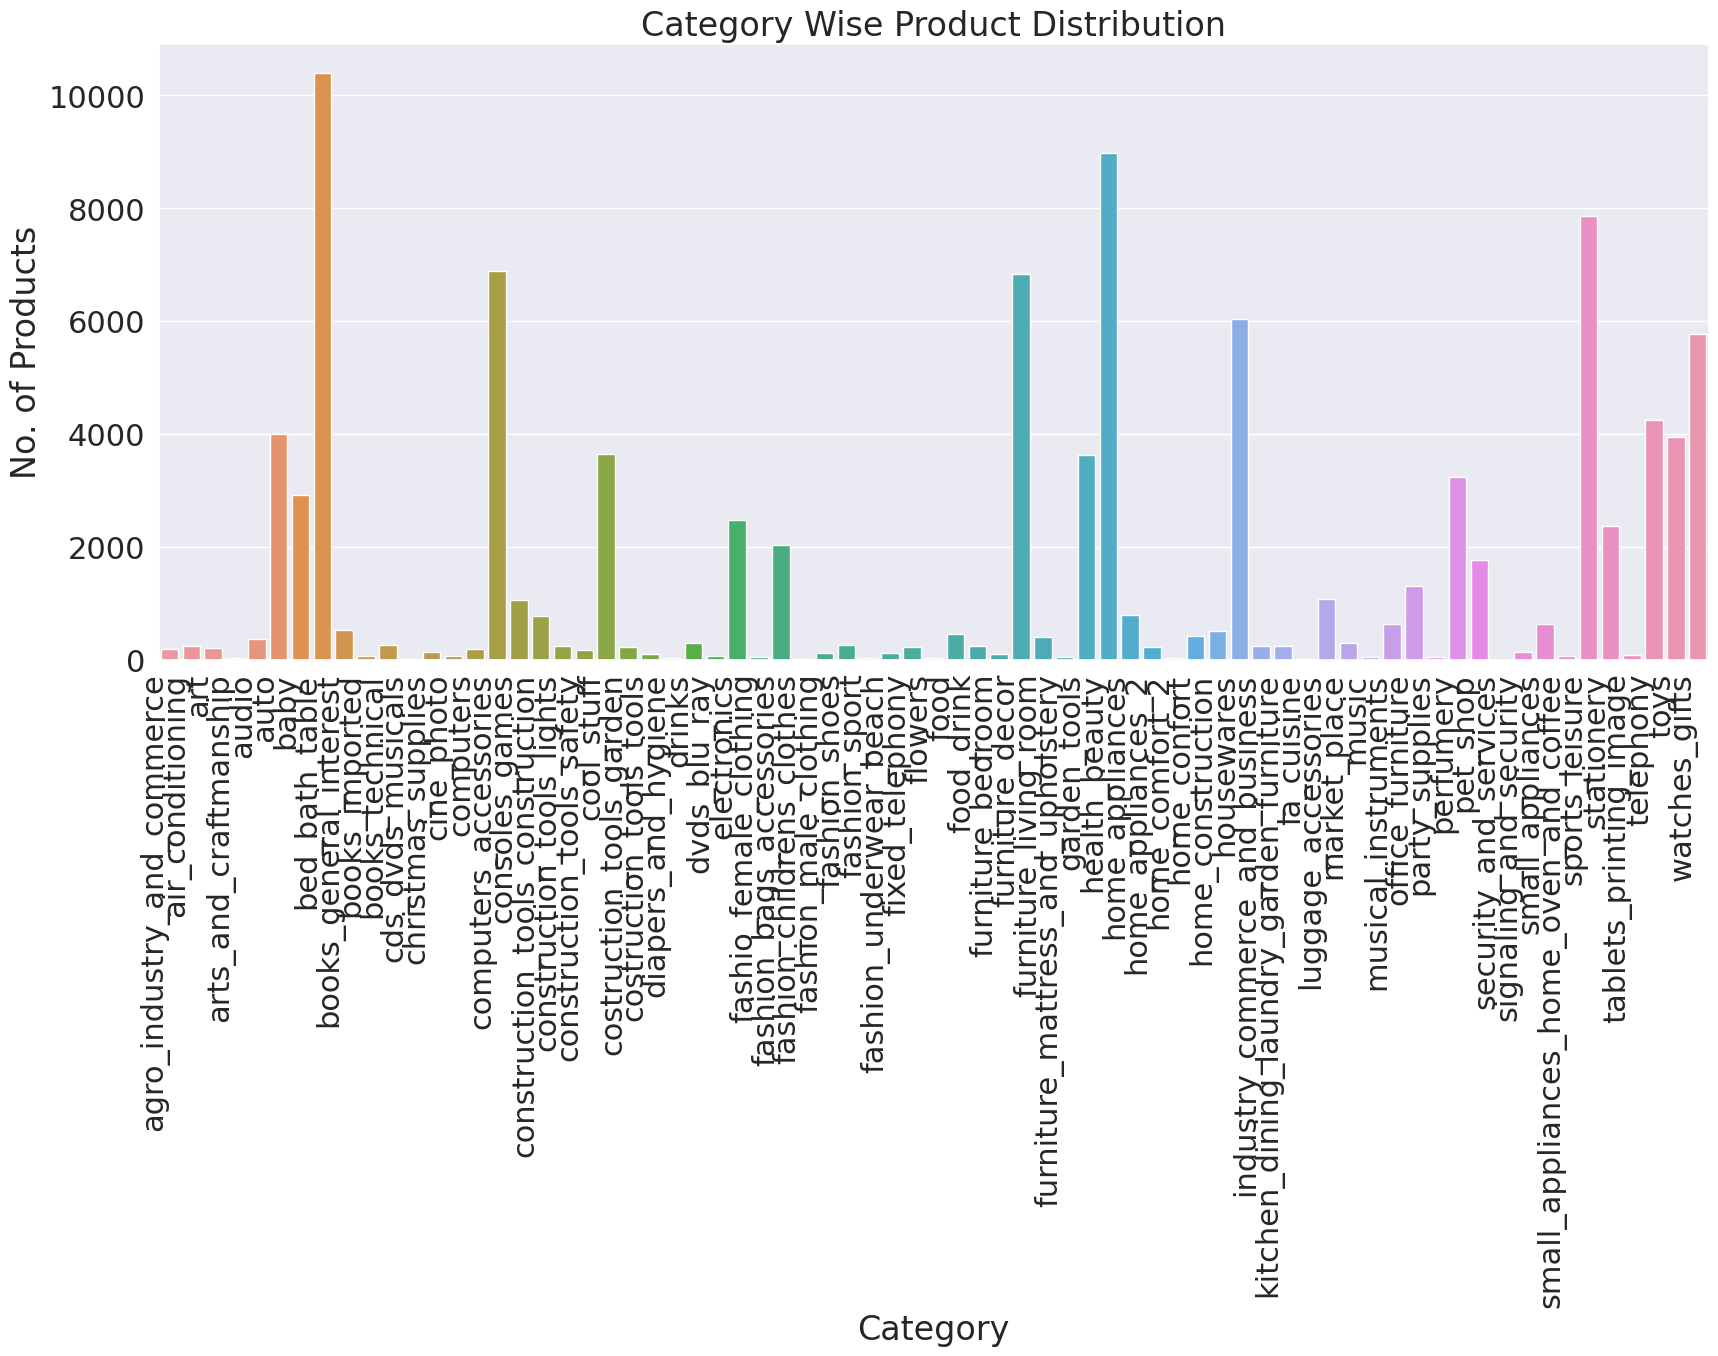

In [187]:
# plotting the category wise distribution of products
plt.figure(figsize=(20,8))
ax=sns.countplot(x='product_category_name_english', data=df_final)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')
plt.show()

## Effect on Order duration performance

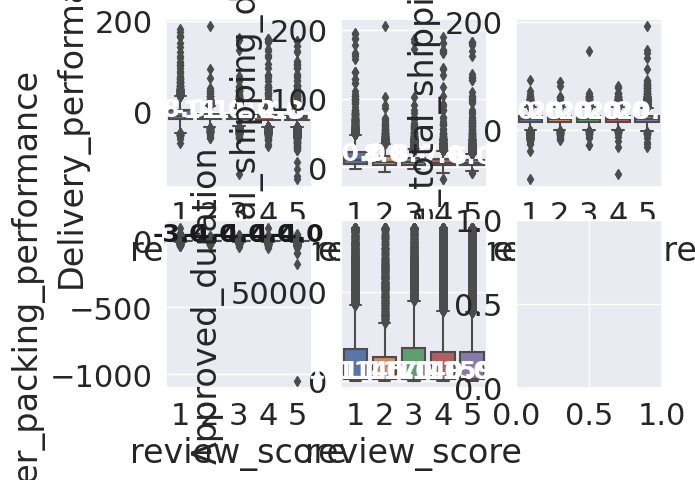

In [188]:
fig, axes = plt.subplots(2, 3)

sns.set(rc={"figure.figsize":(30, 20)},font_scale=1.5)
p1=sns.boxplot(x=df_final['review_score'], y=df_final['Delivery_performance'], orient='v', ax=axes[0][0])
medians = df_final.groupby(['review_score'])['Delivery_performance'].median()
vertical_offset = df_final['Delivery_performance'].median() * 0.05 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p2=sns.boxplot(x=df_final['review_score'], y=df_final['Total_shipping_date'], orient='v', ax=axes[0][1])
medians = df_final.groupby(['review_score'])['Total_shipping_date'].median()
vertical_offset = df_final['Total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p2.get_xticks():
  p2.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p3=sns.boxplot(x=df_final['review_score'], y=df_final['Estimate_total_shipping_date'], orient='v', ax=axes[0][2])
medians = df_final.groupby(['review_score'])['Estimate_total_shipping_date'].median()
vertical_offset = df_final['Estimate_total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p3.get_xticks():
  p3.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p4=sns.boxplot(x=df_final['review_score'], y=df_final['Seller_packing_performance'], orient='v', ax=axes[1][0])
medians = df_final.groupby(['review_score'])['Seller_packing_performance'].median()
vertical_offset = df_final['Seller_packing_performance'].median() * 0.05 # offset from median for display

for xtick in p4.get_xticks():
  p4.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='k',weight='semibold')

p5=sns.boxplot(x=df_final['review_score'], y=df_final['Approved_duration'], orient='v', ax=axes[1][1])
medians = df_final.groupby(['review_score'])['Approved_duration'].median()
vertical_offset = df_final['Approved_duration'].median() * 0.05 # offset from median for display

for xtick in p5.get_xticks():
  p5.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

plt.show()

## Features correlation

In [189]:
corr = df_final.corr()
corr['review_score']

<ipython-input-189-c72ec58ec420>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


order_item_id                  -0.078359
price                          -0.020225
freight_value                  -0.066873
product_name_lenght            -0.016349
product_description_lenght      0.018895
product_photos_qty              0.017871
product_weight_g               -0.028021
product_length_cm              -0.021961
product_height_cm              -0.015513
product_width_cm               -0.016453
payment_value                  -0.054032
review_score                    1.000000
Seller_packing_performance     -0.080638
Approved_duration              -0.006501
Delivery_performance           -0.246804
Total_shipping_date            -0.284102
Estimate_total_shipping_date    0.002680
day_of_week                    -0.010136
freight_value_per_product      -0.027234
Cost_per_delivery_size         -0.027873
packing_density                 0.000182
Name: review_score, dtype: float64

<ipython-input-190-243819df809a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_final.corr().round(2)


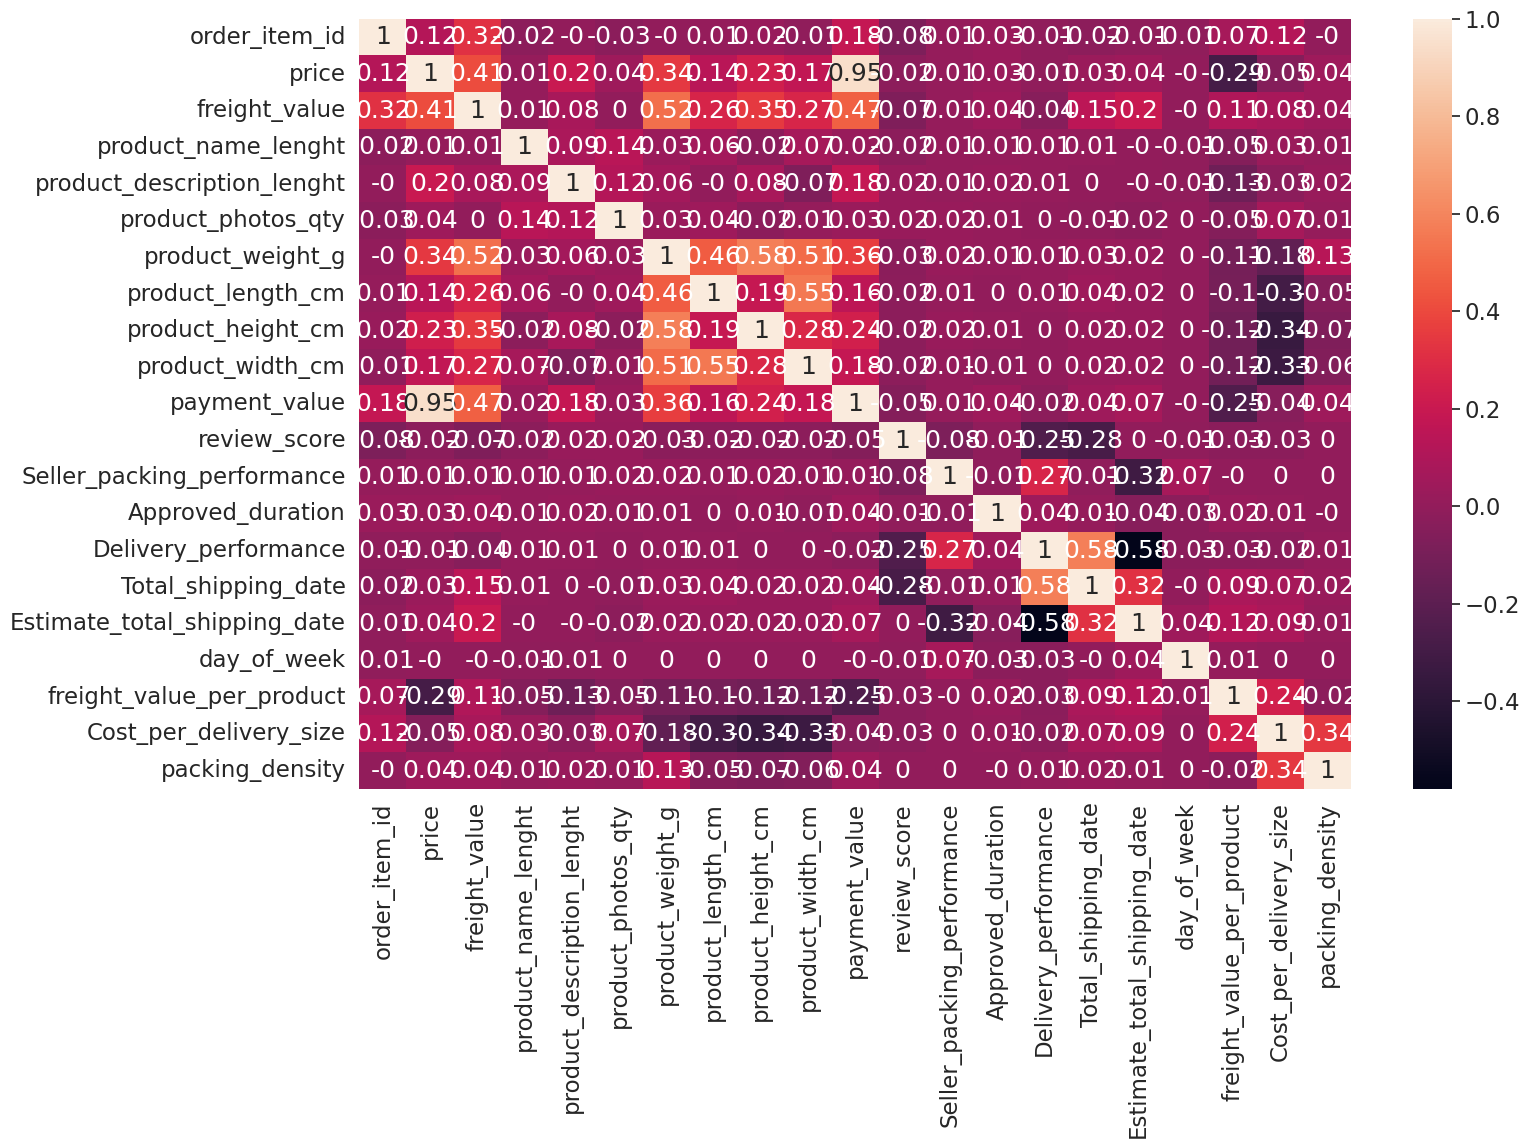

In [190]:
plt.figure(figsize=(16, 10))
correlation_matrix = df_final.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()
sns.set(font_scale=0.5)

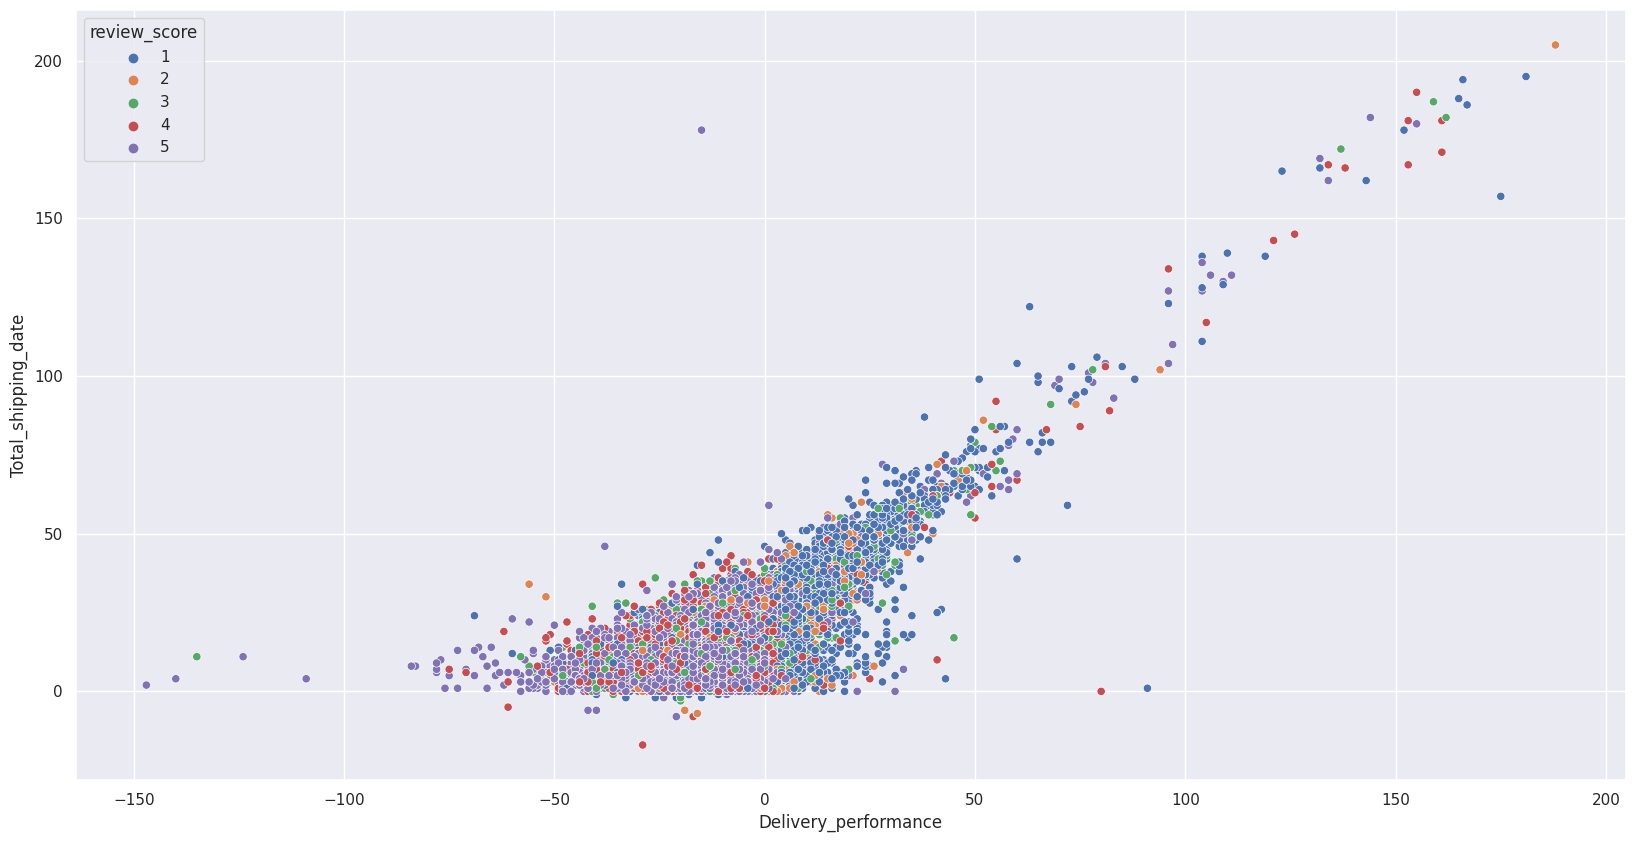

In [191]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_final, x="Delivery_performance", y="Total_shipping_date", hue="review_score",palette="deep")
plt.show()

# Focusing on the most selling state

In [192]:
df_final["customer_state"].value_counts() / df_final["customer_state"].count() * 100

SP    42.147599
RJ    12.803871
MG    11.798637
RS     5.546596
PR     5.075640
SC     3.656835
BA     3.403548
ES     2.071811
GO     2.020362
DF     2.001563
PE     1.645378
CE     1.313928
PA     0.975552
MT     0.929050
MA     0.740074
MS     0.729190
PB     0.529331
RN     0.494702
PI     0.490744
AL     0.408624
SE     0.342334
TO     0.286927
RO     0.248340
AM     0.150389
AC     0.079152
AP     0.071237
RR     0.038587
Name: customer_state, dtype: float64

In [193]:
df_final_state = df_final[df_final['customer_state']=="SP"]

In [194]:
df_final_state.head()

order_id                         seller_id  \
13  9bd5ab93fc163dd17a9d531c39806e05  48436dade18ac8b2bce089ec2a041202   
20  03054d8a8eefc2981cfad06f58e27979  48436dade18ac8b2bce089ec2a041202   
24  a975758d17a9e095a496f4283d9c3aca  48436dade18ac8b2bce089ec2a041202   
26  e3aa3b61037e281dedb26da2882983ae  48436dade18ac8b2bce089ec2a041202   
27  38da3029219c1f40f3eaaae897430c3f  48436dade18ac8b2bce089ec2a041202   

                          product_id  order_item_id  price  freight_value  \
13  ec02a5d380128f7a188e9ce8f3ddd832              1  132.9          21.42   
20  3e31fd1419cc4cd6adad1925e72e3a03              1   58.9          15.16   
24  3e31fd1419cc4cd6adad1925e72e3a03              1   55.9          15.14   
26  3e31fd1419cc4cd6adad1925e72e3a03              1   54.9          15.13   
27  2423252b2432f1803e4f29e0974c6cf7              1  139.9          18.23   

    product_name_lenght  product_description_lenght  product_photos_qty  \
13                 59.0                       599.0                 2.0   
20                 52.0                      1170.0                 1.0   
24                 52.0                      1170.0                 1.0   
26                 52.0                      1170.0                 1.0   
27                 60.0                       919.0                 5.0   

    product_weight_g  ...  review_score  Seller_packing_performance  \
13            2275.0  ...             5                           0   
20             400.0  ...             5                           0   
24             400.0  ...             4                          -5   
26             400.0  ...             5                          -1   
27            1167.0  ...             5                           0   

    Approved_duration Delivery_performance Total_shipping_date  \
13                451                   -7                  12   
20                589                   -6                  10   
24               4552                   -9                  12   
26               3301                  -17                   2   
27              68989                   -8                   6   

   Estimate_total_shipping_date day_of_week freight_value_per_product  \
13                           18           2                  0.161174   
20                           15           0                  0.257385   
24                           20           3                  0.270841   
26                           19           3                  0.275592   
27                           13           1                  0.130307   

   Cost_per_delivery_size  packing_density  
13               0.001058         0.112346  
20               0.005513         0.145455  
24               0.005505         0.145455  
26               0.005502         0.145455  
27               0.000904         0.057887  

[5 rows x 34 columns]

In [195]:
df_final_state["review_score"].value_counts()

5    25935
4     8241
1     3687
3     3449
2     1287
Name: review_score, dtype: int64

## Exploratory data analysis (EDA) & Visualization on state

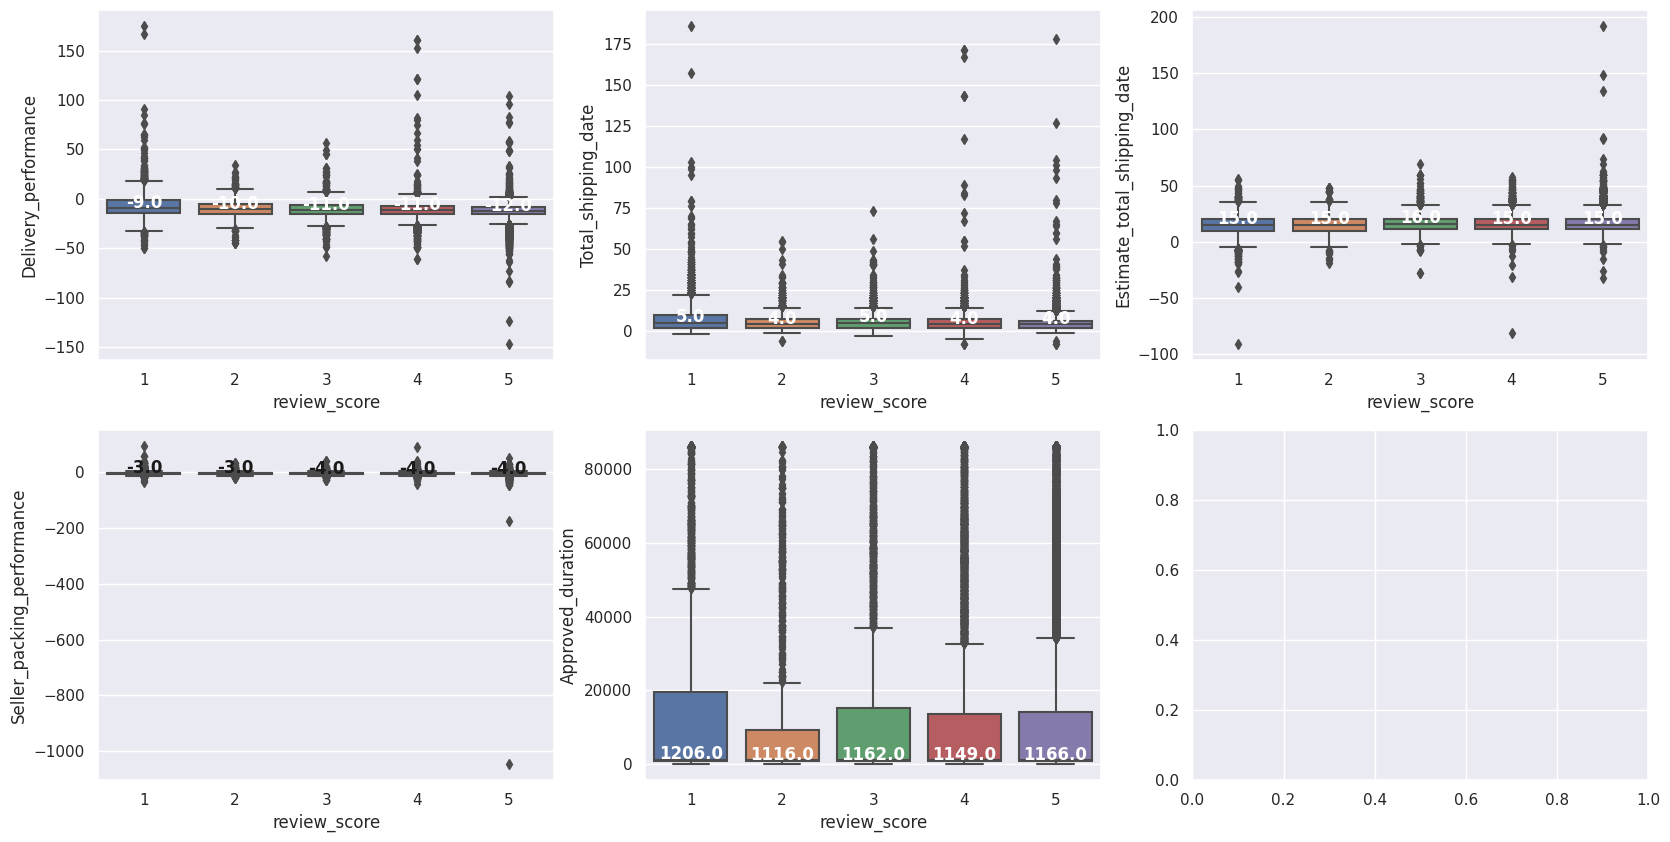

In [196]:
fig, axes = plt.subplots(2, 3)
sns.set(rc={"figure.figsize":(30, 20)})
p1=sns.boxplot(x=df_final_state['review_score'], y=df_final_state['Delivery_performance'], orient='v', ax=axes[0][0])
medians = df_final_state.groupby(['review_score'])['Delivery_performance'].median()
vertical_offset = df_final_state['Delivery_performance'].median() * 0.05 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p2=sns.boxplot(x=df_final_state['review_score'], y=df_final_state['Total_shipping_date'], orient='v', ax=axes[0][1])
medians = df_final_state.groupby(['review_score'])['Total_shipping_date'].median()
vertical_offset = df_final_state['Total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p2.get_xticks():
  p2.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p3=sns.boxplot(x=df_final_state['review_score'], y=df_final_state['Estimate_total_shipping_date'], orient='v', ax=axes[0][2])
medians = df_final_state.groupby(['review_score'])['Estimate_total_shipping_date'].median()
vertical_offset = df_final_state['Estimate_total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p3.get_xticks():
  p3.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p4=sns.boxplot(x=df_final_state['review_score'], y=df_final_state['Seller_packing_performance'], orient='v', ax=axes[1][0])
medians = df_final_state.groupby(['review_score'])['Seller_packing_performance'].median()
vertical_offset = df_final_state['Seller_packing_performance'].median() * 0.05 # offset from median for display

for xtick in p4.get_xticks():
  p4.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='k',weight='semibold')

p5=sns.boxplot(x=df_final_state['review_score'], y=df_final_state['Approved_duration'], orient='v', ax=axes[1][1])
medians = df_final_state.groupby(['review_score'])['Approved_duration'].median()
vertical_offset = df_final_state['Approved_duration'].median() * 0.05 # offset from median for display

for xtick in p5.get_xticks():
  p5.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.show()

In [197]:
corr = df_final_state.corr()
corr['review_score']

<ipython-input-197-effd6ba342fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final_state.corr()


order_item_id                  -0.081937
price                          -0.010706
freight_value                  -0.053552
product_name_lenght            -0.018460
product_description_lenght      0.008628
product_photos_qty              0.009659
product_weight_g               -0.026885
product_length_cm              -0.019938
product_height_cm              -0.006126
product_width_cm               -0.023160
payment_value                  -0.046055
review_score                    1.000000
Seller_packing_performance     -0.067396
Approved_duration              -0.008706
Delivery_performance           -0.157298
Total_shipping_date            -0.183739
Estimate_total_shipping_date    0.031640
day_of_week                    -0.009817
freight_value_per_product      -0.017935
Cost_per_delivery_size         -0.021554
packing_density                -0.000387
Name: review_score, dtype: float64

# Focusing on seller

In [198]:
df_final["seller_id"].value_counts()

6560211a19b47992c3666cc44a7e94c0    1993
4a3ca9315b744ce9f8e9374361493884    1916
cc419e0650a3c5ba77189a1882b7556a    1719
1f50f920176fa81dab994f9023523100    1500
da8622b14eb17ae2831f4ac5b9dab84a    1480
                                    ... 
ad8ada0ffa993cb1197d102d9ab21a3e       0
f09e26011d833ddab11593c1a097a92a       0
f0ec6a2adb05c62655a26dd347b8dede       0
101921376b577a4540dc30e9009133ca       0
4bc3d93e4a5f88a598d3d8ce4ae510b3       0
Name: seller_id, Length: 3026, dtype: int64

In [199]:
df_final_seller = df_final[df_final['seller_id']=="6560211a19b47992c3666cc44a7e94c0"]

In [200]:
df_final_seller.head()

order_id                         seller_id  \
9733  001021efaa8636c29475e7734483457d  6560211a19b47992c3666cc44a7e94c0   
9734  03b9c1e9a4406645c06dde26f4a704e9  6560211a19b47992c3666cc44a7e94c0   
9735  27f34f7957260b0d9e561139a5752836  6560211a19b47992c3666cc44a7e94c0   
9737  34757b625ecbf90b9c55b00da1040e66  6560211a19b47992c3666cc44a7e94c0   
9738  351d5d1e18d0b2bc2024ff1655911dd1  6560211a19b47992c3666cc44a7e94c0   

                            product_id  order_item_id  price  freight_value  \
9733  5d7c23067ed3fc8c6e699b9373d5890b              1   49.0          15.10   
9734  5d7c23067ed3fc8c6e699b9373d5890b              1   69.0          24.97   
9735  5d7c23067ed3fc8c6e699b9373d5890b              1   59.0          19.10   
9737  5d7c23067ed3fc8c6e699b9373d5890b              1   49.0          11.85   
9738  5d7c23067ed3fc8c6e699b9373d5890b              1   49.0          22.85   

      product_name_lenght  product_description_lenght  product_photos_qty  \
9733                 54.0                       151.0                 3.0   
9734                 54.0                       151.0                 3.0   
9735                 54.0                       151.0                 3.0   
9737                 54.0                       151.0                 3.0   
9738                 54.0                       151.0                 3.0   

      product_weight_g  ...  review_score  Seller_packing_performance  \
9733             250.0  ...             4                          -6   
9734             250.0  ...             5                          -6   
9735             250.0  ...             4                          -8   
9737             250.0  ...             5                          -3   
9738             250.0  ...             4                          -7   

      Approved_duration Delivery_performance Total_shipping_date  \
9733                507                  -15                   8   
9734                884                  -25                   9   
9735                783                  -28                  16   
9737                782                  -14                   7   
9738              38544                  -27                  11   

     Estimate_total_shipping_date day_of_week freight_value_per_product  \
9733                           23           1                  0.308163   
9734                           33           0                  0.361884   
9735                           43           1                  0.323729   
9737                           21           0                  0.241837   
9738                           37           4                  0.466327   

     Cost_per_delivery_size  packing_density  
9733               0.023594         0.390625  
9734               0.039016         0.390625  
9735               0.029844         0.390625  
9737               0.018516         0.390625  
9738               0.035703         0.390625  

[5 rows x 34 columns]

In [201]:
df_final_seller["review_score"].value_counts()

5    1026
4     417
1     246
3     212
2      92
Name: review_score, dtype: int64

## Exploratory data analysis (EDA) & Visualization on seller

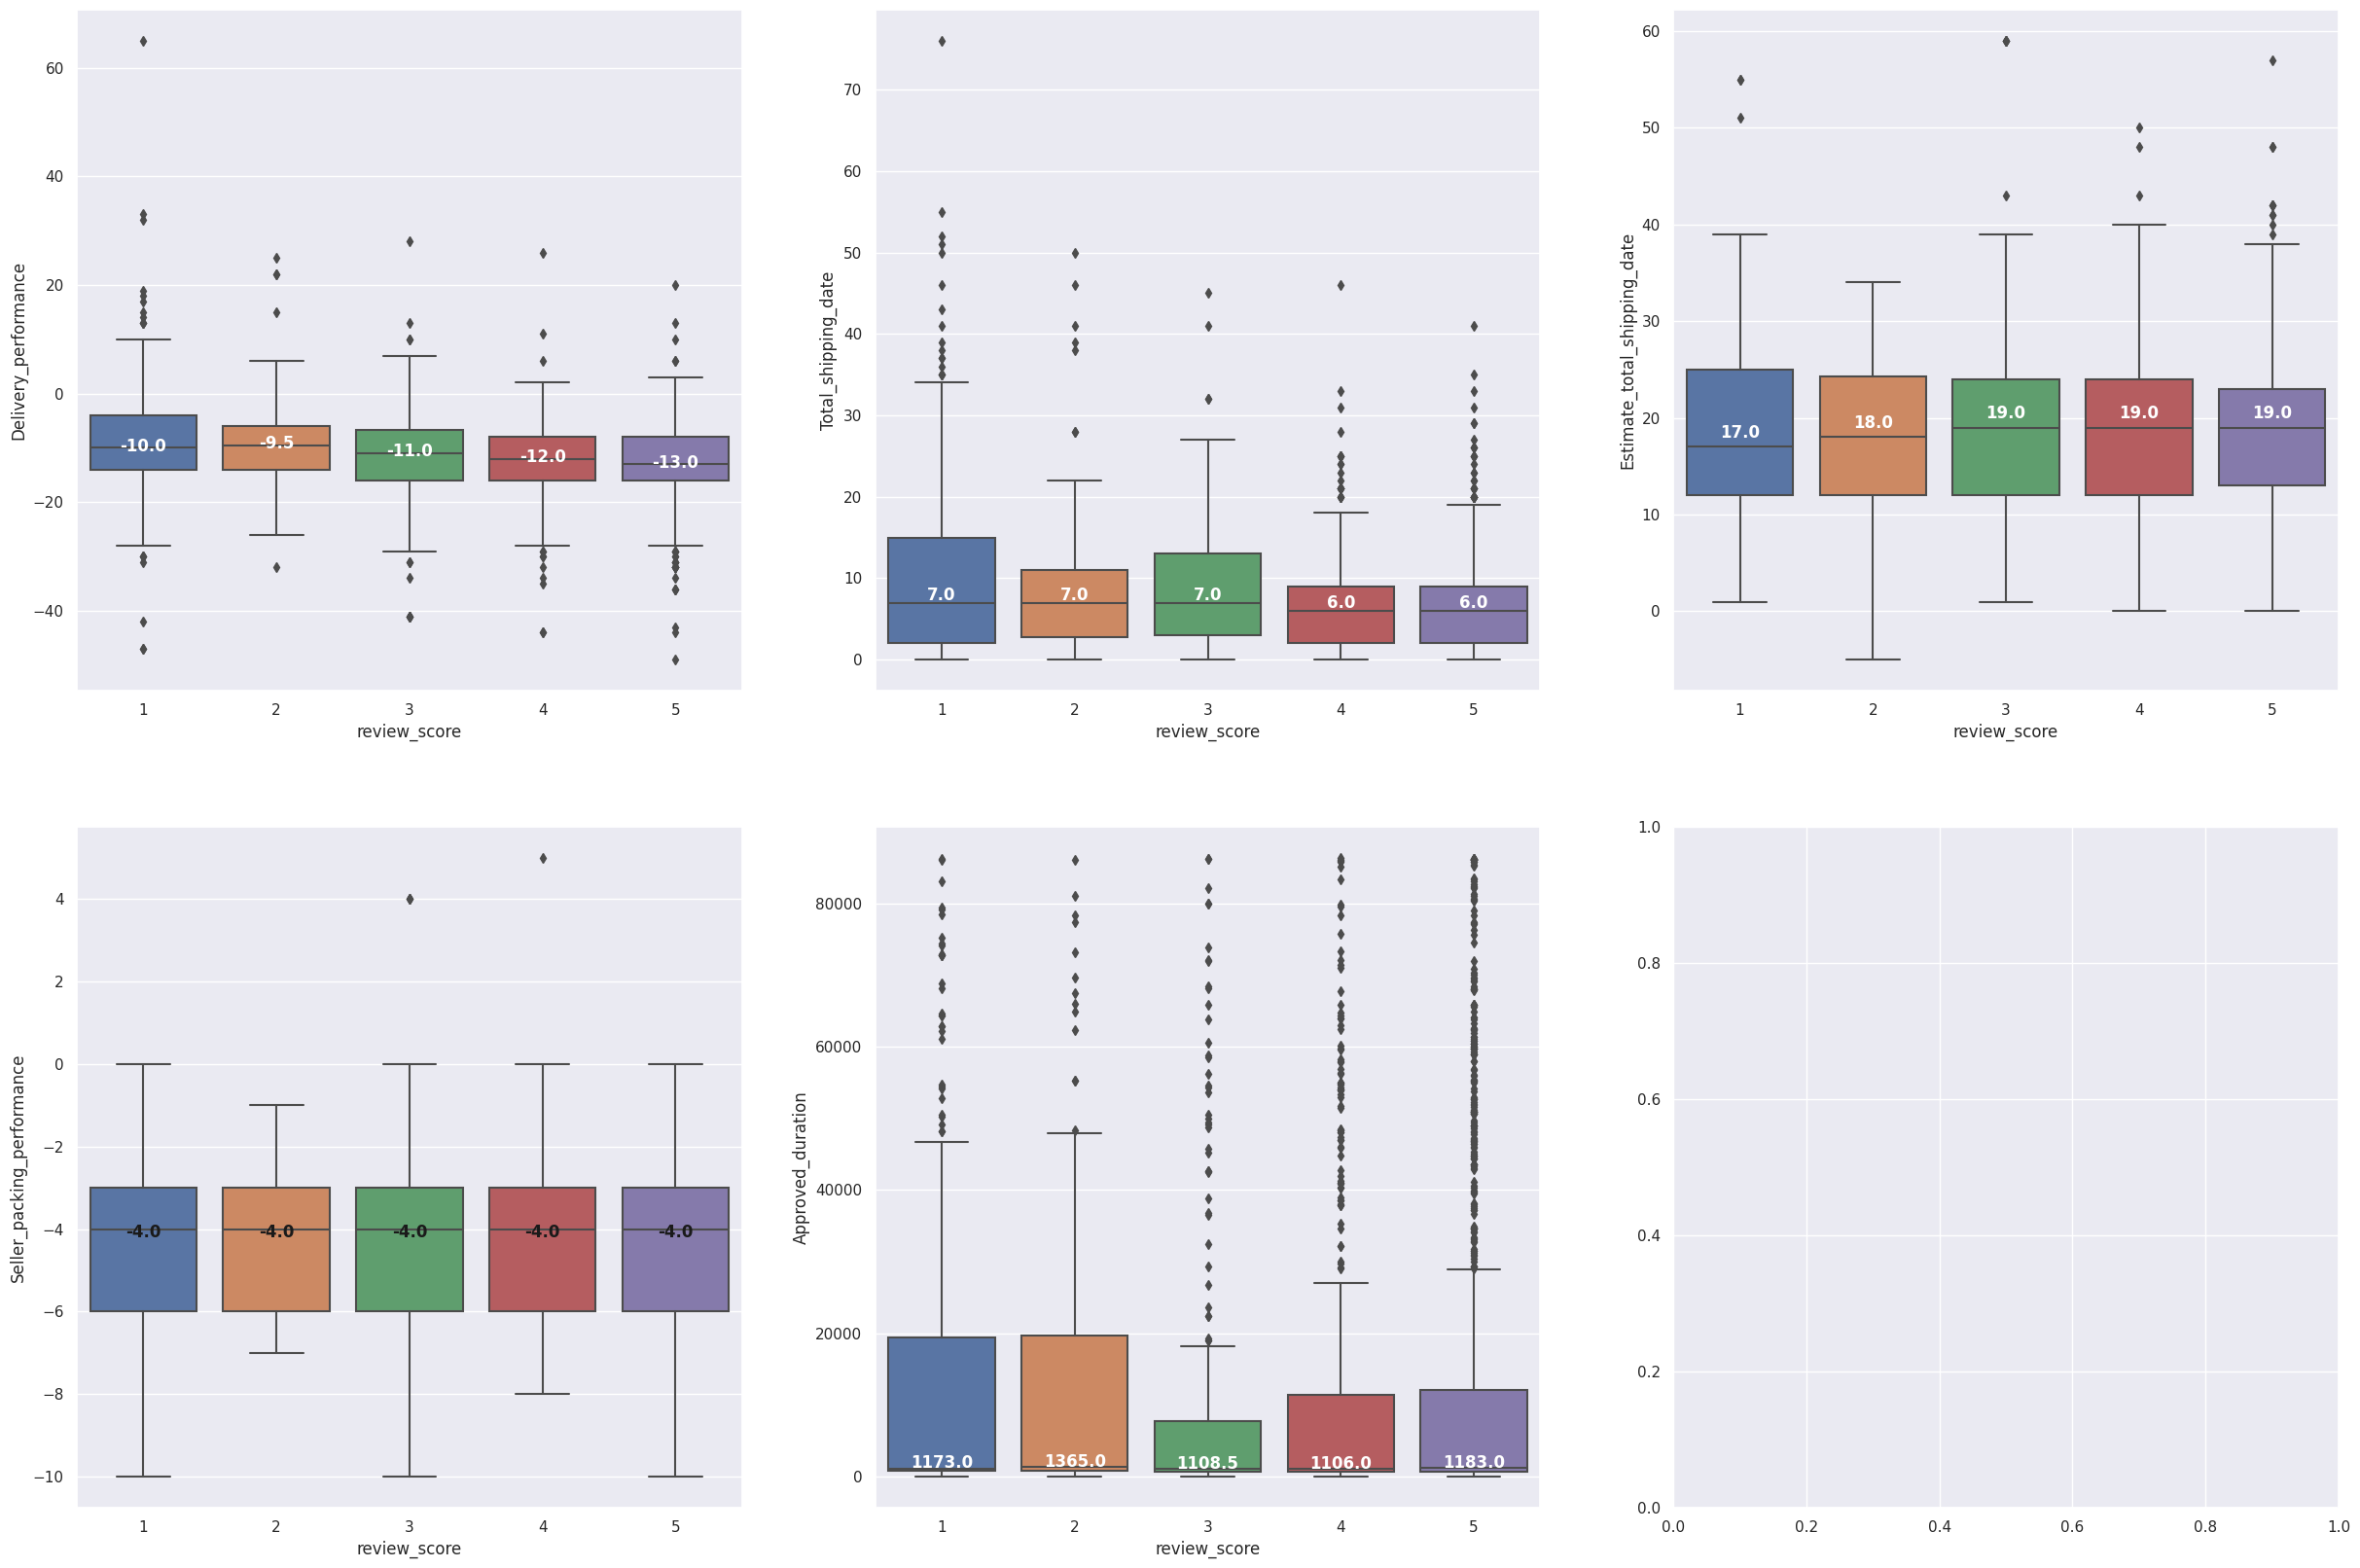

In [202]:
fig, axes = plt.subplots(2, 3)
sns.set(rc={"figure.figsize":(30, 20)})
p1=sns.boxplot(x=df_final_seller['review_score'], y=df_final_seller['Delivery_performance'], orient='v', ax=axes[0][0])
medians = df_final_seller.groupby(['review_score'])['Delivery_performance'].median()
vertical_offset = df_final_seller['Delivery_performance'].median() * 0.05 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p2=sns.boxplot(x=df_final_seller['review_score'], y=df_final_seller['Total_shipping_date'], orient='v', ax=axes[0][1])
medians = df_final_seller.groupby(['review_score'])['Total_shipping_date'].median()
vertical_offset = df_final_seller['Total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p2.get_xticks():
  p2.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p3=sns.boxplot(x=df_final_seller['review_score'], y=df_final_seller['Estimate_total_shipping_date'], orient='v', ax=axes[0][2])
medians = df_final_seller.groupby(['review_score'])['Estimate_total_shipping_date'].median()
vertical_offset = df_final_seller['Estimate_total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p3.get_xticks():
  p3.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p4=sns.boxplot(x=df_final_seller['review_score'], y=df_final_seller['Seller_packing_performance'], orient='v', ax=axes[1][0])
medians = df_final_seller.groupby(['review_score'])['Seller_packing_performance'].median()
vertical_offset = df_final_seller['Seller_packing_performance'].median() * 0.05 # offset from median for display

for xtick in p4.get_xticks():
  p4.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='k',weight='semibold')

p5=sns.boxplot(x=df_final_seller['review_score'], y=df_final_seller['Approved_duration'], orient='v', ax=axes[1][1])
medians = df_final_seller.groupby(['review_score'])['Approved_duration'].median()
vertical_offset = df_final_seller['Approved_duration'].median() * 0.05 # offset from median for display

for xtick in p5.get_xticks():
  p5.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.show()

In [203]:
corr = df_final_seller.corr()
corr['review_score']

<ipython-input-203-fe54aa54c6cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final_seller.corr()


order_item_id                  -0.058175
price                          -0.010584
freight_value                  -0.039209
product_name_lenght            -0.002025
product_description_lenght     -0.047953
product_photos_qty              0.004829
product_weight_g               -0.006904
product_length_cm               0.014943
product_height_cm              -0.014037
product_width_cm               -0.013436
payment_value                  -0.119066
review_score                    1.000000
Seller_packing_performance     -0.010157
Approved_duration              -0.017246
Delivery_performance           -0.172432
Total_shipping_date            -0.213919
Estimate_total_shipping_date   -0.017063
day_of_week                    -0.033776
freight_value_per_product      -0.031637
Cost_per_delivery_size         -0.027198
packing_density                 0.005188
Name: review_score, dtype: float64

# Focusing on Product category

In [204]:
df_final["product_category_name_english"].value_counts()

bed_bath_table               10399
health_beauty                 8989
sports_leisure                7868
computers_accessories         6895
furniture_decor               6843
                             ...  
arts_and_craftmanship           24
la_cuisine                      15
cds_dvds_musicals               12
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64

In [205]:
df_final_product_cat = df_final[df_final['product_category_name_english']=="bed_bath_table"]

In [206]:
df_final_product_cat.head()

order_id                         seller_id  \
271  2e94b3f76e8e8c9aaca60e91b303c5f8  5b51032eddd242adc84c38acab88f23d   
276  a017bed18c5f129119f36a92642a1cc0  5b51032eddd242adc84c38acab88f23d   
278  ae8b5df90eaf220f63f5ed4865cd222c  5b51032eddd242adc84c38acab88f23d   
279  ae8b5df90eaf220f63f5ed4865cd222c  da8622b14eb17ae2831f4ac5b9dab84a   
280  ae8b5df90eaf220f63f5ed4865cd222c  da8622b14eb17ae2831f4ac5b9dab84a   

                           product_id  order_item_id  price  freight_value  \
271  a81fc5e66120ebdb295873f74a45c5b7              1  124.0          15.17   
276  444d53deb5d80250e5e44dd416f20298              1  259.0          19.64   
278  41da75141264c3bde21ecea85a4cb8b7              9  768.0          37.42   
279  429e7401fafb76436f15e86498bd7364              4  399.8          97.28   
280  9ddd762ee8a13576a809dc66f22aa2b5              2  199.9          23.38   

     product_name_lenght  product_description_lenght  product_photos_qty  \
271                 49.0                       528.0                 2.0   
276                 58.0                       584.0                 3.0   
278                 60.0                       629.0                 3.0   
279                 60.0                       233.0                 1.0   
280                 60.0                       233.0                 1.0   

     product_weight_g  ...  review_score  Seller_packing_performance  \
271            2350.0  ...             4                          -1   
276            2400.0  ...             5                         -10   
278            8800.0  ...             1                          -3   
279            2500.0  ...             1                          -3   
280            2600.0  ...             1                          -3   

     Approved_duration Delivery_performance Total_shipping_date  \
271                924                  -19                   3   
276              61336                  -33                   7   
278               1249                  -14                  13   
279               1249                  -14                  13   
280               1249                  -14                  13   

    Estimate_total_shipping_date day_of_week freight_value_per_product  \
271                           21           5                  0.122339   
276                           39           2                  0.075830   
278                           27           5                  0.048724   
279                           27           5                  0.243322   
280                           27           5                  0.116958   

    Cost_per_delivery_size  packing_density  
271               0.001741         0.269743  
276               0.001503         0.183655  
278               0.002863         0.673401  
279               0.008238         0.211721  
280               0.001980         0.220190  

[5 rows x 34 columns]

In [207]:
df_final_product_cat["review_score"].value_counts()

5    5424
4    2013
1    1433
3    1057
2     472
Name: review_score, dtype: int64

## Exploratory data analysis (EDA) & Visualization on product category

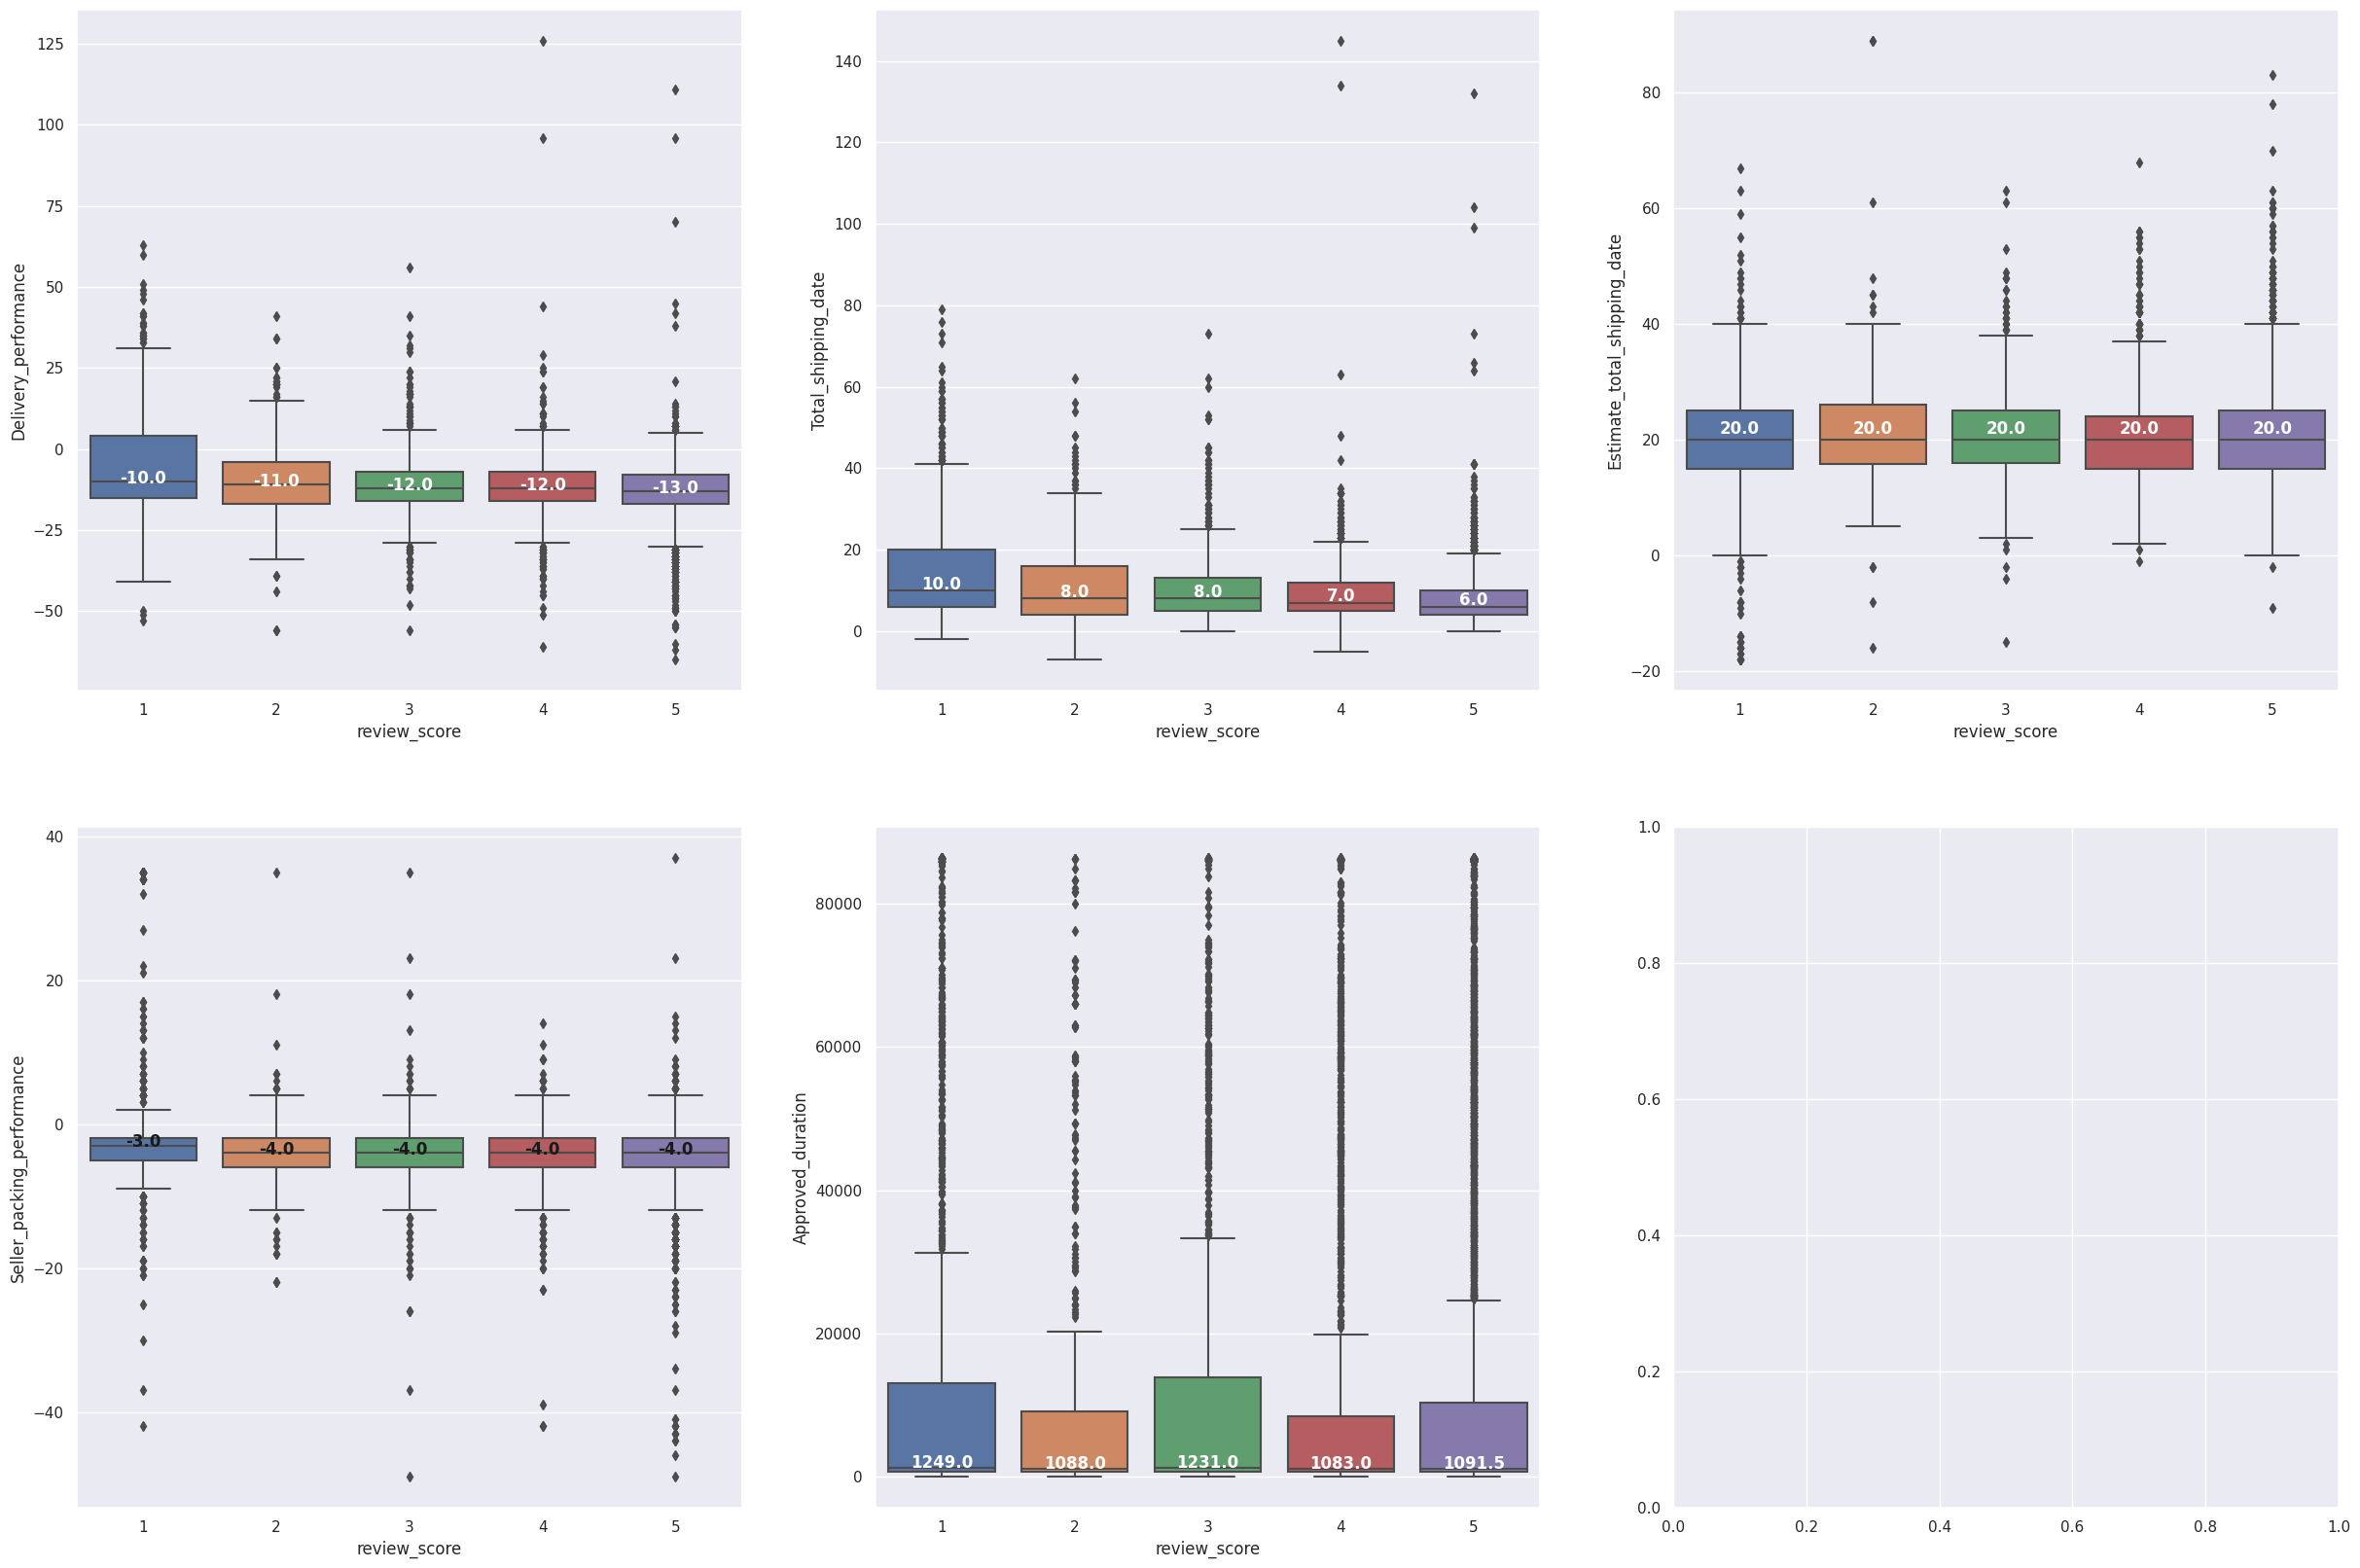

In [208]:
fig, axes = plt.subplots(2, 3)
sns.set(rc={"figure.figsize":(30, 20)})
p1=sns.boxplot(x=df_final_product_cat['review_score'], y=df_final_product_cat['Delivery_performance'], orient='v', ax=axes[0][0])
medians = df_final_product_cat.groupby(['review_score'])['Delivery_performance'].median()
vertical_offset = df_final_product_cat['Delivery_performance'].median() * 0.05 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p2=sns.boxplot(x=df_final_product_cat['review_score'], y=df_final_product_cat['Total_shipping_date'], orient='v', ax=axes[0][1])
medians = df_final_product_cat.groupby(['review_score'])['Total_shipping_date'].median()
vertical_offset = df_final_product_cat['Total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p2.get_xticks():
  p2.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p3=sns.boxplot(x=df_final_product_cat['review_score'], y=df_final_product_cat['Estimate_total_shipping_date'], orient='v', ax=axes[0][2])
medians = df_final_product_cat.groupby(['review_score'])['Estimate_total_shipping_date'].median()
vertical_offset = df_final_product_cat['Estimate_total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p3.get_xticks():
  p3.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

p4=sns.boxplot(x=df_final_product_cat['review_score'], y=df_final_product_cat['Seller_packing_performance'], orient='v', ax=axes[1][0])
medians = df_final_product_cat.groupby(['review_score'])['Seller_packing_performance'].median()
vertical_offset = df_final_product_cat['Seller_packing_performance'].median() * 0.05 # offset from median for display

for xtick in p4.get_xticks():
  p4.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='k',weight='semibold')

p5=sns.boxplot(x=df_final_product_cat['review_score'], y=df_final_product_cat['Approved_duration'], orient='v', ax=axes[1][1])
medians = df_final_product_cat.groupby(['review_score'])['Approved_duration'].median()
vertical_offset = df_final_product_cat['Approved_duration'].median() * 0.05 # offset from median for display

for xtick in p5.get_xticks():
  p5.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.show()

In [209]:
corr = df_final_product_cat.corr()
corr['review_score']

<ipython-input-209-bd91ec5af383>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final_product_cat.corr()


order_item_id                  -0.102341
price                           0.002321
freight_value                  -0.035158
product_name_lenght            -0.004903
product_description_lenght      0.018551
product_photos_qty              0.067673
product_weight_g                0.034467
product_length_cm               0.048438
product_height_cm              -0.014574
product_width_cm                0.020036
payment_value                  -0.105912
review_score                    1.000000
Seller_packing_performance     -0.115776
Approved_duration              -0.021100
Delivery_performance           -0.213670
Total_shipping_date            -0.269168
Estimate_total_shipping_date   -0.012249
day_of_week                    -0.047074
freight_value_per_product      -0.030966
Cost_per_delivery_size         -0.018991
packing_density                 0.013556
Name: review_score, dtype: float64

## Pickup a top 5 selling products

In [210]:
# Select to 5 categories
df_final["product_category_name_english"].value_counts().iloc[:5]

bed_bath_table           10399
health_beauty             8989
sports_leisure            7868
computers_accessories     6895
furniture_decor           6843
Name: product_category_name_english, dtype: int64

In [211]:
top_5=df_final["product_category_name_english"].value_counts().iloc[:5]
top_5_cat=top_5.index[0:5]

In [212]:
top_5_cat=[]

for i in range(len(top_5.index)):
  top_5_cat.append(top_5.index[i])


In [213]:
top_5_cat

['bed_bath_table',
 'health_beauty',
 'sports_leisure',
 'computers_accessories',
 'furniture_decor']

In [214]:
df_final_top5_cat=pd.DataFrame(data=df_final[df_final['product_category_name_english'].isin(top_5_cat)].reset_index(drop=True))
#df_final_top5_cat.drop(columns=['index'],inplace=True)
df_final_top5_cat.head(5)

order_id                         seller_id  \
0  000229ec398224ef6ca0657da4fc703e  5b51032eddd242adc84c38acab88f23d   
1  45211f00dfa76aed1c20d6910d973222  5b51032eddd242adc84c38acab88f23d   
2  45211f00dfa76aed1c20d6910d973222  5b51032eddd242adc84c38acab88f23d   
3  7a5d50c22fa322a528d125a704c8270c  5b51032eddd242adc84c38acab88f23d   
4  2e94b3f76e8e8c9aaca60e91b303c5f8  5b51032eddd242adc84c38acab88f23d   

                         product_id  order_item_id  price  freight_value  \
0  c777355d18b72b67abbeef9df44fd0fd              1  199.0          17.87   
1  c777355d18b72b67abbeef9df44fd0fd              2  199.0          20.08   
2  928c2c0fdf465581daac95380af04b3e              1  149.0          20.09   
3  c777355d18b72b67abbeef9df44fd0fd              1  199.0          17.87   
4  a81fc5e66120ebdb295873f74a45c5b7              1  124.0          15.17   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 59.0                       695.0                 2.0   
1                 59.0                       695.0                 2.0   
2                 59.0                       729.0                 2.0   
3                 59.0                       695.0                 2.0   
4                 49.0                       528.0                 2.0   

   product_weight_g  ...  review_score  Seller_packing_performance  \
0            3050.0  ...             5                          -3   
1            3050.0  ...             4                          -6   
2            2300.0  ...             4                          -6   
3            3050.0  ...             4                          -2   
4            2350.0  ...             4                          -1   

   Approved_duration Delivery_performance Total_shipping_date  \
0                899                  -14                   6   
1               6963                  -16                   7   
2               6963                  -16                   7   
3              85834                  -21                   1   
4                924                  -19                   3   

  Estimate_total_shipping_date day_of_week freight_value_per_product  \
0                           19           6                  0.089799   
1                           23           0                  0.100905   
2                           23           0                  0.134832   
3                           22           5                  0.089799   
4                           21           5                  0.122339   

  Cost_per_delivery_size  packing_density  
0               0.001262         0.215441  
1               0.001418         0.215441  
2               0.001537         0.176002  
3               0.001262         0.215441  
4               0.001741         0.269743  

[5 rows x 34 columns]

In [215]:
df_final_top5_cat.shape

(40994, 34)

In [216]:
df_final_top5_cat["product_category_name_english"].value_counts()

bed_bath_table             10399
health_beauty               8989
sports_leisure              7868
computers_accessories       6895
furniture_decor             6843
                           ...  
fashion_shoes                  0
fashion_sport                  0
fashion_underwear_beach        0
fixed_telephony                0
watches_gifts                  0
Name: product_category_name_english, Length: 71, dtype: int64

In [217]:
corr = df_final_top5_cat.corr()
corr['review_score']

<ipython-input-217-59ad5024e03f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final_top5_cat.corr()


order_item_id                  -0.086218
price                          -0.013682
freight_value                  -0.066330
product_name_lenght            -0.018220
product_description_lenght      0.033070
product_photos_qty              0.038502
product_weight_g               -0.010875
product_length_cm              -0.016754
product_height_cm              -0.015273
product_width_cm               -0.029138
payment_value                  -0.069331
review_score                    1.000000
Seller_packing_performance     -0.111414
Approved_duration              -0.010600
Delivery_performance           -0.239513
Total_shipping_date            -0.285042
Estimate_total_shipping_date    0.001018
day_of_week                    -0.015470
freight_value_per_product      -0.030654
Cost_per_delivery_size         -0.022856
packing_density                 0.001949
Name: review_score, dtype: float64

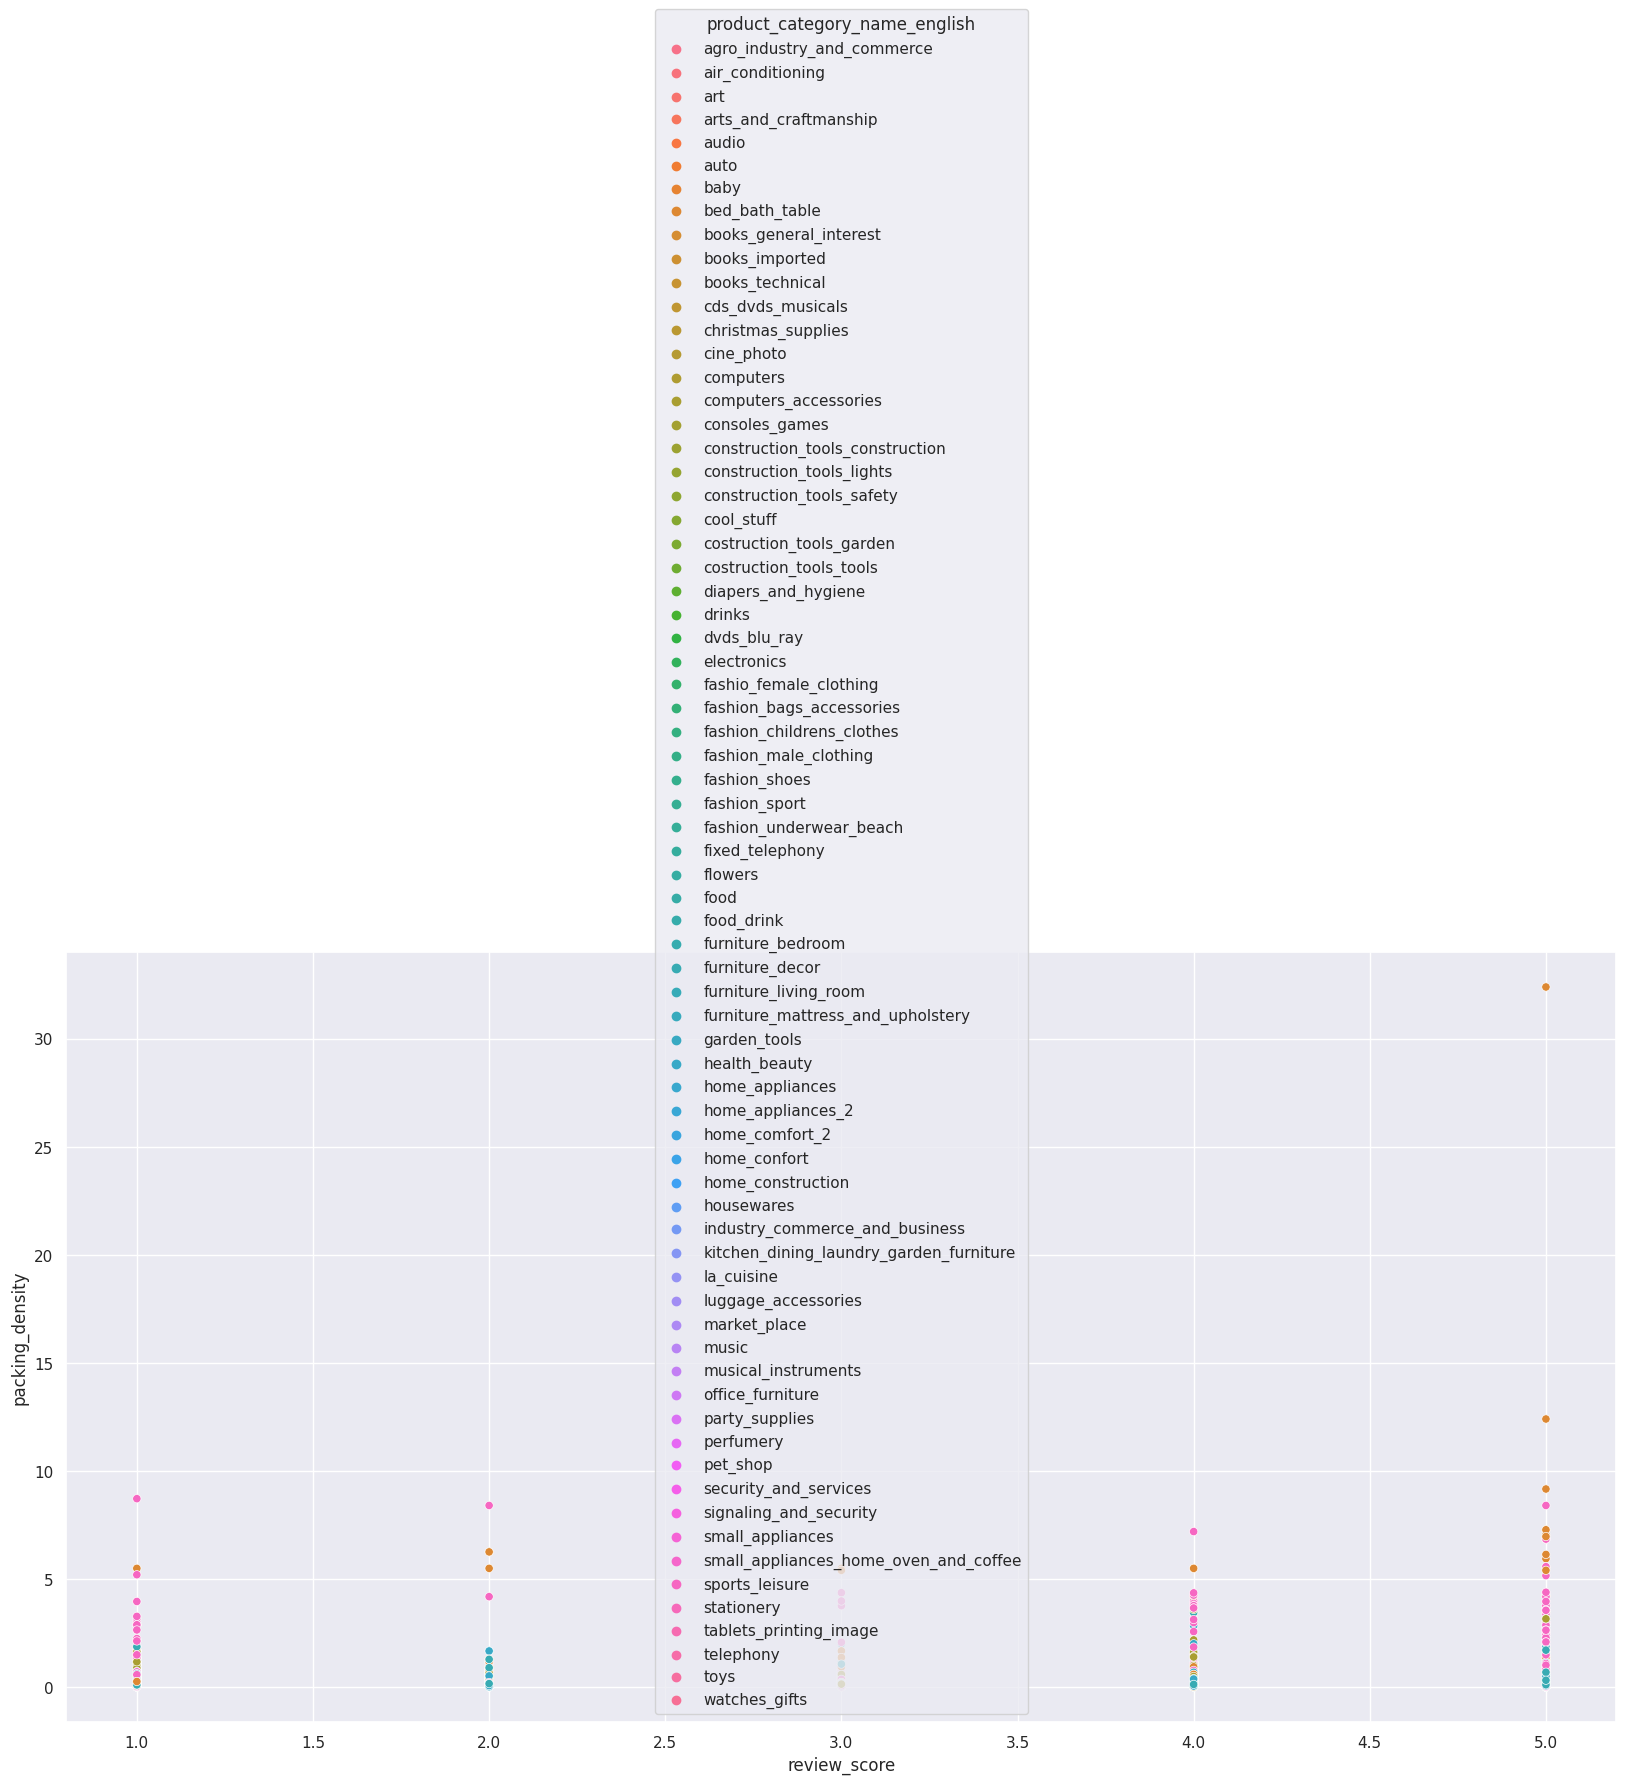

In [218]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_final_top5_cat[df_final_top5_cat['product_category_name_english'].isin(top_5_cat)], x="review_score", y="packing_density", hue='product_category_name_english')
plt.show()

# Test compare with packing density

In [219]:
df_product_group=df_final.groupby(df_final['product_category_name_english'])['packing_density'].mean().reset_index()

In [220]:
df_product_group.head(5)

product_category_name_english  packing_density
0    agro_industry_and_commerce         0.272347
1              air_conditioning         0.300201
2                           art         0.146811
3         arts_and_craftmanship         0.175998
4                         audio         0.538387

In [221]:
df_product_group['packing_density'].loc[df_product_group['product_category_name_english'] == 'furniture_decor'].values

array([0.16063386])

In [222]:
df_product_group.loc[df_product_group['product_category_name_english'] == 'furniture_decor']['packing_density'].values

array([0.16063386])

In [223]:
df_product_group['product_category_name_english'][0]

'agro_industry_and_commerce'

In [224]:
df_final['product_category_name_english']

0              cool_stuff
1              cool_stuff
2              cool_stuff
3              cool_stuff
4              cool_stuff
               ...       
103309    furniture_decor
103310    furniture_decor
103311        electronics
103312          computers
103313             drinks
Name: product_category_name_english, Length: 101071, dtype: category
Categories (71, object): ['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', ...,
                          'tablets_printing_image', 'telephony', 'toys', 'watches_gifts']

In [225]:
range(len(df_final))

range(0, 101071)

In [226]:
df_final

order_id                         seller_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1       130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2       532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3       6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4       7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
103309  fd607d0a02cb276bc764a15f80f0423f  2a73cba571d90c694b7caca072ccf6ce   
103310  fdaf98feac227eb978d8f33f36e0231d  d1aa1ec0839dcab73a6161130eb1f94a   
103311  fe68b52db13993f58175fa589125d345  3fefda3299e6dfaea3466ef346a3571a   
103312  fefacc66af859508bf1a7934eab1e97f  80ceebb4ee9b31afb6c6a916a574a1e2   
103313  ff701a7c869ad21de22a6994237c8a00  3e35a8bb43569389d3cebef0ce820f69   

                              product_id  order_item_id    price  \
0       4244733e06e7ecb4970a6e2683c13e61              1    58.90   
1       4244733e06e7ecb4970a6e2683c13e61              1    55.90   
2       4244733e06e7ecb4970a6e2683c13e61              1    64.90   
3       4244733e06e7ecb4970a6e2683c13e61              1    58.90   
4       4244733e06e7ecb4970a6e2683c13e61              1    58.90   
...                                  ...            ...      ...   
103309  02ad78835ec3f72e750d1dfa6a7e11b3              3   342.78   
103310  f739e9151702508b18f796c53005e5e9              1   119.90   
103311  f4135cbdece8245560f7be179533797a              1   209.00   
103312  69c590f7ffc7bf8db97190b6cb6ed62e              1  6729.00   
103313  5ff4076c0f01eeba4f728c9e3fa2653c              3    55.80   

        freight_value  product_name_lenght  product_description_lenght  \
0               13.29                 58.0                       598.0   
1               17.96                 58.0                       598.0   
2               18.33                 58.0                       598.0   
3               16.17                 58.0                       598.0   
4               13.29                 58.0                       598.0   
...               ...                  ...                         ...   
103309          38.70                 38.0                      1303.0   
103310          16.14                 44.0                       533.0   
103311          16.21                 32.0                      1306.0   
103312         193.21                 50.0                      1935.0   
103313          28.88                 28.0                       242.0   

        product_photos_qty  product_weight_g  ...  review_score  \
0                      4.0             650.0  ...             5   
1                      4.0             650.0  ...             5   
2                      4.0             650.0  ...             4   
3                      4.0             650.0  ...             5   
4                      4.0             650.0  ...             5   
...                    ...               ...  ...           ...   
103309                 2.0            1250.0  ...             5   
103310                 2.0            1000.0  ...             4   
103311                 3.0             500.0  ...             4   
103312                 4.0            5660.0  ...             1   
103313                 1.0            2000.0  ...             5   

        Seller_packing_performance  Approved_duration Delivery_performance  \
0                                0               2793                   -9   
1                                0              53511                  -13   
2                                0               7550                   -3   
3                               -5                986                  -16   
4                               -6                991                   -8   
...                            ...                ...                  ...   
103309                           5    

In [227]:
df_final.reset_index(inplace=True)

In [228]:
df_final.shape

(101071, 35)

In [229]:
range(len(df_final))

range(0, 101071)

In [230]:
x=[]
y=[]
product_box_size = pd.Series([])
for i in range(len(df_final)):
  x.append(df_final['product_category_name_english'][i])

for j in range(len(x)):
  y.append(df_product_group.loc[df_product_group['product_category_name_english'] == x[j]]['packing_density'].values)
  if df_final['packing_density'][j] > y[j][0]:
    product_box_size[j]="Very fit"
  else:
    product_box_size[j]="Box maybe too big"

df_final.insert(34, "product_box_size", product_box_size)

<ipython-input-230-c58138b9cfd0>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  product_box_size = pd.Series([])


In [231]:
df_final

index                          order_id  \
0            0  00010242fe8c5a6d1ba2dd792cb16214   
1            1  130898c0987d1801452a8ed92a670612   
2            2  532ed5e14e24ae1f0d735b91524b98b9   
3            3  6f8c31653edb8c83e1a739408b5ff750   
4            4  7d19f4ef4d04461989632411b7e588b9   
...        ...                               ...   
101066  103309  fd607d0a02cb276bc764a15f80f0423f   
101067  103310  fdaf98feac227eb978d8f33f36e0231d   
101068  103311  fe68b52db13993f58175fa589125d345   
101069  103312  fefacc66af859508bf1a7934eab1e97f   
101070  103313  ff701a7c869ad21de22a6994237c8a00   

                               seller_id                        product_id  \
0       48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61   
1       48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61   
2       48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61   
3       48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61   
4       48436dade18ac8b2bce089ec2a041202  4244733e06e7ecb4970a6e2683c13e61   
...                                  ...                               ...   
101066  2a73cba571d90c694b7caca072ccf6ce  02ad78835ec3f72e750d1dfa6a7e11b3   
101067  d1aa1ec0839dcab73a6161130eb1f94a  f739e9151702508b18f796c53005e5e9   
101068  3fefda3299e6dfaea3466ef346a3571a  f4135cbdece8245560f7be179533797a   
101069  80ceebb4ee9b31afb6c6a916a574a1e2  69c590f7ffc7bf8db97190b6cb6ed62e   
101070  3e35a8bb43569389d3cebef0ce820f69  5ff4076c0f01eeba4f728c9e3fa2653c   

        order_item_id    price  freight_value  product_name_lenght  \
0                   1    58.90          13.29                 58.0   
1                   1    55.90          17.96                 58.0   
2                   1    64.90          18.33                 58.0   
3                   1    58.90          16.17                 58.0   
4                   1    58.90          13.29                 58.0   
...               ...      ...            ...                  ...   
101066              3   342.78          38.70                 38.0   
101067              1   119.90          16.14                 44.0   
101068              1   209.00          16.21                 32.0   
101069              1  6729.00         193.21                 50.0   
101070              3    55.80          28.88                 28.0   

        product_description_lenght  product_photos_qty  ...  \
0                            598.0                 4.0  ...   
1                            598.0                 4.0  ...   
2                            598.0                 4.0  ...   
3                            598.0                 4.0  ...   
4                            598.0                 4.0  ...   
...                            ...                 ...  ...   
101066                      1303.0                 2.0  ...   
101067                       533.0                 2.0  ...   
101068                      1306.0                 3.0  ...   
101069                      1935.0                 4.0  ...   
101070                       242.0                 1.0  ...   

        Seller_packing_performance  Approved_duration  Delivery_performance  \
0                                0               2793                    -9   
1                                0              53511                   -13   
2                                0               7550                    -3   
3                               -5                986                   -16   
4                               -6                991                    -8   
...                            ...                ...                   ...   
101066                           5              61871                     0   
101067                           7              67777                     2   
101068                          -3              60005                   -18   
101069                           1              35696      

In [232]:
df_final.drop(columns=['index'],inplace=True)

In [233]:
df_final['product_box_size'].value_counts()

Box maybe too big    69999
Very fit             31072
Name: product_box_size, dtype: int64

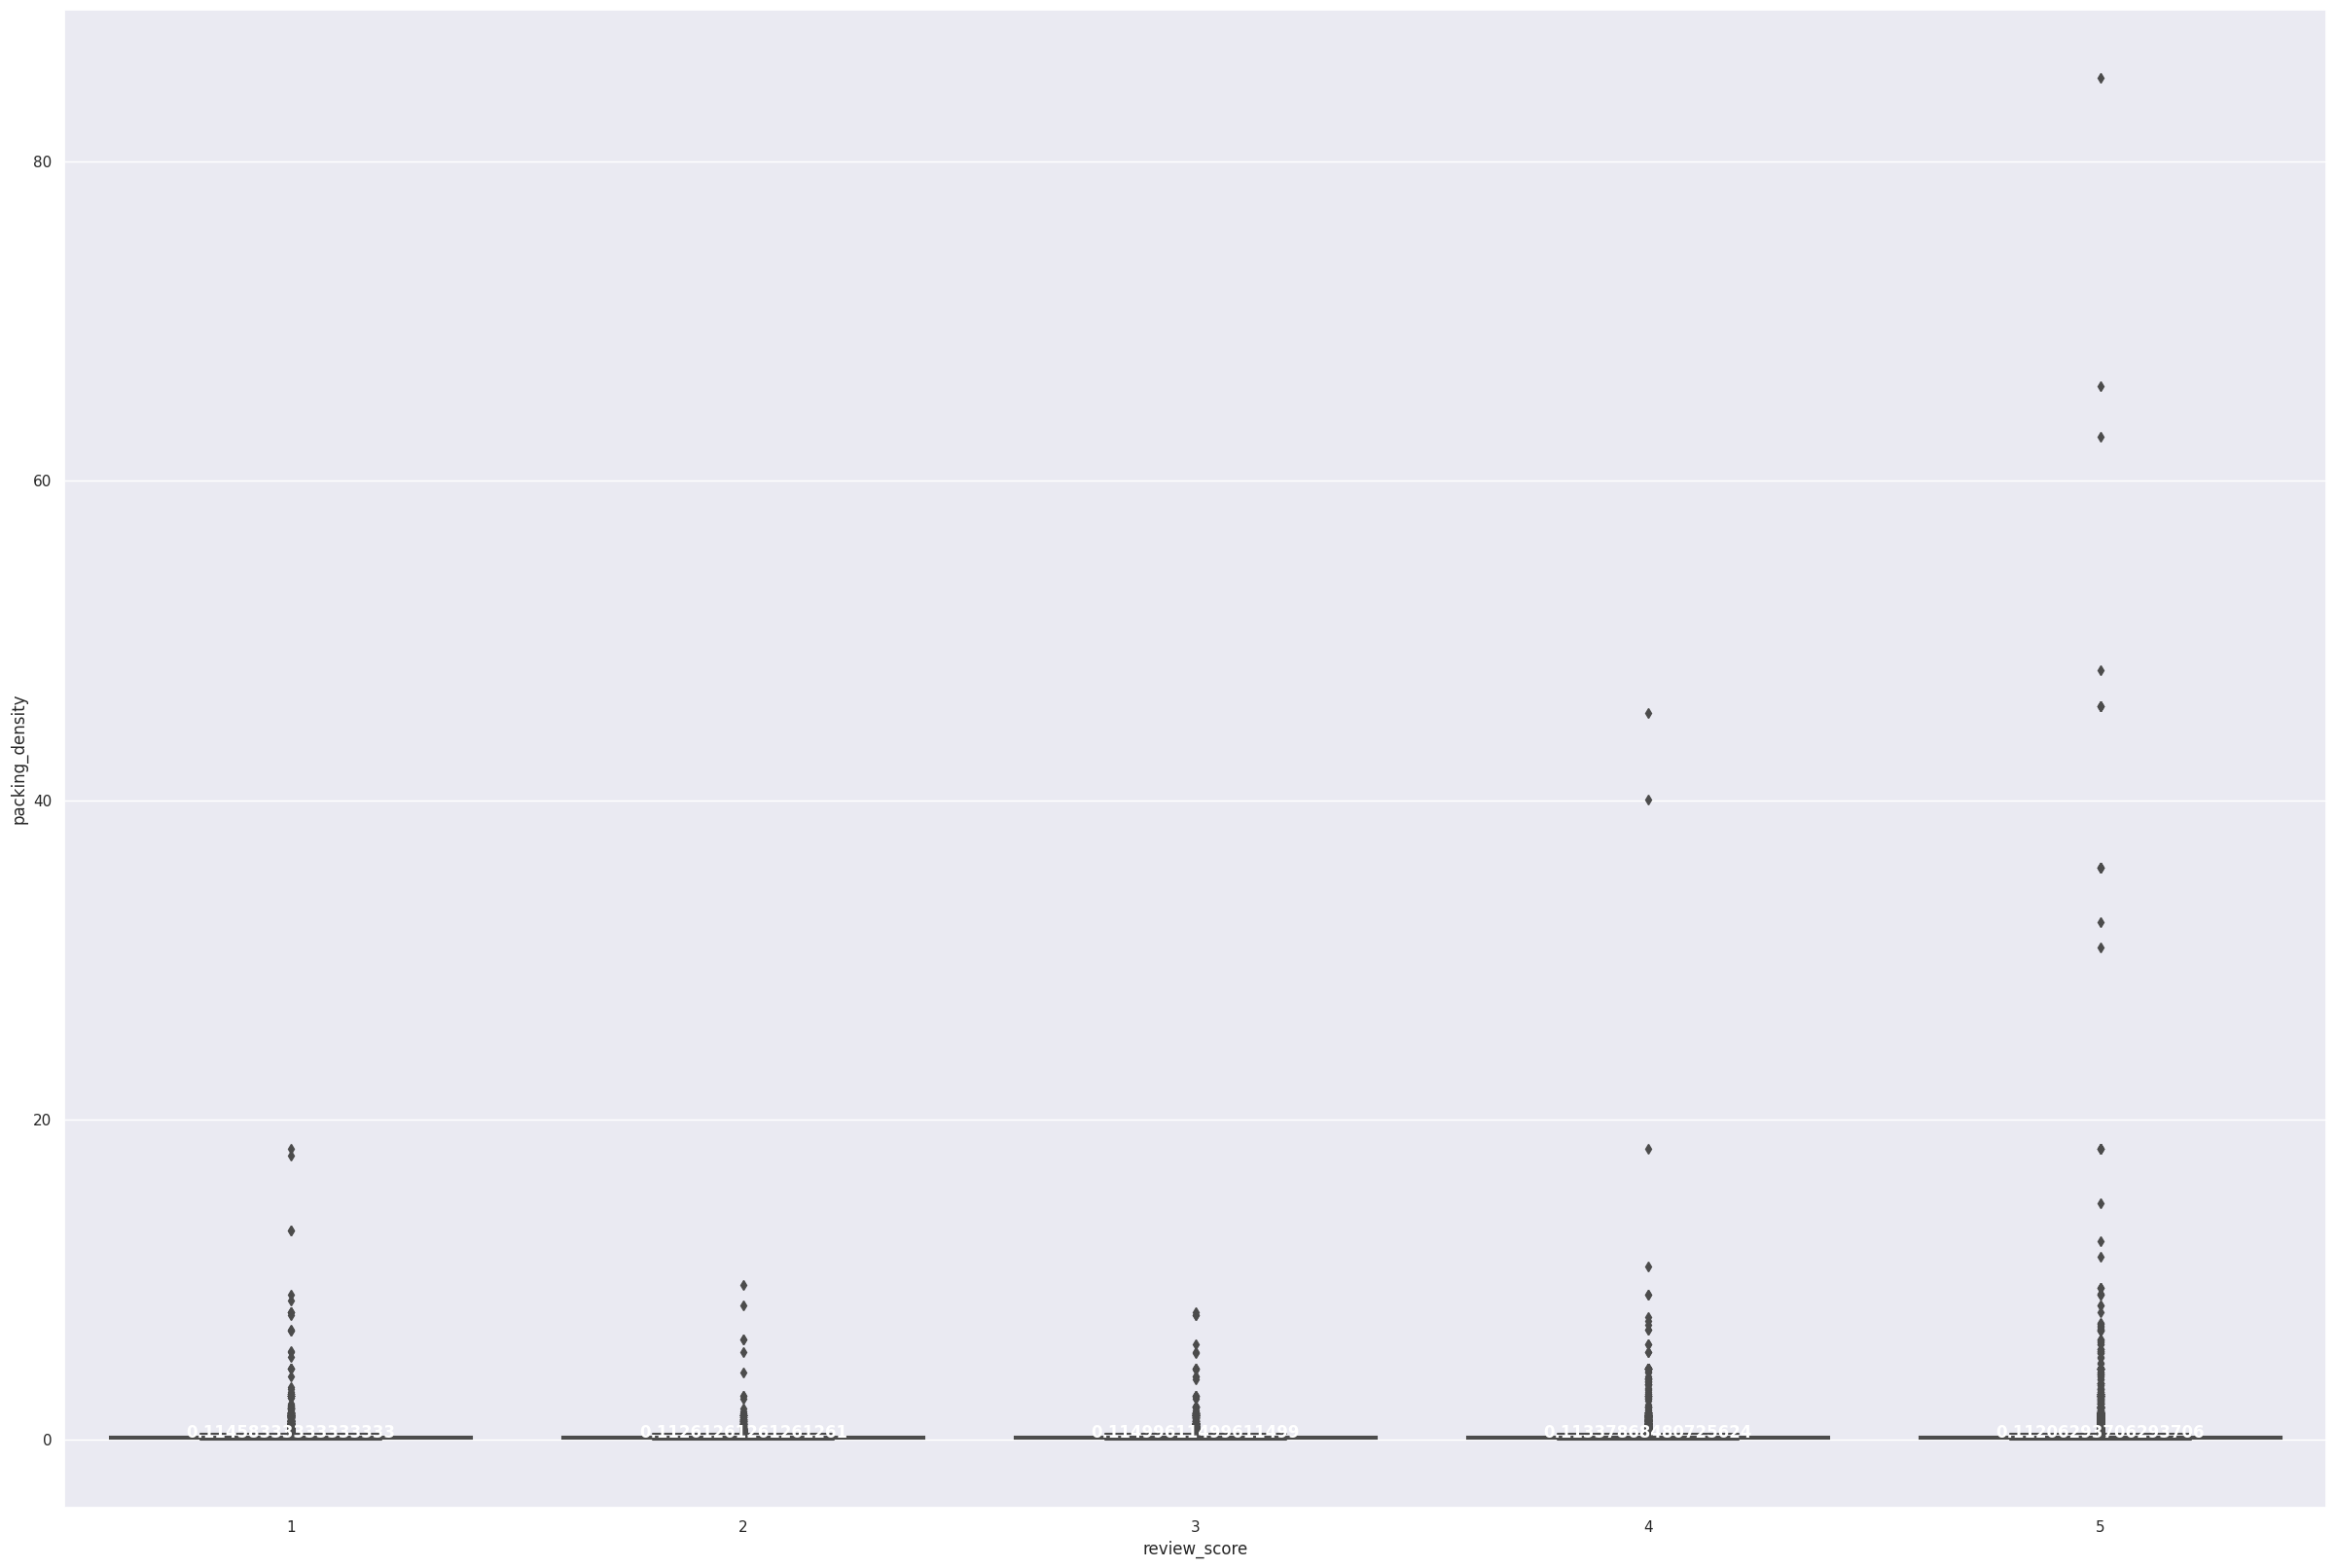

In [234]:
sns.set(rc={"figure.figsize":(30, 20)})
p1=sns.boxplot(x=df_final['review_score'], y=df_final['packing_density'], orient='v')
medians = df_final.groupby(['review_score'])['packing_density'].median()
vertical_offset = df_final['packing_density'].median() * 0.05 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick+1] + vertical_offset,medians[xtick+1],horizontalalignment='center',size='medium',color='w',weight='semibold')

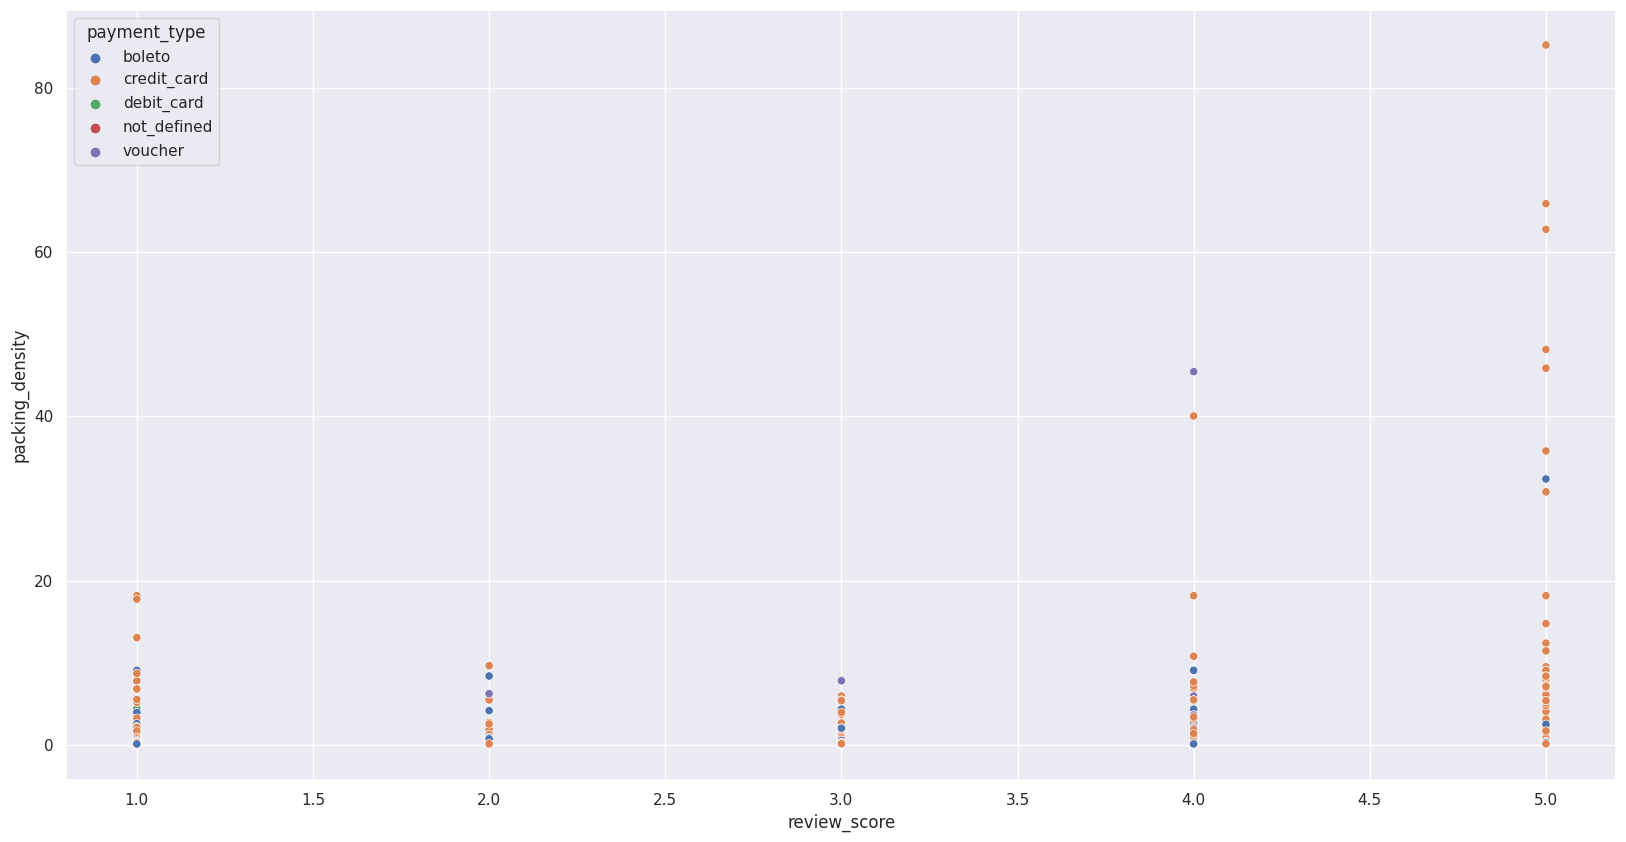

In [235]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_final, x="review_score", y="packing_density", hue="payment_type")
plt.show()

## Application

In [236]:
df_final.head()

order_id                         seller_id  \
0  00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1  130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2  532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3  6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4  7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   

                         product_id  order_item_id  price  freight_value  \
0  4244733e06e7ecb4970a6e2683c13e61              1   58.9          13.29   
1  4244733e06e7ecb4970a6e2683c13e61              1   55.9          17.96   
2  4244733e06e7ecb4970a6e2683c13e61              1   64.9          18.33   
3  4244733e06e7ecb4970a6e2683c13e61              1   58.9          16.17   
4  4244733e06e7ecb4970a6e2683c13e61              1   58.9          13.29   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 58.0                       598.0                 4.0   
1                 58.0                       598.0                 4.0   
2                 58.0                       598.0                 4.0   
3                 58.0                       598.0                 4.0   
4                 58.0                       598.0                 4.0   

   product_weight_g  ...  Seller_packing_performance  Approved_duration  \
0             650.0  ...                           0               2793   
1             650.0  ...                           0              53511   
2             650.0  ...                           0               7550   
3             650.0  ...                          -5                986   
4             650.0  ...                          -6                991   

   Delivery_performance Total_shipping_date Estimate_total_shipping_date  \
0                    -9                   1                            9   
1                   -13                   8                           20   
2                    -3                  12                           14   
3                   -16                   7                           22   
4                    -8                  13                           20   

  day_of_week freight_value_per_product Cost_per_delivery_size  \
0           2                  0.225637               0.003767   
1           2                  0.321288               0.005091   
2           4                  0.282435               0.005196   
3           1                  0.274533               0.004583   
4           3                  0.225637               0.003767   

    product_box_size  packing_density  
0  Box maybe too big          0.18424  
1  Box maybe too big          0.18424  
2  Box maybe too big          0.18424  
3  Box maybe too big          0.18424  
4  Box maybe too big          0.18424  

[5 rows x 35 columns]

In [237]:
df_final.describe()

order_item_id          price  freight_value  product_name_lenght  \
count  101071.000000  101071.000000  101071.000000        101071.000000   
mean        1.317480     131.662071      21.950260            48.892363   
std         1.999547     202.726450      20.303319             9.986395   
min         1.000000       0.850000       0.000000             5.000000   
25%         1.000000      44.900000      13.515000            43.000000   
50%         1.000000      79.990000      16.880000            52.000000   
75%         1.000000     145.990000      23.250000            57.000000   
max       210.000000   13440.000000    1794.960000            76.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count               101071.000000       101071.000000     101071.000000   
mean                   785.025932            2.233628       2085.453028   
std                    649.961937            1.736957       3725.833078   
min                      4.000000            1.000000          0.000000   
25%                    346.000000            1.000000        300.000000   
50%                    601.000000            2.000000        700.000000   
75%                    983.000000            3.000000       1800.000000   
max                   3992.000000           20.000000      40425.000000   

       product_length_cm  product_height_cm  product_width_cm  ...  \
count      101071.000000      101071.000000     101071.000000  ...   
mean           30.145986          16.402588         23.080884  ...   
std            16.093488          13.289114         11.719682  ...   
min             7.000000           2.000000          6.000000  ...   
25%            18.000000           8.000000         15.000000  ...   
50%            25.000000          13.000000         20.000000  ...   
75%            38.000000          20.000000         30.000000  ...   
max           105.000000         105.000000        118.000000  ...   

        review_score  Seller_packing_performance  Approved_duration  \
count  101071.000000               101071.000000      101071.000000   
mean        4.112574                   -3.852282       14076.141119   
std         1.320812                    4.967788       23610.193788   
min         1.000000                -1047.000000           0.000000   
25%         4.000000                   -6.000000         755.000000   
50%         5.000000                   -4.000000        1163.000000   
75%         5.000000                   -2.000000       16351.000000   
max         5.000000                   95.000000       86399.000000   

       Delivery_performance  Total_shipping_date  \
count         101071.000000        101071.000000   
mean             -12.014158             8.821957   
std               10.205052             8.717575   
min             -147.000000           -17.000000   
25%              -17.000000             4.000000   
50%              -13.000000             7.000000   
75%               -7.000000            11.000000   
max              188.000000           205.000000   

       Estimate_total_shipping_date    day_of_week  freight_value_per_product  \
count                 101071.000000  101071.000000              101071.000000   
mean                      20.241048       2.758111                   0.311103   
std                        8.779150       1.967124                   0.326390   
min                      -91.000000       0.000000                   0.000000   
25%                       15.000000       1.000000                   0.132064   
50%                       20.000000       3.000000                   0.225027   
75%                       25.000000       4.000000                   0.384324   
max                      192.000000       6.000000                  26.235294   

       Cost_per_delivery_size  packing_density  
count           101071.000000    101071.000000  
mean                 0.005371         0.191110  
std                  0.009525         

In [238]:
np.quantile(df_final['packing_density'], .75)

0.19333648989898988

In [239]:
df_final.loc[df_final['packing_density'] > np.quantile(df_final['packing_density'], .75)]

order_id                         seller_id  \
148     00018f77f2f0320c557190d7a144bdd3  dd7ddc04e1b6c2c614352b383efe2d36   
150     023669233121f0fb7899e5be2b22885f  070d165398b553f3b4b851c216b8a358   
151     023669233121f0fb7899e5be2b22885f  070d165398b553f3b4b851c216b8a358   
165     0ddd5a236d9e9023c6b2dc4e0ae35efe  dd7ddc04e1b6c2c614352b383efe2d36   
166     0ec20050bc3b82afe83aa803bff7ff04  dd7ddc04e1b6c2c614352b383efe2d36   
...                                  ...                               ...   
101058  f8d4190f8951914e3d79e7b6b7871470  497709c2976a8fa308730a2dec5b0726   
101059  f94765982f45d2bae74c9cbf55d37387  880ce4951cf857ab1d9e0b75c1d856f4   
101063  fbff77db5421bb7e1da292db45d07e75  2d8cfba3fcd3170555941605edaa196a   
101064  fbff77db5421bb7e1da292db45d07e75  2d8cfba3fcd3170555941605edaa196a   
101066  fd607d0a02cb276bc764a15f80f0423f  2a73cba571d90c694b7caca072ccf6ce   

                              product_id  order_item_id   price  \
148     e5f2d52b802189ee658865ca93d83a8f              1  239.90   
150     6b6b162b177d0f36987993aecbe1c65f              1  109.99   
151     784c94d1803e49492d2758907914b26c              3  109.90   
165     e1da6ab77f4859eb17950e5df1c0f815              3   99.80   
166     e1da6ab77f4859eb17950e5df1c0f815              1   49.90   
...                                  ...            ...     ...   
101058  d8fb151eb350f0956fbd847567d78954              3   76.00   
101059  94080f9219044d897195e2be145945dc              1  178.90   
101063  654ccc4e5459e7ba6b8d9fb04c45b9db              1   45.00   
101064  654ccc4e5459e7ba6b8d9fb04c45b9db              1   45.00   
101066  02ad78835ec3f72e750d1dfa6a7e11b3              3  342.78   

        freight_value  product_name_lenght  product_description_lenght  \
148             19.93                 56.0                       239.0   
150             23.25                 36.0                       876.0   
151             19.76                 55.0                       852.0   
165             34.52                 56.0                       724.0   
166             12.43                 56.0                       724.0   
...               ...                  ...                         ...   
101058          18.04                 43.0                       386.0   
101059          18.82                 60.0                      1543.0   
101063          10.96                 45.0                      1403.0   
101064          10.96                 45.0                      1403.0   
101066          38.70                 38.0                      1303.0   

        product_photos_qty  product_weight_g  ...  Seller_packing_performance  \
148                    2.0           30000.0  ...                           1   
150                    1.0           20450.0  ...                          -5   
151                    1.0           20800.0  ...                          -5   
165                    2.0            7050.0  ...                          -7   
166                    2.0            7050.0  ...                          -2   
...                    ...               ...  ...                         ...   
101058                 2.0             750.0  ...                          -3   
101059                 6.0             921.0  ...                          -3   
101063                 1.0             300.0  ...                          -6   
101064                 1.0             300.0  ...                          -6   
101066                 2.0            1250.0  ...                           5   

        Approved_duration  Delivery_performance Total_shipping_date  \
148                   727                    -3                   8   
150                 56418                   -13                   0   
151                 56418                   -13                   0   
165                 57437                   -12                   6   
166                   791                   -13                   0   
..

In [240]:
df_final.loc[df_final['packing_density'] > np.quantile(df_final['packing_density'], .75)]['product_category_name_english'].unique()

['pet_shop', 'furniture_decor', 'bed_bath_table', 'housewares', 'computers_accessories', ..., 'tablets_printing_image', 'flowers', 'la_cuisine', 'fashion_sport', 'diapers_and_hygiene']
Length: 68
Categories (71, object): ['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', ...,
                          'tablets_printing_image', 'telephony', 'toys', 'watches_gifts']

In [241]:
df_final.loc[df_final['packing_density'] <= np.quantile(df_final['packing_density'], .75)]

order_id                         seller_id  \
0       00010242fe8c5a6d1ba2dd792cb16214  48436dade18ac8b2bce089ec2a041202   
1       130898c0987d1801452a8ed92a670612  48436dade18ac8b2bce089ec2a041202   
2       532ed5e14e24ae1f0d735b91524b98b9  48436dade18ac8b2bce089ec2a041202   
3       6f8c31653edb8c83e1a739408b5ff750  48436dade18ac8b2bce089ec2a041202   
4       7d19f4ef4d04461989632411b7e588b9  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
101065  fd0342fda6ba083712b6ed0d4e6ac483  a1bea9970d8f65b240555f99c2214f7f   
101067  fdaf98feac227eb978d8f33f36e0231d  d1aa1ec0839dcab73a6161130eb1f94a   
101068  fe68b52db13993f58175fa589125d345  3fefda3299e6dfaea3466ef346a3571a   
101069  fefacc66af859508bf1a7934eab1e97f  80ceebb4ee9b31afb6c6a916a574a1e2   
101070  ff701a7c869ad21de22a6994237c8a00  3e35a8bb43569389d3cebef0ce820f69   

                              product_id  order_item_id   price  \
0       4244733e06e7ecb4970a6e2683c13e61              1    58.9   
1       4244733e06e7ecb4970a6e2683c13e61              1    55.9   
2       4244733e06e7ecb4970a6e2683c13e61              1    64.9   
3       4244733e06e7ecb4970a6e2683c13e61              1    58.9   
4       4244733e06e7ecb4970a6e2683c13e61              1    58.9   
...                                  ...            ...     ...   
101065  7683fe3e73bd7af6d0f6a6ed497cb04a              1    75.0   
101067  f739e9151702508b18f796c53005e5e9              1   119.9   
101068  f4135cbdece8245560f7be179533797a              1   209.0   
101069  69c590f7ffc7bf8db97190b6cb6ed62e              1  6729.0   
101070  5ff4076c0f01eeba4f728c9e3fa2653c              3    55.8   

        freight_value  product_name_lenght  product_description_lenght  \
0               13.29                 58.0                       598.0   
1               17.96                 58.0                       598.0   
2               18.33                 58.0                       598.0   
3               16.17                 58.0                       598.0   
4               13.29                 58.0                       598.0   
...               ...                  ...                         ...   
101065          27.48                 49.0                       527.0   
101067          16.14                 44.0                       533.0   
101068          16.21                 32.0                      1306.0   
101069         193.21                 50.0                      1935.0   
101070          28.88                 28.0                       242.0   

        product_photos_qty  product_weight_g  ...  Seller_packing_performance  \
0                      4.0             650.0  ...                           0   
1                      4.0             650.0  ...                           0   
2                      4.0             650.0  ...                           0   
3                      4.0             650.0  ...                          -5   
4                      4.0             650.0  ...                          -6   
...                    ...               ...  ...                         ...   
101065                 4.0            1450.0  ...                          -4   
101067                 2.0            1000.0  ...                           7   
101068                 3.0             500.0  ...                          -3   
101069                 4.0            5660.0  ...                           1   
101070                 1.0            2000.0  ...                          -1   

        Approved_duration  Delivery_performance Total_shipping_date  \
0                    2793                    -9                   1   
1                   53511                   -13                   8   
2                    7550                    -3                  12   
3                     986                   -16                   7   
4                     991                    -8                  13   
..

In [242]:
df_final.loc[df_final['packing_density'] <= np.quantile(df_final['packing_density'], .75)]['product_category_name_english'].unique()

['cool_stuff', 'toys', 'tablets_printing_image', 'pet_shop', 'furniture_decor', ..., 'furniture_mattress_and_upholstery', 'fashio_female_clothing', 'books_imported', 'arts_and_craftmanship', 'flowers']
Length: 71
Categories (71, object): ['agro_industry_and_commerce', 'air_conditioning', 'art', 'arts_and_craftmanship', ...,
                          'tablets_printing_image', 'telephony', 'toys', 'watches_gifts']

# Split data into label & Target

In [243]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [244]:
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Model Train & Test split data 

In [245]:
from sklearn.model_selection import train_test_split

df_model, df_test = train_test_split(df_final, test_size=0.25, random_state=4, stratify=y)

In [246]:
df_model.shape, df_test.shape

((75803, 35), (25268, 35))

## Create some new feature for finding average rating in Train model set

### Rating & Statistic

Seller rating, Product rating, Std 

In [247]:
df_model[df_model['seller_id'] == 'aac29b1b99776be73c3049939652091d'].describe()

order_item_id       price  freight_value  product_name_lenght  \
count      68.000000   68.000000      68.000000            68.000000   
mean        2.264706   69.225294      26.773235            39.102941   
std         4.009755   52.240676      19.476950             5.907596   
min         1.000000   12.490000       1.160000            25.000000   
25%         1.000000   27.900000      16.697500            38.000000   
50%         1.000000   64.900000      19.400000            40.000000   
75%         1.000000   70.900000      27.185000            44.000000   
max        21.000000  239.000000     110.300000            56.000000   

       product_description_lenght  product_photos_qty  product_weight_g  \
count                   68.000000           68.000000         68.000000   
mean                   548.647059            2.867647       2942.647059   
std                    238.282271            1.413204       2033.098597   
min                    207.000000            1.000000        150.000000   
25%                    461.250000            1.000000        525.000000   
50%                    500.000000            4.000000       4100.000000   
75%                    598.000000            4.000000       4100.000000   
max                   1104.000000            6.000000       5150.000000   

       product_length_cm  product_height_cm  product_width_cm  ...  \
count          68.000000          68.000000         68.000000  ...   
mean           59.132353           5.794118         30.441176  ...   
std            34.166364           5.744715         13.718255  ...   
min            16.000000           2.000000         11.000000  ...   
25%            17.750000           4.000000         16.000000  ...   
50%            89.000000           4.000000         42.000000  ...   
75%            89.000000           7.000000         42.000000  ...   
max            90.000000          35.000000         42.000000  ...   

       review_score  Seller_packing_performance  Approved_duration  \
count     68.000000                   68.000000          68.000000   
mean       4.308824                   -3.441176       11335.426471   
std        1.123127                    5.880355       23741.249788   
min        1.000000                   -8.000000           0.000000   
25%        4.000000                   -6.000000         675.000000   
50%        5.000000                   -4.000000         855.500000   
75%        5.000000                   -3.000000        2350.500000   
max        5.000000                   39.000000       86008.000000   

       Delivery_performance  Total_shipping_date  \
count             68.000000            68.000000   
mean             -10.632353            12.014706   
std               21.270051            20.817969   
min              -39.000000             0.000000   
25%              -18.000000             5.000000   
50%              -14.000000             8.000000   
75%              -10.000000            12.250000   
max              138.000000           166.000000   

       Estimate_total_shipping_date  day_of_week  freight_value_per_product  \
count                     68.000000    68.000000                  68.000000   
mean                      22.132353     2.911765                   0.514288   
std                        8.458687     1.975486                   0.365456   
min                      -19.000000     0.000000                   0.046437   
25%                       19.000000     1.000000                   0.273061   
50%                       21.000000     3.000000                   0.383978   
75%                       25.000000     4.000000                   0.649548   
max                       49.000000     6.000000                   1.766213   

       Cost_per_delivery_size  packing_density  
count               68.000000        68.000000  
mean                 0.020606         0.314275  
std                  0.055070         0.114687  
min                  0.000668         0.064

In [248]:
df_model[df_model['seller_id'] == 'aac29b1b99776be73c3049939652091d'].describe().iloc[2][11]

1.1231266716769457

In [249]:
seller_ratingx = {}
seller_rating_sdx = {}
product_ratingx = {}
product_rating_sdx = {}

for item in df_model['seller_id'].unique():
  seller_ratingx[item] = round(df_model[df_model['seller_id'] == item].describe().iloc[1][11],2)
  seller_rating_sdx[item] = round(df_model[df_model['seller_id'] == item].describe().iloc[2][11],2)

for item in df_model['product_id'].unique():
  product_ratingx[item] = round(df_model[df_model['product_id'] == item].describe().iloc[1][11],2)
  product_rating_sdx[item] = round(df_model[df_model['product_id'] == item].describe().iloc[2][11],2)

seller_rating = []

for item in df_model['seller_id']:
  seller_rating.append(seller_ratingx[item])

seller_rating_sd = []

for item in df_model['seller_id']:
  seller_rating_sd.append(seller_rating_sdx[item])

product_rating = []
for item in df_model['product_id']:
  product_rating.append(product_ratingx[item])

product_rating_sd = []

for item in df_model['product_id']:
  product_rating_sd.append(product_rating_sdx[item])

df_model['seller_rating'] = seller_rating
df_model['seller_rating_sd'] = seller_rating_sd
df_model['product_rating'] = product_rating
df_model['product_rating_sd'] = product_rating_sd

In [250]:
df_model.head()

order_id                         seller_id  \
80391  aaebd610c2ce12f554c4614fd969f798  a938325a4b357fd23a6a4d5bb126408e   
53654  ed35e61f1ad9eb350bf81839d6bbda23  aac29b1b99776be73c3049939652091d   
65635  5985f136ead106b6ca5c2bf3f76b5874  8160255418d5aaa7dbdc9f4c64ebda44   
11480  591ab3b2136169cbcc8f86900519151c  6560211a19b47992c3666cc44a7e94c0   
6385   ba5c52c56c0bc95c960451d9ce7205fe  fe2032dab1a61af8794248c8196565c9   

                             product_id  order_item_id  price  freight_value  \
80391  fbc27ebd87bc38f09e41f1d062d116a7              1  159.0          17.36   
53654  31639956e7fac87ecfd9d608040638bd              1   64.9          16.21   
65635  a94036c0bb4dfce8d5762777c07b7be2              1  124.9          18.12   
11480  5be202203d884803b74c45c7ff991706              1  149.0           8.30   
6385   dd1759836cc99a88be1a42bf6673abe0              1  169.0          16.36   

       product_name_lenght  product_description_lenght  product_photos_qty  \
80391                 54.0                       825.0                 6.0   
53654                 38.0                       500.0                 1.0   
65635                 57.0                      2473.0                 2.0   
11480                 59.0                       530.0                 4.0   
6385                  38.0                       419.0                 1.0   

       product_weight_g  ...  Estimate_total_shipping_date  day_of_week  \
80391            2000.0  ...                            20            2   
53654            5150.0  ...                            19            1   
65635            2500.0  ...                            23            0   
11480             300.0  ...                             2            4   
6385              415.0  ...                            23            3   

       freight_value_per_product Cost_per_delivery_size   product_box_size  \
80391                   0.109182               0.000772  Box maybe too big   
53654                   0.249769               0.001072           Very fit   
65635                   0.145076               0.001596           Very fit   
11480                   0.055705               0.023580           Very fit   
6385                    0.096805               0.002913  Box maybe too big   

      packing_density seller_rating seller_rating_sd product_rating  \
80391        0.088889          3.53             1.62           4.00   
53654        0.340608          4.31             1.12           4.50   
65635        0.220226          3.82             1.47           4.43   
11480        0.852273          3.94             1.39           2.50   
6385         0.073896          4.29             1.21           4.88   

       product_rating_sd  
80391                NaN  
53654               0.63  
65635               0.53  
11480               2.12  
6385                0.35  

[5 rows x 39 columns]

In [251]:
df_model.isnull().sum()

order_id                             0
seller_id                            0
product_id                           0
order_item_id                        0
price                                0
freight_value                        0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty                   0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
product_category_name_english        0
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
customer_id                          0
payment_type                         0
payment_value                        0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
Seller_packing_performanc

In [252]:
#Fill null values with 0 for every sd in seller_id and product_id
df_model['seller_rating_sd'].fillna(0, inplace=True)
df_model['product_rating_sd'].fillna(0, inplace=True)

In [253]:
df_model.isnull().sum()

order_id                         0
seller_id                        0
product_id                       0
order_item_id                    0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
payment_type                     0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
Seller_packing_performance       0
Approved_duration                0
Delivery_performance             0
Total_shipping_date 

## Insert rating into test set

In [254]:
df_test.head()

order_id                         seller_id  \
46932  27ccb6f42b7ff7e079004d6192ab12bb  fa1c13f2614d7b5c4749cbc52fecda94   
2690   4242575865a8c4d5919561538ad8c6a7  4a3ca9315b744ce9f8e9374361493884   
38538  d4d8638eaddca23adbfdd1b383a5f15b  d2374cbcbb3ca4ab1086534108cc3ab7   
96462  21fb27ca0d5674a275138792e721612a  d2e753bb80b7d4faa77483ed00edc8ca   
42163  f98a06b99cbcc7caef174bc5efa78a31  17e34d8224d27a541263c4c64b11a56b   

                             product_id  order_item_id   price  freight_value  \
46932  679c97b6819e657c506237438cacf60f              1  224.80           8.83   
2690   99a4788cb24856965c36a24e339b6058              1   89.90          12.13   
38538  1bef08f119466a85a83919d5b80facd3              2   15.90           6.58   
96462  6760d30ebea15ef6773a57346f9990ca              2   89.00          25.90   
42163  5cde85235c4ae7747e9b48de95178a14              1  218.36          16.28   

       product_name_lenght  product_description_lenght  product_photos_qty  \
46932                 53.0                       566.0                 2.0   
2690                  54.0                       245.0                 1.0   
38538                 39.0                       114.0                 1.0   
96462                 59.0                      1718.0                 5.0   
42163                 35.0                       905.0                 2.0   

       product_weight_g  ...  Seller_packing_performance  Approved_duration  \
46932             250.0  ...                          -5               8772   
2690             1383.0  ...                          -6              35732   
38538             250.0  ...                          -7                688   
96462             100.0  ...                          -4               5063   
42163             383.0  ...                          -2                723   

       Delivery_performance Total_shipping_date Estimate_total_shipping_date  \
46932                    -9                   4                           13   
2690                     -5                   9                           14   
38538                   -20                   4                           23   
96462                   -17                   8                           24   
42163                    -8                  14                           22   

      day_of_week freight_value_per_product Cost_per_delivery_size  \
46932           2                  0.039279               0.004561   
2690            1                  0.134928               0.000607   
38538           2                  0.413836               0.001371   
96462           6                  0.291011               0.016037   
42163           6                  0.074556               0.002520   

        product_box_size  packing_density  
46932  Box maybe too big         0.129132  
2690   Box maybe too big         0.069150  
38538  Box maybe too big         0.052083  
96462  Box maybe too big         0.061920  
42163  Box maybe too big         0.059288  

[5 rows x 35 columns]

In [255]:
df_model[df_model['product_id']=='98f991fd34b7080dfef4fb7e7aabfd5a']

order_id                         seller_id  \
91491  58fb05058cf15a3f9eaeb29497841a33  6bb0724edf0b62fb91ac404873a97241   

                             product_id  order_item_id  price  freight_value  \
91491  98f991fd34b7080dfef4fb7e7aabfd5a              1  117.0          29.01   

       product_name_lenght  product_description_lenght  product_photos_qty  \
91491                 28.0                       383.0                 3.0   

       product_weight_g  ...  Estimate_total_shipping_date  day_of_week  \
91491            5950.0  ...                            27            0   

       freight_value_per_product Cost_per_delivery_size product_box_size  \
91491                   0.247949               0.003017         Very fit   

      packing_density seller_rating seller_rating_sd product_rating  \
91491        0.618889          4.36             1.28            5.0   

       product_rating_sd  
91491                0.0  

[1 rows x 39 columns]

In [256]:
df_test[df_test['seller_id'] == '17e34d8224d27a541263c4c64b11a56b']

order_id                         seller_id  \
42163  f98a06b99cbcc7caef174bc5efa78a31  17e34d8224d27a541263c4c64b11a56b   
42205  08f982d8b8d8de12b00d35edefe5d26a  17e34d8224d27a541263c4c64b11a56b   
42224  822a35d3573cb3c90167aa647a7a6e63  17e34d8224d27a541263c4c64b11a56b   
42229  90de07e389ed6cd973ae93d5b36f159c  17e34d8224d27a541263c4c64b11a56b   
42171  940d6ffb9723c1e13bd69d602c34dce3  17e34d8224d27a541263c4c64b11a56b   
...                                 ...                               ...   
42290  d2857f1d626d6c49882e77dea44a3e80  17e34d8224d27a541263c4c64b11a56b   
42181  94d319613cd8c3813cf10449f6049e18  17e34d8224d27a541263c4c64b11a56b   
42251  3160f9fa13bf36dda5ba225649526968  17e34d8224d27a541263c4c64b11a56b   
42278  25e2eb92a4861f100d82edfb2cbbb47f  17e34d8224d27a541263c4c64b11a56b   
42391  da36f0ed6b7669628846afd6d75a9a7c  17e34d8224d27a541263c4c64b11a56b   

                             product_id  order_item_id    price  \
42163  5cde85235c4ae7747e9b48de95178a14              1   218.36   
42205  72031b4bf33aa4f09c67e884dea3873c              1   180.30   
42224  6642e66f26b6e23817ada36eeae229bc              1   155.40   
42229  84003eefe52bb4112252409a24ae3a73              1   145.30   
42171  ecaaaccb5eb3102553f001d62db6389e              1   288.92   
...                                 ...            ...      ...   
42290  2a788bf848c3357ea72c31e344822aa9              1    87.67   
42181  20f160a9cf2e856ee5eba259e9ae33f9              3   335.84   
42251  1fce7b244f4a45431713165a869f5f32              1   148.22   
42278  924526b79ddb063f802d7a11720d7b5e              1    89.66   
42391  9f82fdef2a36bb15d22d70af1aedb3ce              1  1099.00   

       freight_value  product_name_lenght  product_description_lenght  \
42163          16.28                 35.0                       905.0   
42205          27.80                 43.0                       620.0   
42224          12.59                 42.0                       419.0   
42229          21.51                 48.0                       450.0   
42171          16.77                 54.0                       144.0   
...              ...                  ...                         ...   
42290          10.03                 46.0                       183.0   
42181          25.36                 56.0                      1224.0   
42251          23.97                 56.0                      1420.0   
42278          19.60                 55.0                       838.0   
42391          74.56                 57.0                       906.0   

       product_photos_qty  product_weight_g  ...  Seller_packing_performance  \
42163                 2.0             383.0  ...                          -2   
42205                 3.0             800.0  ...                          -5   
42224                 1.0             160.0  ...                          -2   
42229                 1.0             400.0  ...                          -3   
42171                 2.0             125.0  ...                          -5   
...                   ...               ...  ...                         ...   
42290                 1.0             597.0  ...                          -3   
42181                 3.0             556.0  ...                          -3   
42251                 2.0             575.0  ...                          -1   
42278                 1.0             200.0  ...                          -4   
42391                 2.0           30000.0  ...                          -2   

       Approved_duration  Delivery_performance Total_shipping_date  \
42163                723                    -8                  14   
42205              70475                   -17                   8   
42224              11531                    -5                  10   
42229                728                    -9                   7   
42171                452                   -11                  12   
...                  ...                   

In [257]:
#Find the list of seller need to remove due to not find in train set
seller_need_remove = []
for item in df_test['seller_id'].unique():
  if df_model[df_model['seller_id'] == item]['seller_id'].count() == 0:
    seller_need_remove.append(item)
    pass
print(seller_need_remove)

['22c32ec35d0116ef02c281798a25bf8b', 'd598f929fc44e1e38678e7f47250ec04', '7c4402417d51474d4d0cda9557340e40', '788f22bafdd7ab0e1e79f19db72f16a4', 'b2f4d63c7203f539a78252565ca32257', 'aa8af66c623d7d544dfe4bb85b5ebe3b', 'ae45ad30c2d2e5913094769690a239d2', 'ae9690c6e8fee182c28c9ff8e11ca52c', '80cfd480be3eb6d6267139f5cb793555', 'd9cb0052a666de5308b32f32ad5f1b1c', 'e72b4feb7abe210c52aa667abc25a3a2', '8fb67a334bacec338885b4e9e1708073', '8fd3b4468f6425810648177996c14cbd', '0b09101900100c0e9d312861fad5a1b9', '1fa2d3def6adfa70e58c276bb64fe5bb', '4e8dacf3d38f281ae26c3e0321d92d88', '1e26c56af8d48424e1df0140a2401f83', 'c161d1327ebc3a156c09582ab2f59f6c', '6dd7dce75cd55c1ce255dc38d9f0cd46', '5ca5d579b5857ee8709479b1047cecc3', '5e25c632f9db6cfb8bc100421c2737b6', '0f94588695d71662beec8d883ffacf09', '8cf21434553b02cbd37c0bbd07e041b0', '528ce32f560edd11add4169f6a5b65be', 'e76ecc7e9a1a1e3c6df9d2a8261c423d', 'e1c76f339ebd5460999f25a2aa8c92c5', '376d67b61dce0c990155286e7ae486a4', '377bc18334c78dd2f1535ef22a

In [258]:
for i in seller_need_remove:
  df_test.drop(df_test.index[(df_test["seller_id"] == i)],axis=0,inplace=True)

In [259]:
df_test.shape

(25079, 35)

In [260]:
seller_ratingx = {}
seller_rating_sdx = {}
product_ratingx = {}
product_rating_sdx = {}

# in case of seller id not find in test set, we use average overall rating instead.
average_ratingx = round(df_model.describe().iloc[1][11],2)
average_rating_sdx = round(df_model.describe().iloc[2][11],2)

# in case of product_id not find in test set, we use average product cat rating instead.
product_cat_ratingx = {}
product_cat_rating_sdx = {}
for item in df_model['product_category_name_english'].unique():
  product_cat_ratingx[item] = round(df_model[df_model['product_category_name_english'] == item].describe().iloc[1][11],2)
  product_cat_rating_sdx[item]= round(df_model[df_model['product_category_name_english'] == item].describe().iloc[2][11],2)

product_cat_rating = []
for item in df_model['product_category_name_english']:
  product_cat_rating.append(product_cat_ratingx[item])

# input all feature in test set
for item in df_test['seller_id'].unique():
  if df_model[df_model['seller_id'] == item]['seller_id'].count() == 0:
    seller_ratingx[item] = average_ratingx
    seller_rating_sdx[item] = average_rating_sdx
  else:
    seller_ratingx[item] = df_model[df_model['seller_id']==item]['seller_rating'].unique()[0]
    seller_rating_sdx[item] = df_model[df_model['seller_id']==item]['seller_rating_sd'].unique()[0]


for item in df_test['product_id'].unique():
  if df_model[df_model['product_id'] == item]['product_id'].count() == 0:
    product_ratingx[item] = product_cat_ratingx.get(df_test[df_test['product_id'] == item]['product_category_name_english'].unique()[0])
    product_rating_sdx[item] = product_cat_rating_sdx.get(df_test[df_test['product_id'] == item]['product_category_name_english'].unique()[0])
  else:
    product_ratingx[item] = df_model[df_model['product_id']==item]['product_rating'].unique()[0]
    product_rating_sdx[item] = df_model[df_model['product_id']==item]['product_rating_sd'].unique()[0]
 
seller_rating = []

for item in df_test['seller_id']:
  seller_rating.append(seller_ratingx[item])

seller_rating_sd = []

for item in df_test['seller_id']:
  seller_rating_sd.append(seller_rating_sdx[item])

product_rating = []

for item in df_test['product_id']:
  product_rating.append(product_ratingx[item])

product_rating_sd = []

for item in df_test['product_id']:
  product_rating_sd.append(product_rating_sdx[item])

df_test['seller_rating'] = seller_rating
df_test['seller_rating_sd'] = seller_rating_sd
df_test['product_rating'] = product_rating
df_test['product_rating_sd'] = product_rating_sd

In [261]:
df_test.head()

order_id                         seller_id  \
46932  27ccb6f42b7ff7e079004d6192ab12bb  fa1c13f2614d7b5c4749cbc52fecda94   
2690   4242575865a8c4d5919561538ad8c6a7  4a3ca9315b744ce9f8e9374361493884   
38538  d4d8638eaddca23adbfdd1b383a5f15b  d2374cbcbb3ca4ab1086534108cc3ab7   
96462  21fb27ca0d5674a275138792e721612a  d2e753bb80b7d4faa77483ed00edc8ca   
42163  f98a06b99cbcc7caef174bc5efa78a31  17e34d8224d27a541263c4c64b11a56b   

                             product_id  order_item_id   price  freight_value  \
46932  679c97b6819e657c506237438cacf60f              1  224.80           8.83   
2690   99a4788cb24856965c36a24e339b6058              1   89.90          12.13   
38538  1bef08f119466a85a83919d5b80facd3              2   15.90           6.58   
96462  6760d30ebea15ef6773a57346f9990ca              2   89.00          25.90   
42163  5cde85235c4ae7747e9b48de95178a14              1  218.36          16.28   

       product_name_lenght  product_description_lenght  product_photos_qty  \
46932                 53.0                       566.0                 2.0   
2690                  54.0                       245.0                 1.0   
38538                 39.0                       114.0                 1.0   
96462                 59.0                      1718.0                 5.0   
42163                 35.0                       905.0                 2.0   

       product_weight_g  ...  Estimate_total_shipping_date  day_of_week  \
46932             250.0  ...                            13            2   
2690             1383.0  ...                            14            1   
38538             250.0  ...                            23            2   
96462             100.0  ...                            24            6   
42163             383.0  ...                            22            6   

       freight_value_per_product Cost_per_delivery_size   product_box_size  \
46932                   0.039279               0.004561  Box maybe too big   
2690                    0.134928               0.000607  Box maybe too big   
38538                   0.413836               0.001371  Box maybe too big   
96462                   0.291011               0.016037  Box maybe too big   
42163                   0.074556               0.002520  Box maybe too big   

      packing_density seller_rating seller_rating_sd product_rating  \
46932        0.129132          4.33             1.23           5.00   
2690         0.069150          3.81             1.43           3.90   
38538        0.052083          3.67             1.52           3.20   
96462        0.061920          3.69             1.11           4.19   
42163        0.059288          4.24             1.23           3.50   

       product_rating_sd  
46932               0.00  
2690                1.37  
38538               1.30  
96462               1.23  
42163               1.29  

[5 rows x 39 columns]

In [262]:
df_test.isnull().sum()

order_id                         0
seller_id                        0
product_id                       0
order_item_id                    0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
payment_type                     0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
Seller_packing_performance       0
Approved_duration                0
Delivery_performance             0
Total_shipping_date 

# Data sampling

target to find the effected feature by using only 50% of the data set (For reason: Reducing operation time)

## Sampling data for finding a right feature

In [263]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int((n * multiplier) / multiplier)

In [264]:
# We sampling 50% of data set for testing in a feature selection
df_samp=df_model.sample(truncate(len(df_model)*0.5,0), replace=False,random_state=42)

In [265]:
# เตรียมข้อมูลก่อนทำการ Training โดยการแยก Training Data ออกจาก Target Data

X_samp = df_samp[df_samp.columns.difference(['review_score'])]
y_samp = df_samp['review_score']

In [266]:
y_samp=pd.cut(y_samp, bins=[1, 2, 4, 5, np.inf],
        labels=['1','2.5','4','5'],right=False)

In [267]:
#Summarizing a total amount of category type columns
X_samp.select_dtypes(include=['category']).columns

Index(['customer_city', 'customer_id', 'customer_state',
       'customer_zip_code_prefix', 'payment_type',
       'product_category_name_english', 'seller_city', 'seller_id',
       'seller_state', 'seller_zip_code_prefix'],
      dtype='object')

In [268]:
#Convert some product type
X_samp['product_box_size'] = X_samp['product_box_size'].astype('category')

<ipython-input-268-1745bce58371>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_samp['product_box_size'] = X_samp['product_box_size'].astype('category')


In [269]:
lec= preprocessing.OrdinalEncoder(dtype=np.int64)
X_samp[X_samp.select_dtypes(include=['category']).columns] = lec.fit_transform(X_samp[X_samp.select_dtypes(include=['category']).columns])

<ipython-input-269-d0ddc0ca07dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_samp[X_samp.select_dtypes(include=['category']).columns] = lec.fit_transform(X_samp[X_samp.select_dtypes(include=['category']).columns])


In [270]:
#drop unnecessary features
X_samp.drop(columns=X_samp.select_dtypes(include=['object']),inplace=True)
X_samp.drop(columns=['order_item_id','seller_id'],inplace=True)

<ipython-input-270-ea8699a053a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_samp.drop(columns=X_samp.select_dtypes(include=['object']),inplace=True)
<ipython-input-270-ea8699a053a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_samp.drop(columns=['order_item_id','seller_id'],inplace=True)


In [271]:
X_samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37901 entries, 99494 to 28537
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Approved_duration              37901 non-null  int64  
 1   Cost_per_delivery_size         37901 non-null  float64
 2   Delivery_performance           37901 non-null  int64  
 3   Estimate_total_shipping_date   37901 non-null  int64  
 4   Seller_packing_performance     37901 non-null  int64  
 5   Total_shipping_date            37901 non-null  int64  
 6   customer_city                  37901 non-null  int64  
 7   customer_id                    37901 non-null  int64  
 8   customer_state                 37901 non-null  int64  
 9   customer_zip_code_prefix       37901 non-null  int64  
 10  day_of_week                    37901 non-null  int64  
 11  freight_value                  37901 non-null  float64
 12  freight_value_per_product      37901 non-n

### Supervised feature selection

## Feature selection

#### Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

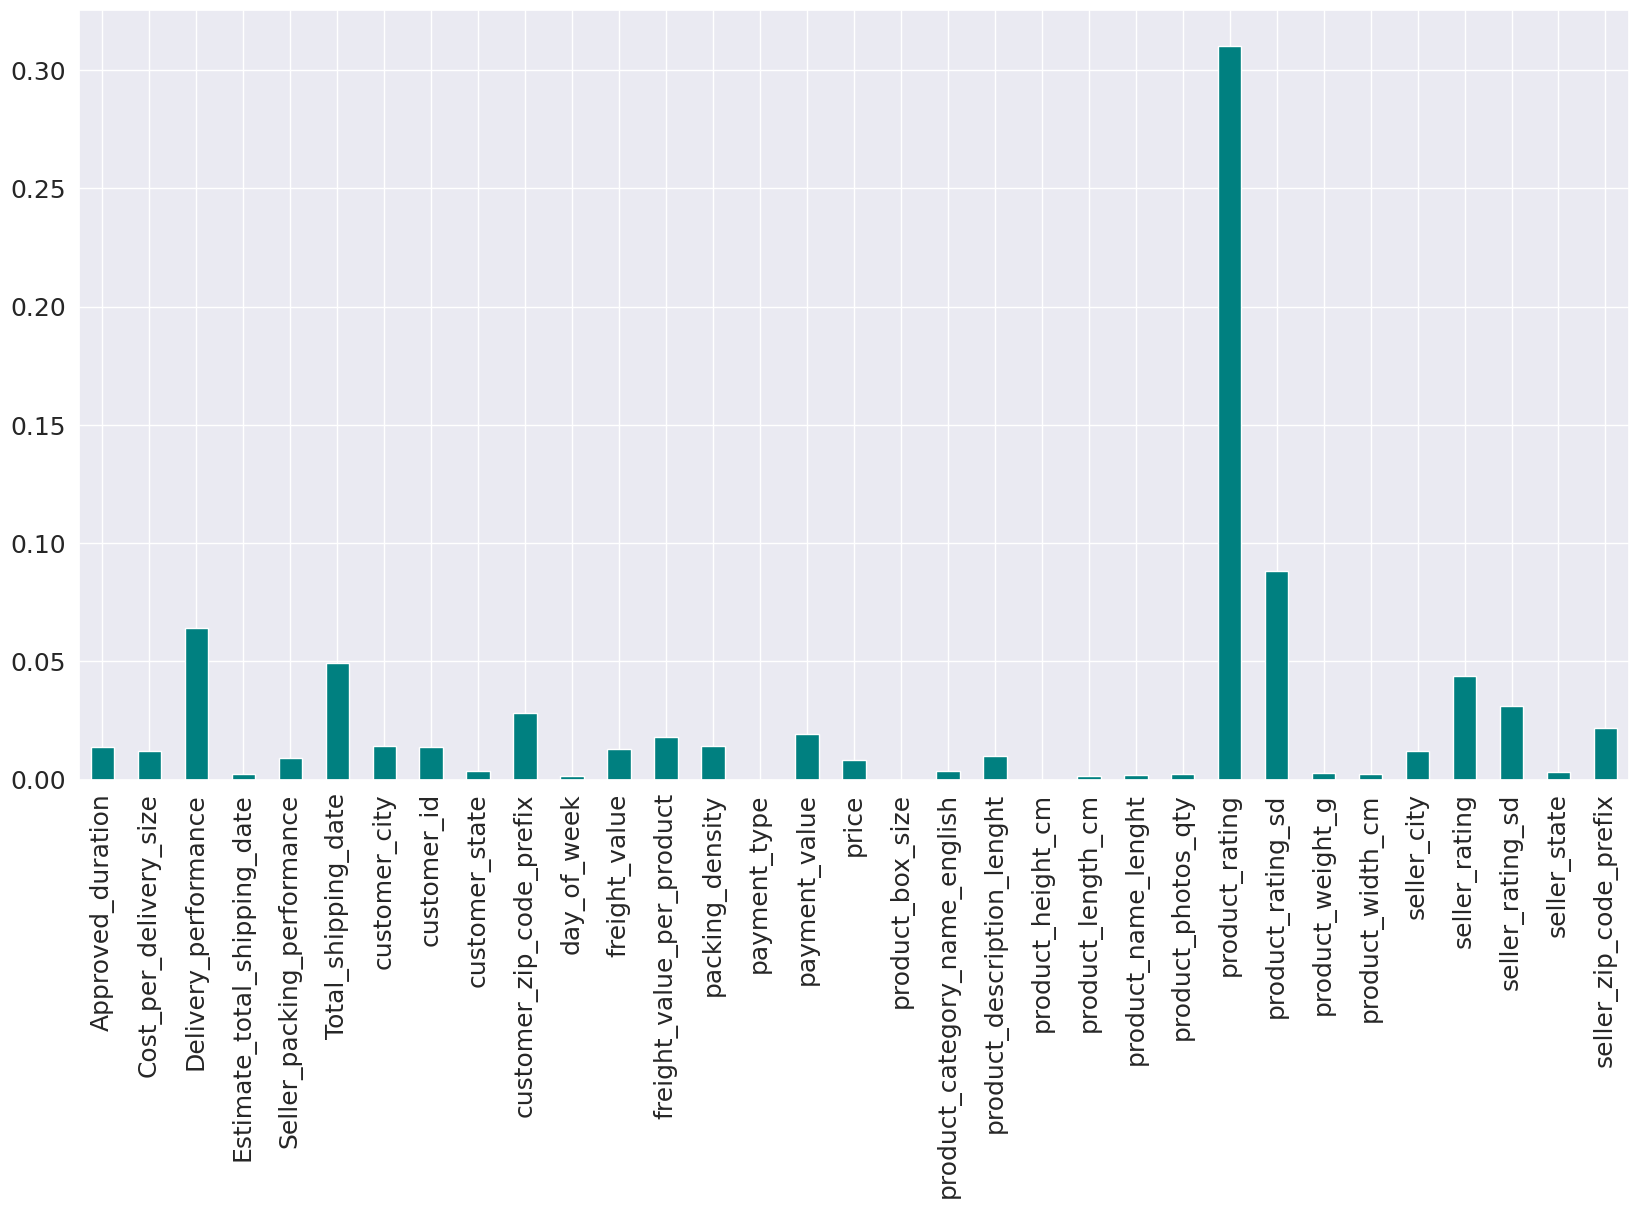

In [272]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(X_samp,y_samp)
feat_importances = pd.Series(importances, X_samp.columns[0:len(X_samp.columns)])
feat_importances.plot(kind="bar",color='teal',figsize=(20, 10),fontsize=18)
plt.show()

In [273]:
feat_importances

Approved_duration                0.013704
Cost_per_delivery_size           0.012313
Delivery_performance             0.063971
Estimate_total_shipping_date     0.002208
Seller_packing_performance       0.009315
Total_shipping_date              0.049538
customer_city                    0.014427
customer_id                      0.013931
customer_state                   0.003673
customer_zip_code_prefix         0.028234
day_of_week                      0.001392
freight_value                    0.013119
freight_value_per_product        0.018212
packing_density                  0.014050
payment_type                     0.000000
payment_value                    0.019395
price                            0.008380
product_box_size                 0.000000
product_category_name_english    0.003598
product_description_lenght       0.009913
product_height_cm                0.000000
product_length_cm                0.001488
product_name_lenght              0.001961
product_photos_qty               0

### Feature selection with RF

Randomforest based feature importance

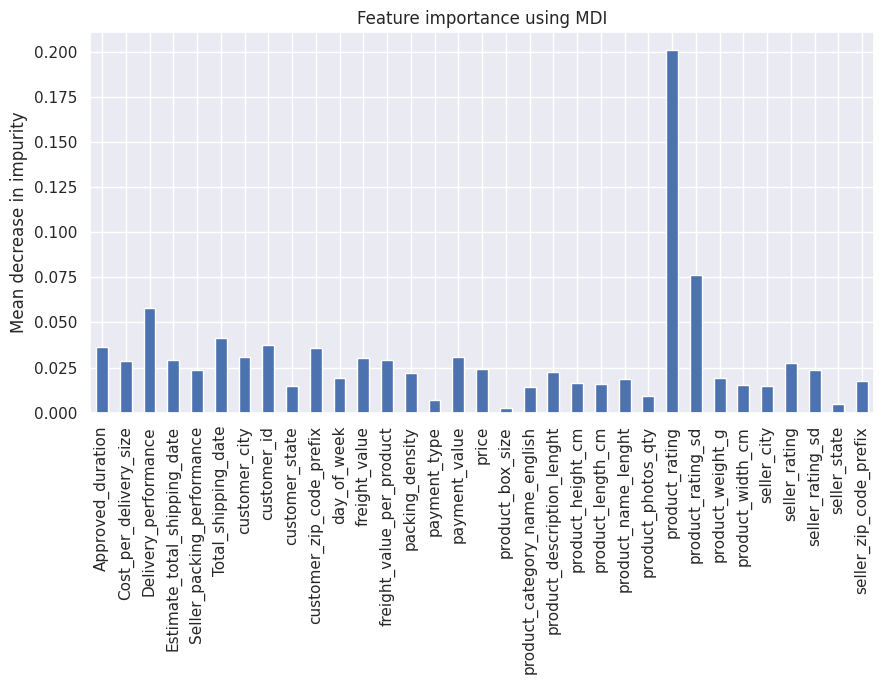

In [274]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_samp,y_samp)
importances=model_RF.feature_importances_

forest_importances = pd.Series(importances,index=X_samp.columns)
fig, ax = plt.subplots(figsize=(9,7))
forest_importances.plot.bar(ax=ax,align='center')
ax.set_title("Feature importance using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [275]:
forest_importances

Approved_duration                0.036561
Cost_per_delivery_size           0.028780
Delivery_performance             0.058028
Estimate_total_shipping_date     0.029042
Seller_packing_performance       0.023877
Total_shipping_date              0.041246
customer_city                    0.030842
customer_id                      0.037505
customer_state                   0.015069
customer_zip_code_prefix         0.036058
day_of_week                      0.019471
freight_value                    0.030590
freight_value_per_product        0.029262
packing_density                  0.021880
payment_type                     0.007080
payment_value                    0.030918
price                            0.024333
product_box_size                 0.002729
product_category_name_english    0.014301
product_description_lenght       0.022621
product_height_cm                0.016275
product_length_cm                0.015829
product_name_lenght              0.018720
product_photos_qty               0

หาค่าเฉลี่ย แลัวตัดที่ mean + sd / -sd

In [276]:
feat_importances.describe()

count    33.000000
mean      0.024866
std       0.054921
min       0.000000
25%       0.002354
50%       0.012060
75%       0.019395
max       0.310062
dtype: float64

We would like to remove feature that below lower quartile or 25% of MDI 

In [277]:
np.quantile(feat_importances, .25)

0.002353562477585669

In [278]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75803 entries, 80391 to 4767
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   order_id                       75803 non-null  object  
 1   seller_id                      75803 non-null  category
 2   product_id                     75803 non-null  object  
 3   order_item_id                  75803 non-null  int64   
 4   price                          75803 non-null  float64 
 5   freight_value                  75803 non-null  float64 
 6   product_name_lenght            75803 non-null  float64 
 7   product_description_lenght     75803 non-null  float64 
 8   product_photos_qty             75803 non-null  float64 
 9   product_weight_g               75803 non-null  float64 
 10  product_length_cm              75803 non-null  float64 
 11  product_height_cm              75803 non-null  float64 
 12  product_width_cm             

## finding unnecessary columns & drop out both of train model & test

In [279]:
# We plan to drop column which got MDI below than 25%
col_drop = feat_importances[feat_importances < np.quantile(feat_importances, .25)]
col_drop.index

Index(['Estimate_total_shipping_date', 'day_of_week', 'payment_type',
       'product_box_size', 'product_height_cm', 'product_length_cm',
       'product_name_lenght', 'product_photos_qty'],
      dtype='object')

In [280]:
#drop columns 
df_model=df_model.drop(columns=col_drop.index)

#Also drop other unnecessary feature
df_model=df_model.drop(columns=["seller_zip_code_prefix","customer_zip_code_prefix","customer_city","customer_id"])

In [281]:
df_model=df_model.drop(columns=["seller_city"])

In [282]:
df_model.drop(columns=df_model.select_dtypes(include=['object']),inplace=True)
df_model.drop(columns=['order_item_id','seller_id'],inplace=True)

In [283]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75803 entries, 80391 to 4767
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   price                          75803 non-null  float64 
 1   freight_value                  75803 non-null  float64 
 2   product_description_lenght     75803 non-null  float64 
 3   product_weight_g               75803 non-null  float64 
 4   product_width_cm               75803 non-null  float64 
 5   product_category_name_english  75803 non-null  category
 6   seller_state                   75803 non-null  category
 7   payment_value                  75803 non-null  float64 
 8   customer_state                 75803 non-null  category
 9   review_score                   75803 non-null  int64   
 10  Seller_packing_performance     75803 non-null  int64   
 11  Approved_duration              75803 non-null  int64   
 12  Delivery_performance         

In [284]:
df_model.select_dtypes(include=['category']).columns

Index(['product_category_name_english', 'seller_state', 'customer_state'], dtype='object')

In [285]:
#drop columns 
df_test.drop(columns=col_drop.index,inplace=True)

#Also drop other unnecessary feature
df_test.drop(columns=["seller_zip_code_prefix","customer_zip_code_prefix","customer_city","customer_id","seller_city","order_item_id","seller_id"],inplace=True)

df_test.drop(columns=df_test.select_dtypes(include=['object']),inplace=True)

In [286]:
df_test.drop(columns=df_test.select_dtypes(include=['object']),inplace=True)

In [287]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25079 entries, 46932 to 86080
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   price                          25079 non-null  float64 
 1   freight_value                  25079 non-null  float64 
 2   product_description_lenght     25079 non-null  float64 
 3   product_weight_g               25079 non-null  float64 
 4   product_width_cm               25079 non-null  float64 
 5   product_category_name_english  25079 non-null  category
 6   seller_state                   25079 non-null  category
 7   payment_value                  25079 non-null  float64 
 8   customer_state                 25079 non-null  category
 9   review_score                   25079 non-null  int64   
 10  Seller_packing_performance     25079 non-null  int64   
 11  Approved_duration              25079 non-null  int64   
 12  Delivery_performance        

In [288]:
# เตรียมข้อมูลก่อนทำการ Training โดยการแยก Training Data ออกจาก Target Data
y_f = df_model['review_score']
X_f = df_model[df_model.columns.difference(['review_score'])]

In [289]:
y_f=pd.cut(y_f, bins=[1, 2, 4, 5, np.inf],
        labels=[1,2.5,4,5],right=False)

In [290]:
df=df_model[df_model.columns.difference(['review_score'])]

In [291]:
df['review_score']=y_f

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75803 entries, 80391 to 4767
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Approved_duration              75803 non-null  int64   
 1   Cost_per_delivery_size         75803 non-null  float64 
 2   Delivery_performance           75803 non-null  int64   
 3   Seller_packing_performance     75803 non-null  int64   
 4   Total_shipping_date            75803 non-null  int64   
 5   customer_state                 75803 non-null  category
 6   freight_value                  75803 non-null  float64 
 7   freight_value_per_product      75803 non-null  float64 
 8   packing_density                75803 non-null  float64 
 9   payment_value                  75803 non-null  float64 
 10  price                          75803 non-null  float64 
 11  product_category_name_english  75803 non-null  category
 12  product_description_lenght   

KeyError: ignored

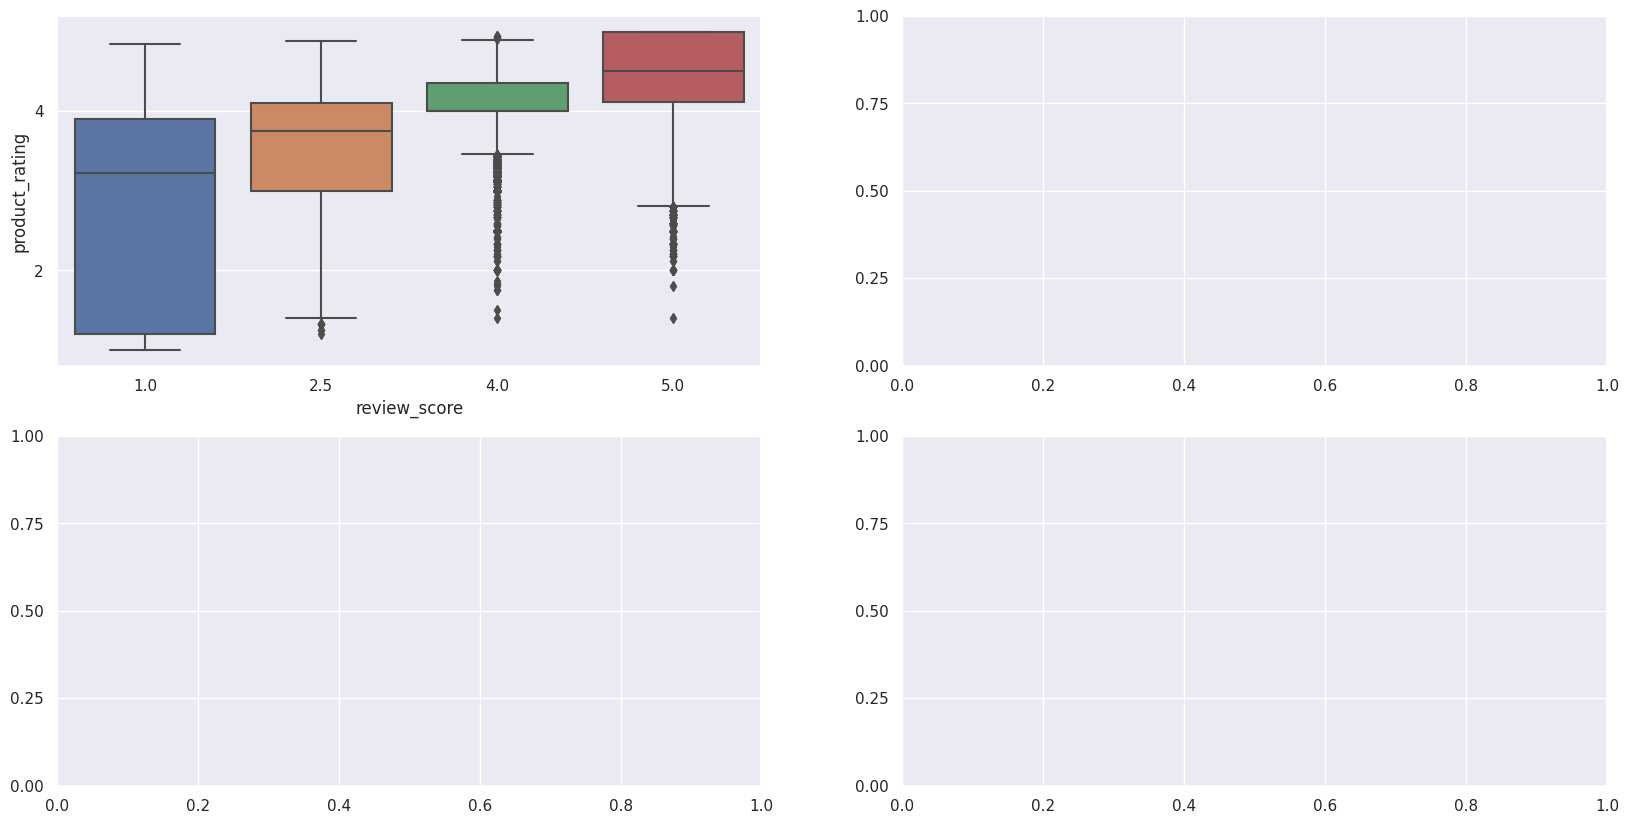

In [293]:
fig, axes = plt.subplots(2, 2)

sns.set(rc={"figure.figsize":(30, 20)},font_scale=2.5)
p1=sns.boxplot(x=y_f, y=df['product_rating'], orient='v', ax=axes[0][0])
medians = df.groupby(['review_score'])['product_rating'].median()
vertical_offset = df['product_rating'].median() * 0.03 # offset from median for display

for xtick in p1.get_xticks():
  p1.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='medium',color='w',weight='semibold')

p2=sns.boxplot(x=y_f, y=df['seller_rating'], orient='v', ax=axes[0][1])
medians = df.groupby(['review_score'])['seller_rating'].median()
vertical_offset = df['seller_rating'].median()* 0.01 # offset from median for display

for xtick in p2.get_xticks():
  p2.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='medium',color='w',weight='semibold')

p3=sns.boxplot(x=y_f, y=df['Total_shipping_date'], orient='v', ax=axes[1][0])
medians = df.groupby(['review_score'])['Total_shipping_date'].median()
vertical_offset = df['Total_shipping_date'].median() * 0.05 # offset from median for display

for xtick in p3.get_xticks():
  p3.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='medium',color='w',weight='semibold')

p4=sns.boxplot(x=y_f, y=df['Delivery_performance'], orient='v', ax=axes[1][1])
medians = df.groupby(['review_score'])['Delivery_performance'].median()
vertical_offset = df['Delivery_performance'].median() * 0.05 # offset from median for display

for xtick in p4.get_xticks():
  p4.text(xtick,medians[xtick] + vertical_offset,medians[xtick],horizontalalignment='center',size='medium',color='w',weight='semibold')

plt.show()

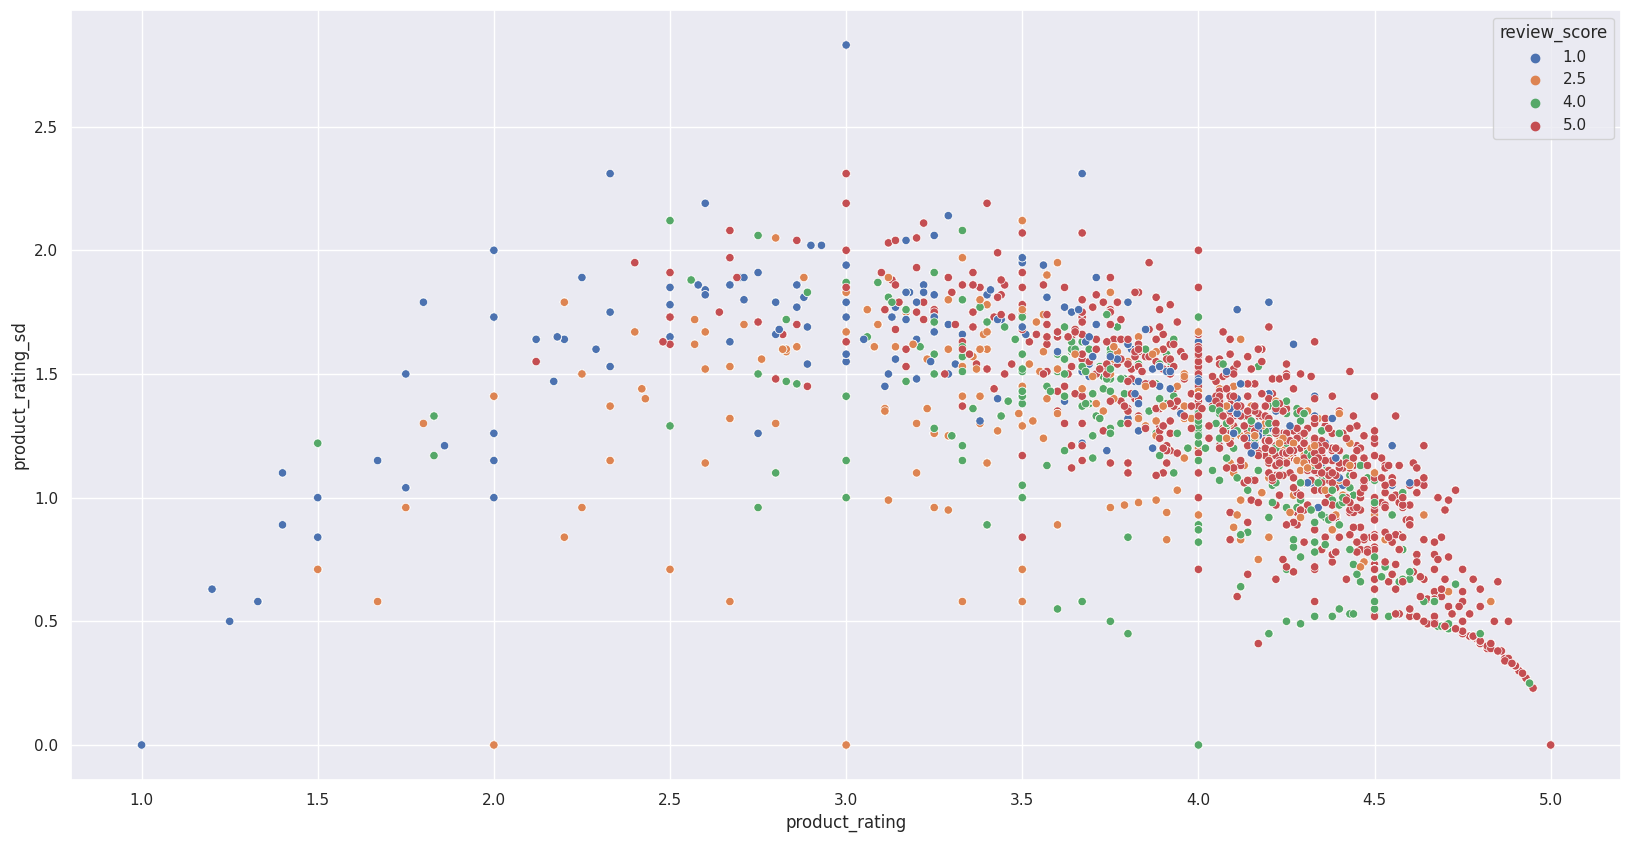

In [294]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df, x="product_rating", y="product_rating_sd", hue="review_score",palette="deep")
plt.show()

In [295]:
df['review_score'] = df['review_score'].astype('float64')

<ipython-input-296-08d50bb6fbef>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


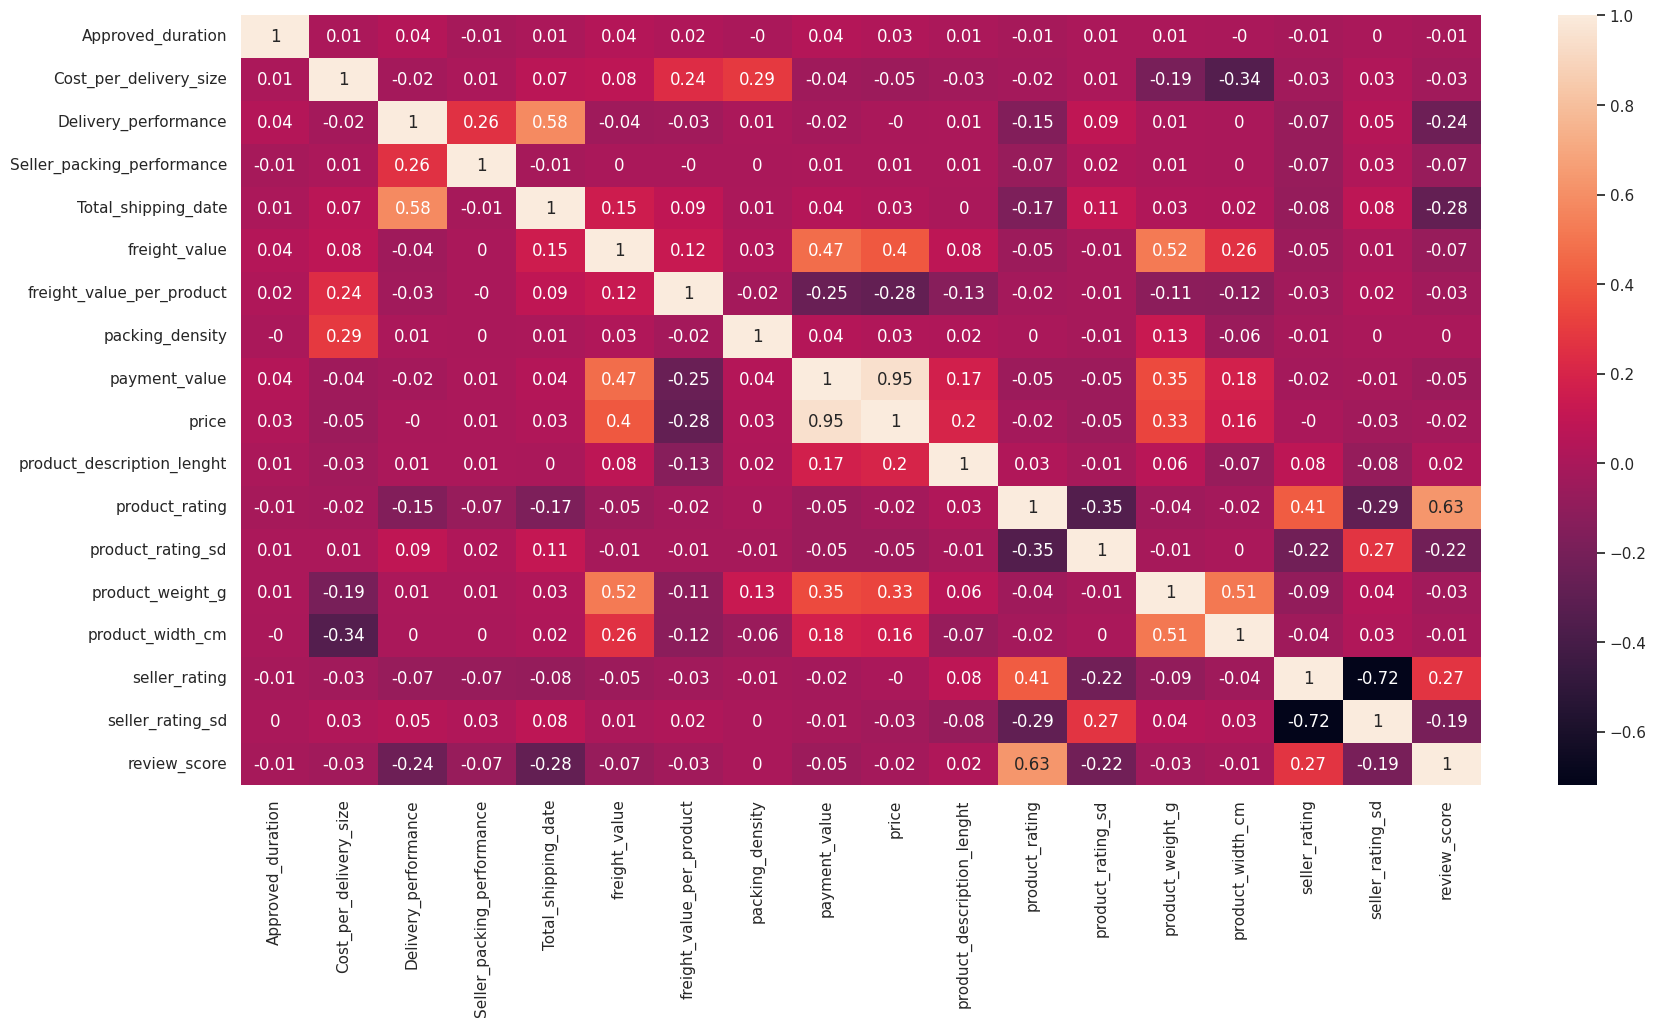

In [296]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
sns.set(font_scale=1.5)
plt.show()

In [297]:
#Summarizing a total amount of category type columns
X_f.select_dtypes(include=['category']).columns

Index(['customer_state', 'product_category_name_english', 'seller_state'], dtype='object')

In [298]:
lec= preprocessing.OrdinalEncoder(dtype=np.int64)
X_f[X_f.select_dtypes(include=['category']).columns] = lec.fit_transform(X_f[X_f.select_dtypes(include=['category']).columns])

<ipython-input-298-9b3572bf19f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_f[X_f.select_dtypes(include=['category']).columns] = lec.fit_transform(X_f[X_f.select_dtypes(include=['category']).columns])


In [299]:
#drop unnecessary features
X_f.drop(columns=X_f.select_dtypes(include=['object']),inplace=True)
#X_f.drop(columns=['order_item_id','seller_id'],inplace=True)

<ipython-input-299-1453cc3e3d7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_f.drop(columns=X_f.select_dtypes(include=['object']),inplace=True)


In [300]:
y_f

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  output = repr(obj)


80391    4.0
53654    4.0
65635    4.0
11480    4.0
6385     5.0
        ... 
54055    4.0
55400    5.0
29586    5.0
12222    5.0
4767     5.0
Name: review_score, Length: 75803, dtype: category
Categories (4, float64): [1.0 < 2.5 < 4.0 < 5.0]

In [301]:
y_f=pd.cut(y_f, bins=[1, 2, 4, 5, np.inf],
        labels=['1','2.5','4','5'],right=False)

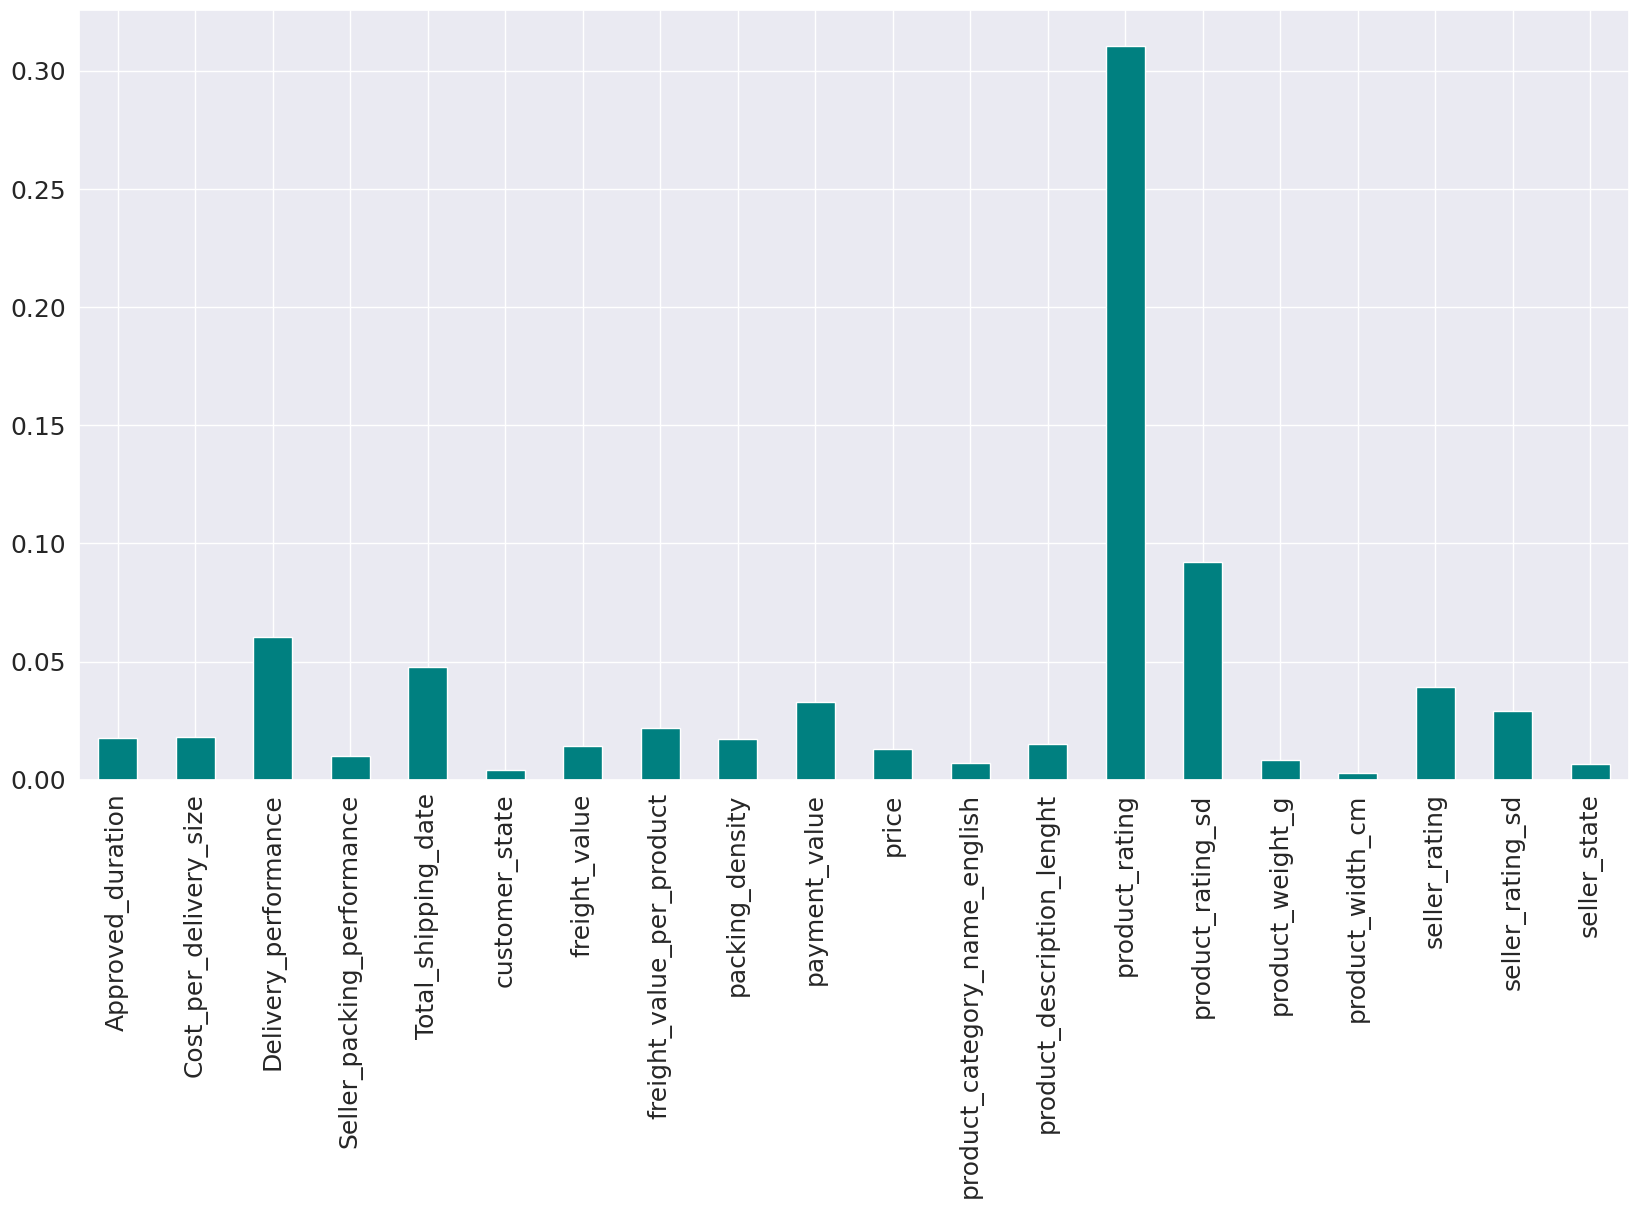

In [302]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

importances = mutual_info_classif(X_f,y_f)
feat_importances = pd.Series(importances, X_f.columns[0:len(X_f.columns)])
feat_importances.plot(kind="bar",color='teal',figsize=(20, 10),fontsize=18)
plt.show()

In [303]:
feat_importances

Approved_duration                0.017829
Cost_per_delivery_size           0.017949
Delivery_performance             0.060473
Seller_packing_performance       0.009814
Total_shipping_date              0.047850
customer_state                   0.004175
freight_value                    0.014315
freight_value_per_product        0.021694
packing_density                  0.017357
payment_value                    0.032709
price                            0.012934
product_category_name_english    0.006892
product_description_lenght       0.015149
product_rating                   0.310291
product_rating_sd                0.092181
product_weight_g                 0.008209
product_width_cm                 0.003005
seller_rating                    0.039104
seller_rating_sd                 0.028989
seller_state                     0.006541
dtype: float64

# Data Preprocessing & Split before modeling

Preprocessing by using dummies & Split the data with Scipy sparse matrices into label and target

For category feature type

In [304]:
# One-hot encode for model train
data_one_hot = pd.get_dummies(df_model, columns=df_model.select_dtypes(include=['category']).columns,sparse=True)
display(data_one_hot.head())
display(data_one_hot.shape)

price  freight_value  product_description_lenght  product_weight_g  \
80391  159.0          17.36                       825.0            2000.0   
53654   64.9          16.21                       500.0            5150.0   
65635  124.9          18.12                      2473.0            2500.0   
11480  149.0           8.30                       530.0             300.0   
6385   169.0          16.36                       419.0             415.0   

       product_width_cm  payment_value  review_score  \
80391              30.0         176.36             4   
53654              42.0          81.11             4   
65635              33.0         143.02             4   
11480              11.0         157.30             4   
6385               18.0         185.36             5   

       Seller_packing_performance  Approved_duration  Delivery_performance  \
80391                          -5               1118                   -16   
53654                          -5                404                   -14   
65635                          -1                808                   -10   
11480                          -1              11466                     0   
6385                           -7                843                   -21   

       ...  customer_state_PR  customer_state_RJ  customer_state_RN  \
80391  ...                  1                  0                  0   
53654  ...                  0                  1                  0   
65635  ...                  0                  0                  0   
11480  ...                  0                  0                  0   
6385   ...                  0                  0                  0   

       customer_state_RO  customer_state_RR  customer_state_RS  \
80391                  0                  0                  0   
53654                  0                  0                  0   
65635                  0                  0                  0   
11480                  0                  0                  0   
6385                   0                  0                  0   

       customer_state_SC  customer_state_SE  customer_state_SP  \
80391                  0                  0                  0   
53654                  0                  0                  0   
65635                  0                  0                  0   
11480                  0                  0                  1   
6385                   0                  0                  1   

       customer_state_TO  
80391                  0  
53654                  0  
65635                  0  
11480                  0  
6385                   0  

[5 rows x 139 columns]

(75803, 139)

In [305]:
# One-hot encode for test set
data_one_hot_test = pd.get_dummies(df_test, columns=df_test.select_dtypes(include=['category']).columns,sparse=True)
display(data_one_hot_test.head())
display(data_one_hot_test.shape)

price  freight_value  product_description_lenght  product_weight_g  \
46932  224.80           8.83                       566.0             250.0   
2690    89.90          12.13                       245.0            1383.0   
38538   15.90           6.58                       114.0             250.0   
96462   89.00          25.90                      1718.0             100.0   
42163  218.36          16.28                       905.0             383.0   

       product_width_cm  payment_value  review_score  \
46932              11.0         233.63             5   
2690               40.0         102.03             5   
38538              30.0          88.47             2   
96462              19.0         229.80             4   
42163              17.0         234.64             5   

       Seller_packing_performance  Approved_duration  Delivery_performance  \
46932                          -5               8772                    -9   
2690                           -6              35732                    -5   
38538                          -7                688                   -20   
96462                          -4               5063                   -17   
42163                          -2                723                    -8   

       ...  customer_state_PR  customer_state_RJ  customer_state_RN  \
46932  ...                  0                  0                  0   
2690   ...                  0                  0                  0   
38538  ...                  0                  0                  0   
96462  ...                  0                  1                  0   
42163  ...                  0                  0                  0   

       customer_state_RO  customer_state_RR  customer_state_RS  \
46932                  0                  0                  0   
2690                   0                  0                  0   
38538                  0                  0                  0   
96462                  0                  0                  0   
42163                  0                  0                  1   

       customer_state_SC  customer_state_SE  customer_state_SP  \
46932                  0                  0                  1   
2690                   0                  0                  1   
38538                  0                  0                  1   
96462                  0                  0                  0   
42163                  0                  0                  0   

       customer_state_TO  
46932                  0  
2690                   0  
38538                  0  
96462                  0  
42163                  0  

[5 rows x 139 columns]

(25079, 139)

In [306]:
display(data_one_hot.dtypes)

price                                  float64
freight_value                          float64
product_description_lenght             float64
product_weight_g                       float64
product_width_cm                       float64
                                    ...       
customer_state_RS             Sparse[uint8, 0]
customer_state_SC             Sparse[uint8, 0]
customer_state_SE             Sparse[uint8, 0]
customer_state_SP             Sparse[uint8, 0]
customer_state_TO             Sparse[uint8, 0]
Length: 139, dtype: object

In [307]:
# เตรียมข้อมูลก่อนทำการ Training โดยการแยก Training Data ออกจาก Target Data
y_train = data_one_hot['review_score']
X_train = data_one_hot[data_one_hot.columns.difference(['review_score'])]

y_test = data_one_hot_test['review_score']
X_test = data_one_hot_test[data_one_hot_test.columns.difference(['review_score'])]

In [308]:
X_train.select_dtypes(include=['float64']).columns

Index(['Cost_per_delivery_size', 'freight_value', 'freight_value_per_product',
       'packing_density', 'payment_value', 'price',
       'product_description_lenght', 'product_rating', 'product_rating_sd',
       'product_weight_g', 'product_width_cm', 'seller_rating',
       'seller_rating_sd'],
      dtype='object')

In [309]:
y_train=pd.cut(y_train, bins=[1, 2, 4, 5, np.inf],
        labels=['1','2.5','4','5'],right=False)

In [310]:
y_test=pd.cut(y_test, bins=[1, 2, 4, 5, np.inf],
        labels=['1','2.5','4','5'],right=False)

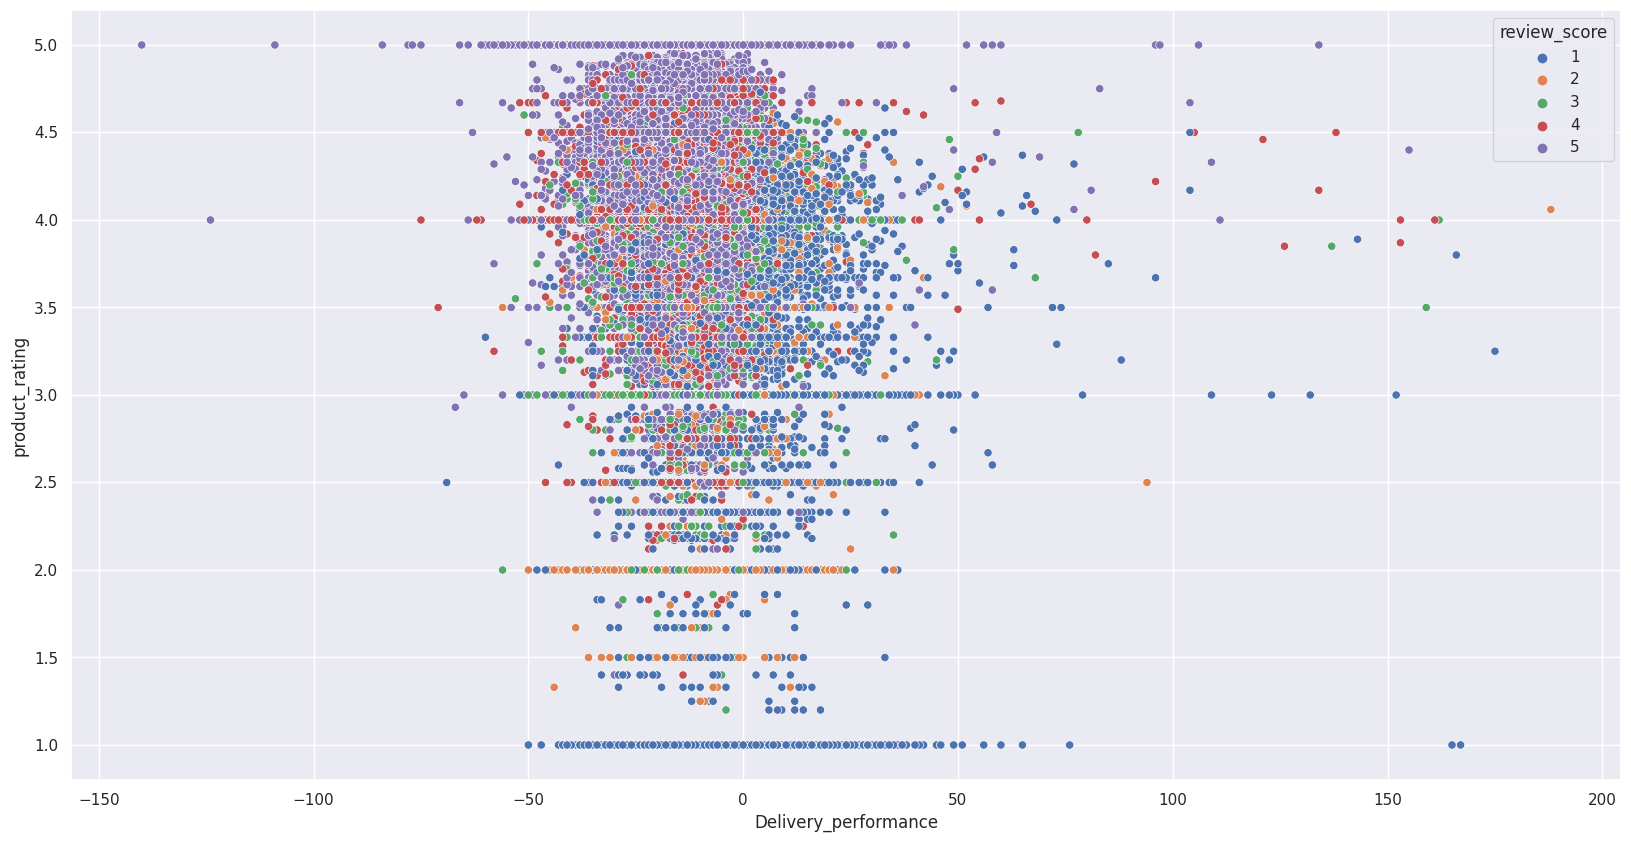

In [311]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_model, x="Delivery_performance", y="product_rating", hue="review_score",palette="deep")
plt.show()

## Train data overview

In [312]:
X_train.head()

Approved_duration  Cost_per_delivery_size  Delivery_performance  \
80391               1118                0.000772                   -16   
53654                404                0.001072                   -14   
65635                808                0.001596                   -10   
11480              11466                0.023580                     0   
6385                 843                0.002913                   -21   

       Seller_packing_performance  Total_shipping_date  customer_state_AC  \
80391                          -5                    5                  0   
53654                          -5                    5                  0   
65635                          -1                   14                  0   
11480                          -1                    2                  0   
6385                           -7                    3                  0   

       customer_state_AL  customer_state_AM  customer_state_AP  \
80391                  0                  0                  0   
53654                  0                  0                  0   
65635                  0                  0                  0   
11480                  0                  0                  0   
6385                   0                  0                  0   

       customer_state_BA  ...  seller_state_PE  seller_state_PI  \
80391                  0  ...                0                0   
53654                  0  ...                0                0   
65635                  0  ...                0                0   
11480                  0  ...                0                0   
6385                   0  ...                0                0   

       seller_state_PR  seller_state_RJ  seller_state_RN  seller_state_RO  \
80391                0                1                0                0   
53654                0                0                0                0   
65635                0                0                0                0   
11480                0                0                0                0   
6385                 0                0                0                0   

       seller_state_RS  seller_state_SC  seller_state_SE  seller_state_SP  
80391                0                0                0                0  
53654                0                0                0                0  
65635                0                0                0                1  
11480                0                0                0                1  
6385                 0                0                0                1  

[5 rows x 138 columns]

In [313]:
y_train.value_counts()

5      44093
4      14709
2.5     8940
1       8061
Name: review_score, dtype: int64

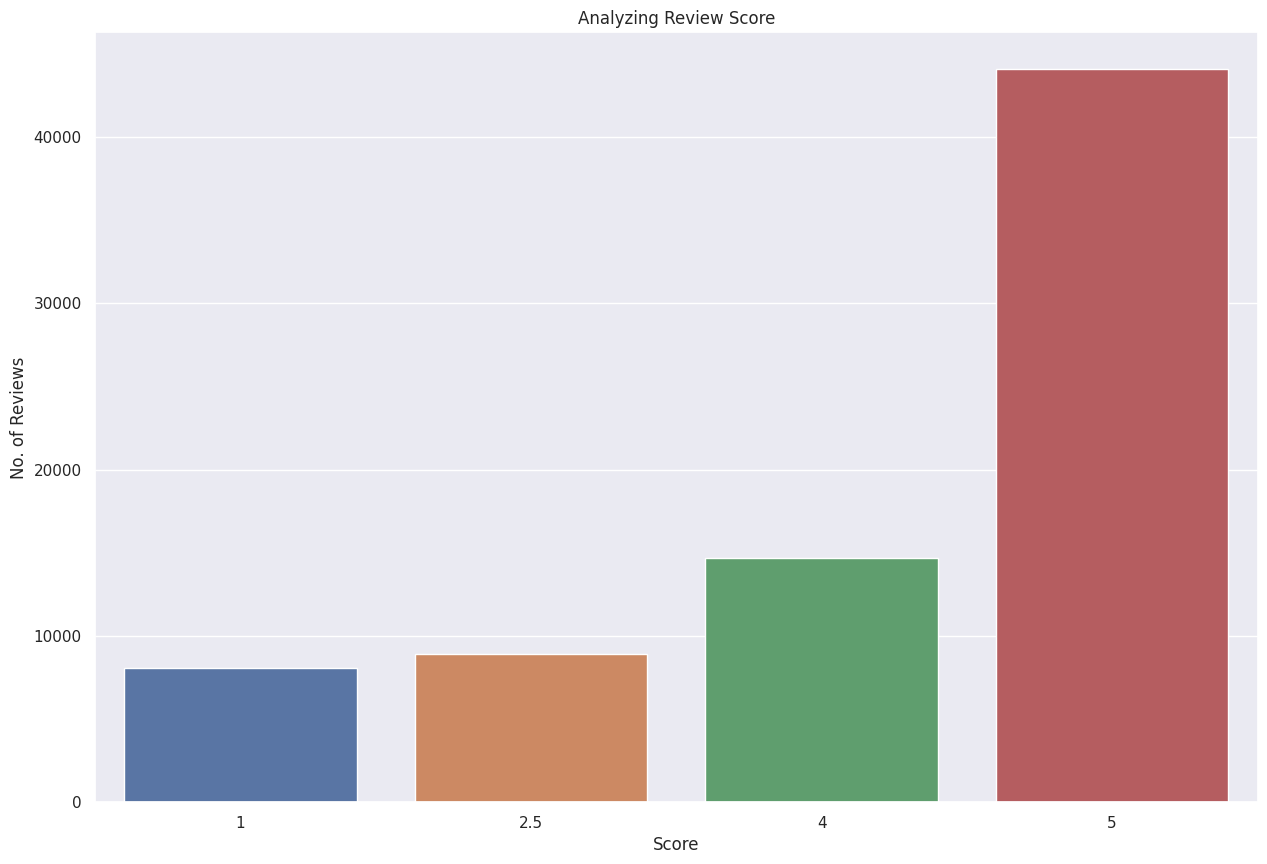

In [314]:
# analyzing the review score
plt.figure(figsize=(15,10))
sns.countplot(x=y_train)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')
sns.set(font_scale=2)

## Test data overview

In [315]:
y_test.value_counts()

5      14642
4       4859
2.5     2888
1       2690
Name: review_score, dtype: int64

Text(0, 0.5, 'No. of Reviews')

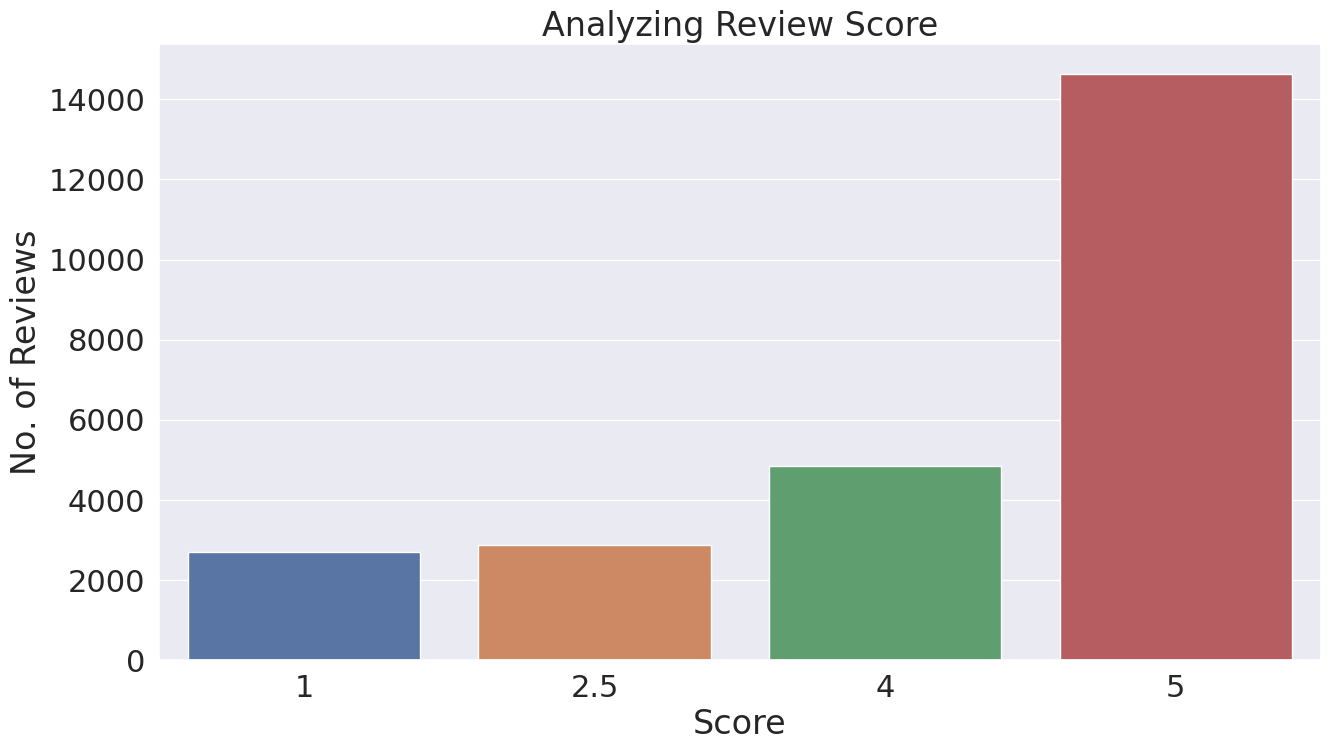

In [316]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x=y_test)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

# Modeling


In [317]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))

    sns.set(font_scale=1)
    labels = [1,2.5,4,5]
    # representing A in heatmap format
    cmap1=sns.light_palette("orange")
    cmap2=sns.light_palette("#34c3eb")
    cmap3=sns.light_palette("purple")
    
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap1, fmt=".1f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap2, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap3, fmt=".3f", xticklabels=labels, yticklabels=labels,annot_kws={"size":14})
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [318]:
Score = ['product_rating', 'product_rating_sd', 'seller_rating', 'seller_rating_sd']
Col_list=list(X_train.select_dtypes(include=['float64']).columns)

for n in Score:
    # taking 1 number found in the list
    # remove it from the list
    while n in Col_list:
      Col_list.remove(n)

In [319]:
Col_list

['Cost_per_delivery_size',
 'freight_value',
 'freight_value_per_product',
 'packing_density',
 'payment_value',
 'price',
 'product_description_lenght',
 'product_weight_g',
 'product_width_cm']

### Base model

In [320]:
df_test

price  freight_value  product_description_lenght  product_weight_g  \
46932  224.80           8.83                       566.0             250.0   
2690    89.90          12.13                       245.0            1383.0   
38538   15.90           6.58                       114.0             250.0   
96462   89.00          25.90                      1718.0             100.0   
42163  218.36          16.28                       905.0             383.0   
...       ...            ...                         ...               ...   
89055   89.90          17.34                       219.0            1870.0   
51094  689.89          21.67                       912.0            1500.0   
43882   14.49           7.87                      3153.0             300.0   
92900   15.50          13.47                       185.0             300.0   
86080   69.90          13.51                       279.0            1150.0   

       product_width_cm product_category_name_english seller_state  \
46932              11.0                 watches_gifts           SP   
2690               40.0                bed_bath_table           SP   
38538              30.0                bed_bath_table           SP   
96462              19.0      fashion_bags_accessories           BA   
42163              17.0         computers_accessories           SP   
...                 ...                           ...          ...   
89055              29.0      fashion_bags_accessories           PR   
51094              11.0                consoles_games           PR   
43882              18.0                 health_beauty           SP   
92900              20.0              small_appliances           PR   
86080              18.0                    food_drink           SP   

       payment_value customer_state  review_score  ...  Approved_duration  \
46932         233.63             SP             5  ...               8772   
2690          102.03             SP             5  ...              35732   
38538          88.47             SP             2  ...                688   
96462         229.80             RJ             4  ...               5063   
42163         234.64             RS             5  ...                723   
...              ...            ...           ...  ...                ...   
89055         107.24             MG             5  ...              79387   
51094         711.56             RJ             3  ...                923   
43882          22.36             SP             5  ...              71430   
92900          28.97             SP             5  ...                812   
86080          83.41             SP             5  ...               1706   

       Delivery_performance  Total_shipping_date  freight_value_per_product  \
46932                    -9                    4                   0.039279   
2690                     -5                    9                   0.134928   
38538                   -20                    4                   0.413836   
96462                   -17                    8                   0.291011   
42163                    -8                   14                   0.074556   
...                     ...                  ...                        ...   
89055                   -22                    5                   0.192881   
51094                    -3                   19                   0.031411   
43882                    -6                    2                   0.543133   
92900                   -14                    9                   0.869032   
86080                   -16                    5                   0.193276   

       Cost_per_delivery_size  packing_density  seller_rating  \
46932                0.004561         0.129132           4.33   
2690                 0.000607         0.069150           3.81   
38538                0.001371         0.052083           3.67   
96462                0.016037         0.061920           3.69   
42163                0.002520  

In [321]:
y_test_predict = df_test['product_rating']

#Grouping class into 4 classes

y_test_predict = pd.cut(y_test_predict, bins=[1, 1.5, 3.5, 4.5, np.inf],
        labels=['1','2.5','4','5'],right=False)

In [322]:
y_test_predict

46932      5
2690       4
38538    2.5
96462      4
42163      4
        ... 
89055      4
51094    2.5
43882      4
92900      4
86080      4
Name: product_rating, Length: 25079, dtype: category
Categories (4, object): ['1' < '2.5' < '4' < '5']

In [323]:
y_test_predict.value_counts()

4      16126
5       6353
2.5     2229
1        371
Name: product_rating, dtype: int64

In [324]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.25      0.03      0.06      2690
         2.5       0.16      0.12      0.14      2888
           4       0.20      0.65      0.30      4859
           5       0.64      0.28      0.39     14642

    accuracy                           0.31     25079
   macro avg       0.31      0.27      0.22     25079
weighted avg       0.46      0.31      0.31     25079



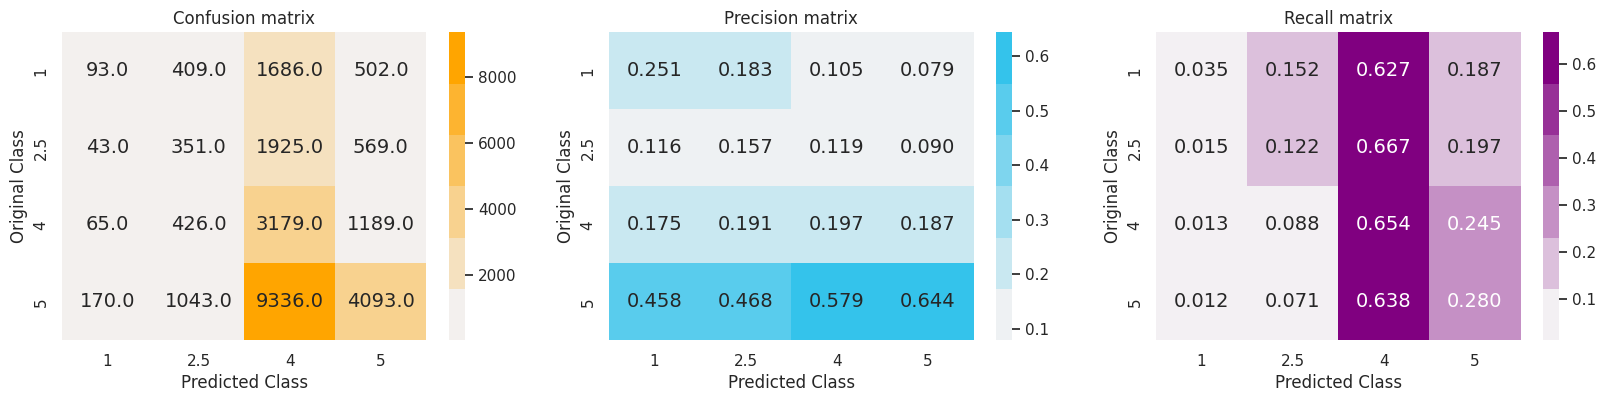

In [325]:
plot_confusion_matrix(y_test, y_test_predict)

## Before treatment with imbalancing

### Model 1: Random Forest

In [326]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from imblearn.pipeline import make_pipeline as make_imb_pipeline


RF = RandomForestClassifier()
ct = ColumnTransformer(
    [('std', StandardScaler(),Col_list)],remainder='passthrough')
pipe_RF = Pipeline([('ct', ct), ('RF', RF)])

sk_folds = StratifiedKFold(n_splits = 5)

pipe_RF.fit(X_train, y_train)
pipe_RF.score(X_test, y_test)
print('model score =',pipe_RF.score(X_train,y_train))

CV_Result = cross_val_score(pipe_RF, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

model score = 0.9984037571072385
[0.65942828 0.65779478 0.6581596  0.67376611 0.6635201 ]
0.6625337728827458
0.0059728337450992985


In [327]:
pipe_RF.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('std', StandardScaler(),
                                    ['Cost_per_delivery_size', 'freight_value',
                                     'freight_value_per_product',
                                     'packing_density', 'payment_value', 'price',
                                     'product_description_lenght',
                                     'product_weight_g', 'product_width_cm'])])),
  ('RF', RandomForestClassifier())],
 'verbose': False,
 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('std', StandardScaler(),
                                  ['Cost_per_delivery_size', 'freight_value',
                                   'freight_value_per_product',
                                   'packing_density', 'payment_value', 'price',
                                   'product_description_lenght',
                                

In [328]:
pred_RF = pipe_RF.predict(X_test)
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           1       0.47      0.32      0.38      2690
         2.5       0.26      0.10      0.15      2888
           4       0.28      0.12      0.17      4859
           5       0.63      0.86      0.73     14642

    accuracy                           0.57     25079
   macro avg       0.41      0.35      0.36     25079
weighted avg       0.50      0.57      0.52     25079



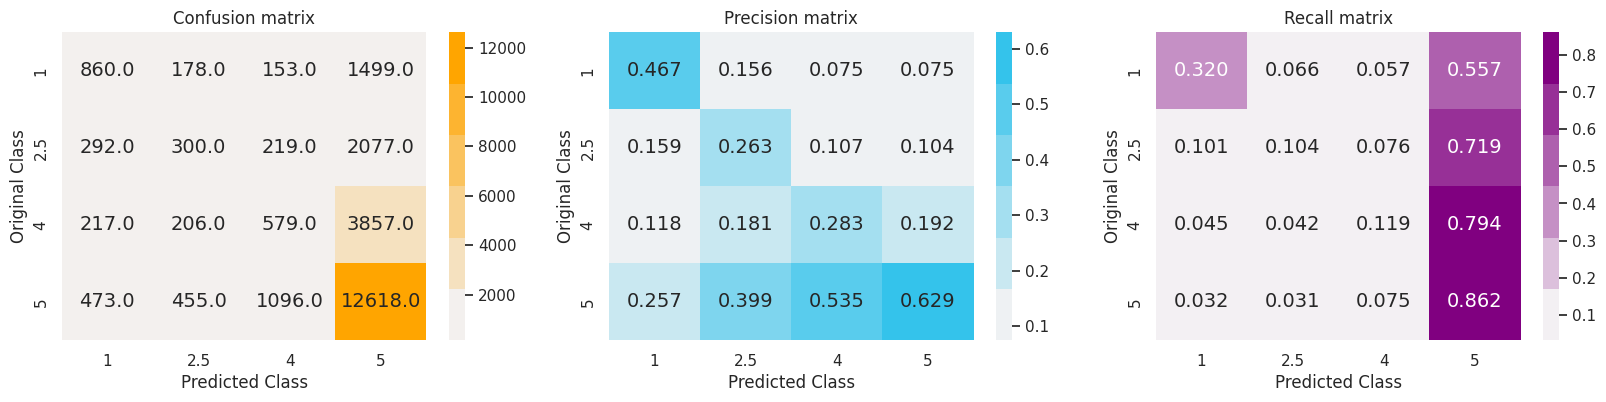

In [329]:
plot_confusion_matrix(y_test, pred_RF)

In [330]:
from sklearn.metrics import accuracy_score
prediction_RF = pipe_RF.predict(X_test)
print('accuracy =',accuracy_score(y_test, prediction_RF)*100,'%')

accuracy = 57.24709916663344 %


In [331]:
np.unique(prediction_RF)

array(['1', '2.5', '4', '5'], dtype=object)

In [332]:
y_train

80391    4
53654    4
65635    4
11480    4
6385     5
        ..
54055    4
55400    5
29586    5
12222    5
4767     5
Name: review_score, Length: 75803, dtype: category
Categories (4, object): ['1' < '2.5' < '4' < '5']

In [ ]:
from sklearn.metrics import mean_squared_error
prediction_RF = pipe_RF.predict(X_train)
forest_mse = mean_squared_error(y_train, prediction_RF)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

TypeError: ignored

### Model 2: KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
pipe_KNN = Pipeline([('ct', ct), ('KNN', knn_clf)])
pipe_KNN.fit(X_train,y_train)
ypred=pipe_KNN.predict(X_test)

CV_Result = cross_val_score(pipe_KNN, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

[0.49033487 0.48805897 0.48424362 0.49217945 0.48806636]
0.4885766546738507
0.002659886773433014


In [ ]:
pipe_KNN.get_params()

{'memory': None, 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('std', StandardScaler(),
                                    ['Cost_per_delivery_size', 'freight_value',
                                     'freight_value_per_product',
                                     'packing_density', 'payment_value', 'price',
                                     'product_description_lenght',
                                     'product_height_cm', 'product_weight_g',
                                     'product_width_cm'])])),
  ('KNN',
   KNeighborsClassifier())], 'verbose': False, 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('std', StandardScaler(),
                                  ['Cost_per_delivery_size', 'freight_value',
                                   'freight_value_per_product',
                                   'packing_density', 'payment_value', 'price',
                                   'prod

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       0.41      0.28      0.33      2690
         2.5       0.18      0.12      0.14      2888
           4       0.21      0.17      0.19      4859
           5       0.62      0.75      0.68     14642

    accuracy                           0.51     25079
   macro avg       0.36      0.33      0.34     25079
weighted avg       0.47      0.51      0.49     25079



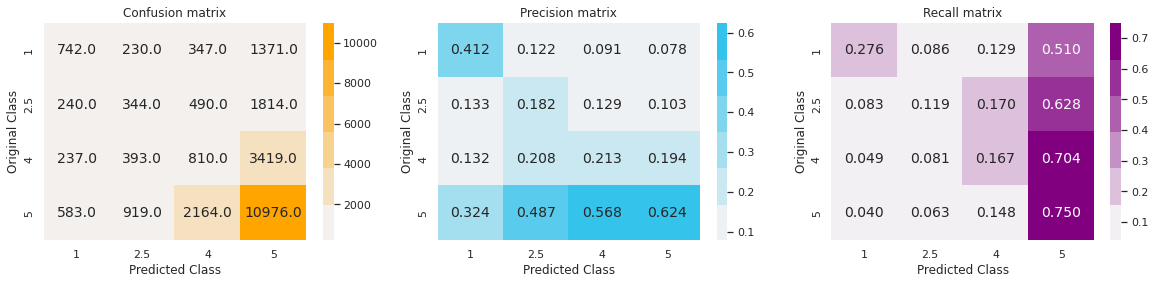

In [ ]:
plot_confusion_matrix(y_test, ypred)

In [ ]:
prediction_KNN = pipe_KNN.predict(X_test)
print('accuracy =',accuracy_score(y_test, prediction_KNN)*100,'%')

accuracy = 51.32581043901272 %


In [ ]:
prediction_KNN = pipe_KNN.predict(X_train)
forest_mse = mean_squared_error(y_train, prediction_KNN)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.2892505825587395


### Model 3: Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
pipe_lr = Pipeline([('ct', ct), ('lr', lr)])
pipe_lr.fit(X_train,y_train)
ypred=pipe_lr.predict(X_test)

CV_Result = cross_val_score(pipe_lr, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

[0.51850585 0.5192509  0.52898288 0.52070377 0.51705068]
0.5208988182331917
0.0042104675211574035


In [ ]:
pipe_lr.get_params()

{'memory': None, 'steps': [('ct', ColumnTransformer(remainder='passthrough',
                     transformers=[('std', StandardScaler(),
                                    ['Cost_per_delivery_size', 'freight_value',
                                     'freight_value_per_product',
                                     'packing_density', 'payment_value', 'price',
                                     'product_description_lenght',
                                     'product_height_cm', 'product_weight_g',
                                     'product_width_cm'])])),
  ('lr',
   LogisticRegression(multi_class='ovr', solver='liblinear'))], 'verbose': False, 'ct': ColumnTransformer(remainder='passthrough',
                   transformers=[('std', StandardScaler(),
                                  ['Cost_per_delivery_size', 'freight_value',
                                   'freight_value_per_product',
                                   'packing_density', 'payment_value', 'price',
      

In [ ]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       0.30      0.23      0.26      2690
         2.5       0.22      0.00      0.00      2888
           4       0.24      0.02      0.03      4859
           5       0.60      0.93      0.73     14642

    accuracy                           0.57     25079
   macro avg       0.34      0.30      0.26     25079
weighted avg       0.46      0.57      0.46     25079



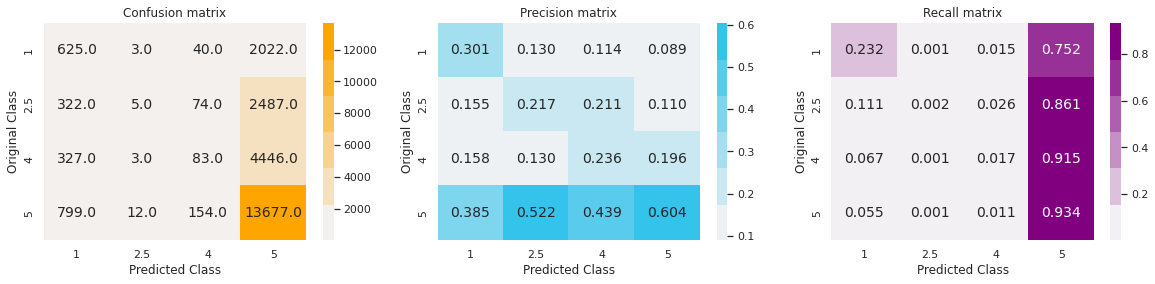

In [ ]:
plot_confusion_matrix(y_test, ypred)

In [ ]:
prediction_lr = pipe_lr.predict(X_test)
print('accuracy =',accuracy_score(y_test, prediction_lr)*100,'%')

accuracy = 57.37868336058056 %


In [ ]:
prediction_lr = pipe_lr.predict(X_train)
forest_mse = mean_squared_error(y_train, prediction_lr)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.3420836811879713


## Imbalance learning - Under sampling

In [333]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_train_subsample.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


(75803, 138)
(32244, 138)


In [334]:
y_train_subsample.value_counts()

1      8061
2.5    8061
4      8061
5      8061
Name: review_score, dtype: int64

### Model 1: Random Forest

In [335]:
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

undersample_pipe_RF = make_imb_pipeline(RandomUnderSampler(), pipe_RF)
undersample_pipe_RF.fit(X_train, y_train)

CV_Result = cross_val_score(undersample_pipe_RF, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[0.58244066 0.57501955 0.58549569 0.577527   0.58098602]
0.580293783582155
0.0036775189817601747


In [336]:
undersample_pipe_RF.get_params()

{'memory': None,
 'steps': [('randomundersampler', RandomUnderSampler()),
  ('pipeline',
   Pipeline(steps=[('ct',
                    ColumnTransformer(remainder='passthrough',
                                      transformers=[('std', StandardScaler(),
                                                     ['Cost_per_delivery_size',
                                                      'freight_value',
                                                      'freight_value_per_product',
                                                      'packing_density',
                                                      'payment_value', 'price',
                                                      'product_description_lenght',
                                                      'product_weight_g',
                                                      'product_width_cm'])])),
                   ('RF', RandomForestClassifier())]))],
 'verbose': False,
 'randomundersampler': RandomUnderSampler(),

In [337]:
print(classification_report(y_test, undersample_pipe_RF.predict(X_test)))

              precision    recall  f1-score   support

           1       0.29      0.43      0.35      2690
         2.5       0.15      0.32      0.20      2888
           4       0.22      0.33      0.26      4859
           5       0.67      0.35      0.46     14642

    accuracy                           0.35     25079
   macro avg       0.33      0.36      0.32     25079
weighted avg       0.48      0.35      0.38     25079



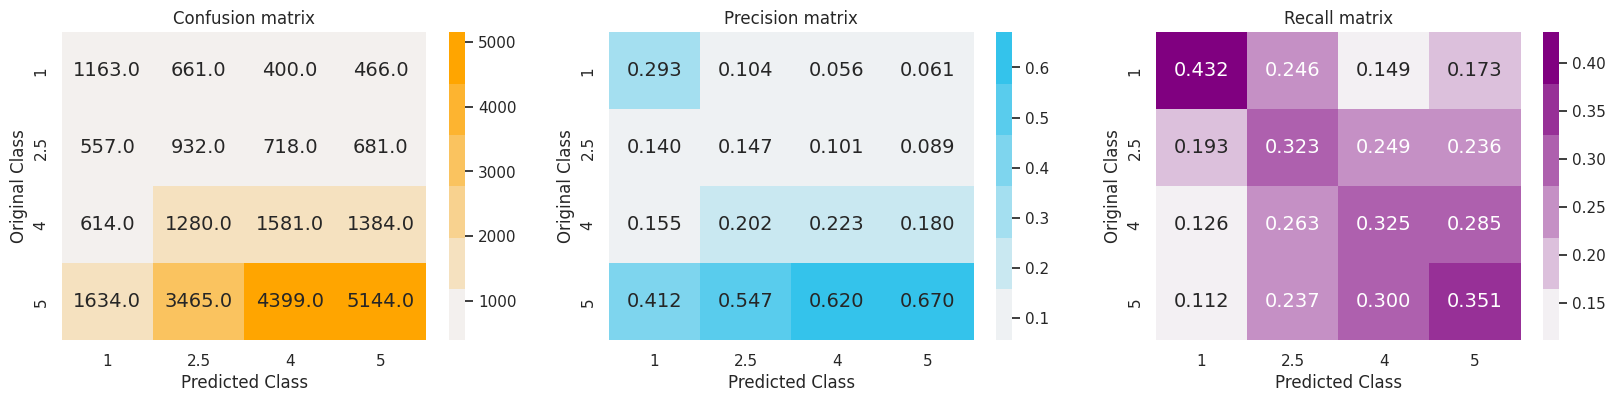

In [338]:
plot_confusion_matrix(y_test, undersample_pipe_RF.predict(X_test))

In [ ]:
undersample_pipe_RF_Prediction = undersample_pipe_RF.predict(X_train)
forest_mse = mean_squared_error(y_train, undersample_pipe_RF_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

TypeError: ignored

#### Hyperparameter tuning

In [339]:
undersample_pipe_RF.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomundersampler', 'pipeline', 'randomundersampler__random_state', 'randomundersampler__replacement', 'randomundersampler__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__RF', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__RF__bootstrap', 'pipeline__RF__ccp_alpha', 'pipeline__RF__class_weight', 'pipeline__RF__criterion', 'pipeline__RF__max_depth', 'pipeline__RF__max_features', 'pipeline__RF__max_leaf_nodes', 'pipeline__RF__max_samples', 'pipeline__RF__min_impurity_decrease', 'pipeline__RF__min_samples_leaf', 'pipeline__RF__min_samples_split', 'pipeline__RF__min_weight_fraction_leaf', 'pipeline__

In [340]:
from sklearn import decomposition
from sklearn.model_selection import cross_val_score

#hyper parameters
parameters = {'pipeline__RF__min_samples_split': [2,5,10,20],'pipeline__RF__n_estimators':[100,150,200]}

sk_folds = StratifiedKFold(n_splits = 5)

#Grid search CV
RF = GridSearchCV(estimator=undersample_pipe_RF,param_grid=parameters)
RF.fit(X_train, y_train)

#Now we are using print statements to print the results. It will give the values of hyperparameters as a result.

#print("Best Number Of Components:", DT.best_estimator_.get_params()["pca__n_components"])
print(RF.best_estimator_.get_params()["pipeline"])
CV_Result = cross_val_score(RF, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['Cost_per_delivery_size',
                                                   'freight_value',
                                                   'freight_value_per_product',
                                                   'packing_density',
                                                   'payment_value', 'price',
                                                   'product_description_lenght',
                                                   'product_weight_g',
                                                   'product_width_cm'])])),
                ('RF', RandomForestClassifier(min_samples_split=10))])
[0.58062502 0.58435408 0.58636087 0.58020918 0.59122324]
0.5845544774925523
0.004052106089248459


In [341]:
#model
clf_RF = GridSearchCV(estimator=undersample_pipe_RF,param_grid={'pipeline__RF__min_samples_split': [10],'pipeline__RF__n_estimators':[150]},cv=sk_folds, verbose=True,return_train_score=True)
clf_RF.fit(X_train,y_train)

#predicted value of y
y_pred_train_RF = clf_RF.predict(X_train)
y_pred_test_RF = clf_RF.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [342]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           1       0.30      0.43      0.35      2690
         2.5       0.15      0.33      0.20      2888
           4       0.22      0.34      0.27      4859
           5       0.67      0.33      0.45     14642

    accuracy                           0.34     25079
   macro avg       0.33      0.36      0.32     25079
weighted avg       0.48      0.34      0.37     25079



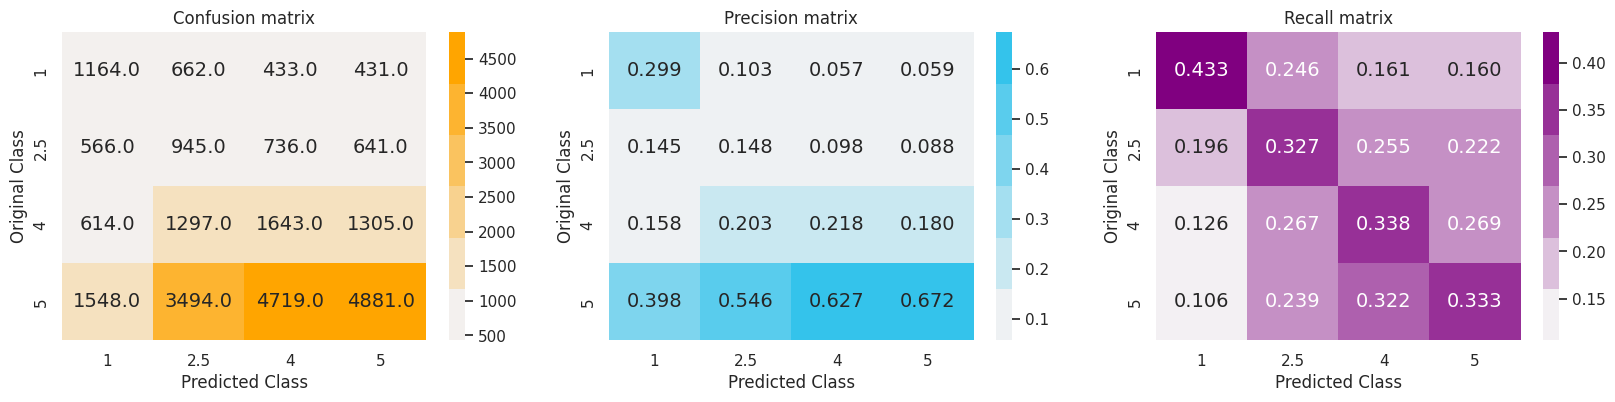

In [343]:
plot_confusion_matrix(y_test, y_pred_test_RF)

In [344]:
clf_RF.param_grid

{'pipeline__RF__min_samples_split': [10], 'pipeline__RF__n_estimators': [150]}

In [345]:
clf_RF.best_estimator_

Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('pipeline',
                 Pipeline(steps=[('ct',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std',
                                                                   StandardScaler(),
                                                                   ['Cost_per_delivery_size',
                                                                    'freight_value',
                                                                    'freight_value_per_product',
                                                                    'packing_density',
                                                                    'payment_value',
                                                                    'price',
                                                                    'product_description_lenght',
                                                                    'product_weight_g',
                                                                    'product_width_cm'])])),
                                 ('RF',
                                  RandomForestClassifier(min_samples_split=10,
                                                         n_estimators=150))]))])

In [346]:
clf_RF.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler()),
                                       ('pipeline',
                                        Pipeline(steps=[('ct',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('std',
                                                                                          StandardScaler(),
                                                                                          ['Cost_per_delivery_size',
                                                                                           'freight_value',
                                                                                           'freight_value_per

In [347]:
rfc1=RandomForestClassifier(random_state=42, n_estimators= 150, min_samples_split=10)
under_rfc1=make_imb_pipeline(RandomUnderSampler(),rfc1)

In [348]:
under_rfc1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Pipeline(steps=[('randomundersampler', RandomUnderSampler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=10, n_estimators=150,
                                        random_state=42))])

In [349]:
y_pred_train_rfc1 = under_rfc1.predict(X_train)
y_pred_test_rfc1 = under_rfc1.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [350]:
print(classification_report(y_test, y_pred_test_rfc1))

              precision    recall  f1-score   support

           1       0.30      0.43      0.35      2690
         2.5       0.15      0.32      0.20      2888
           4       0.22      0.34      0.27      4859
           5       0.68      0.35      0.46     14642

    accuracy                           0.35     25079
   macro avg       0.34      0.36      0.32     25079
weighted avg       0.49      0.35      0.38     25079



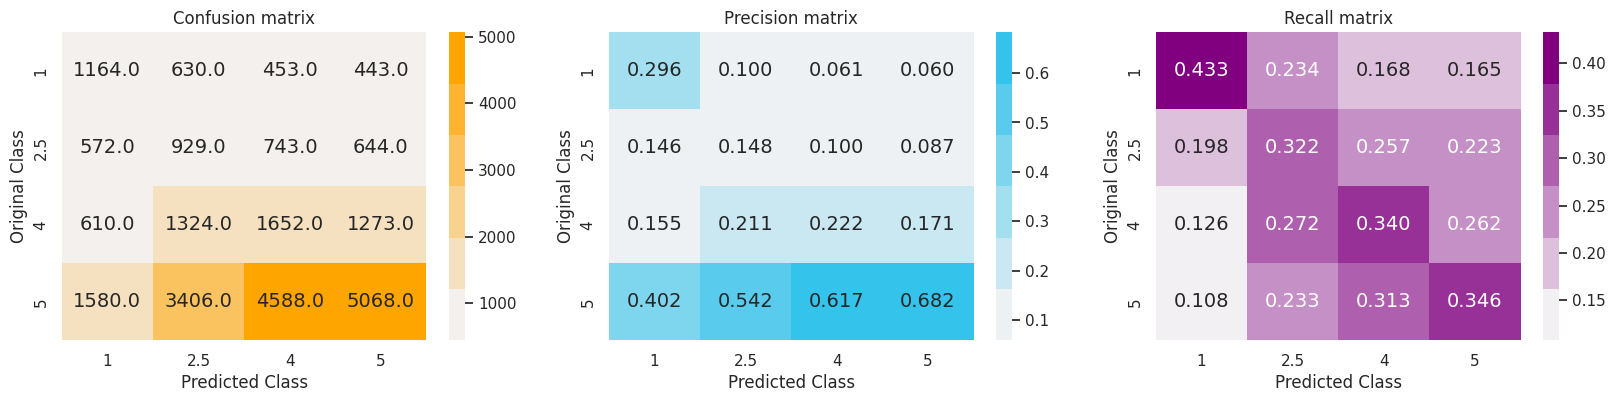

In [351]:
plot_confusion_matrix(y_test, y_pred_test_rfc1)

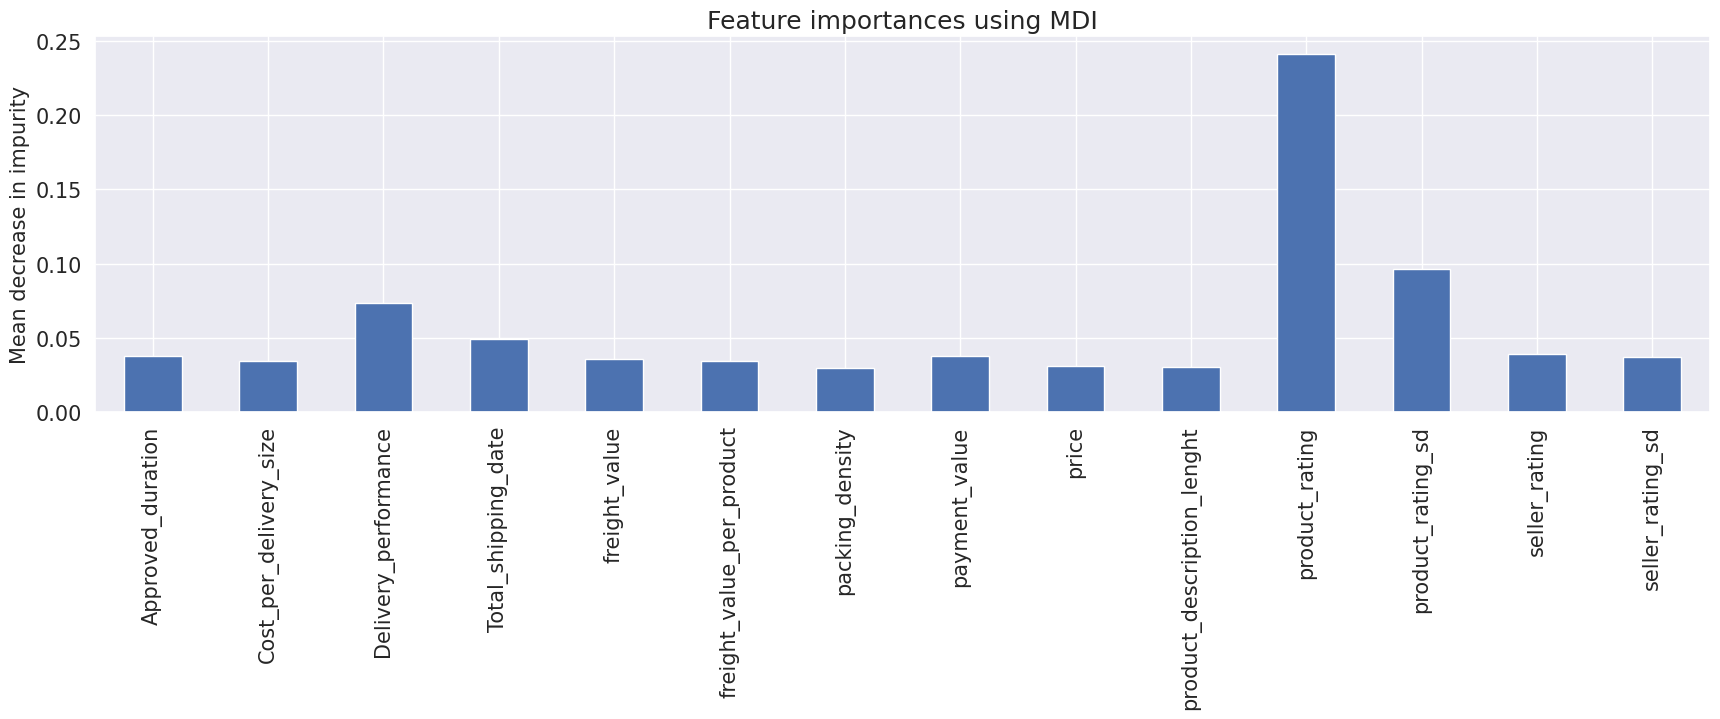

In [361]:
importances=under_rfc1.steps[1][1].feature_importances_
feature_names = X_train.columns.values
forest_importances = pd.Series(importances, index=feature_names)

col_use_importances = forest_importances[forest_importances >= np.quantile(forest_importances, .9)]

fig, ax = plt.subplots()
col_use_importances.plot.bar(ax=ax,fontsize=15)
ax.set_title("Feature importances using MDI", fontsize=18)
ax.set_ylabel("Mean decrease in impurity", fontsize=15)
plt.rcParams.update({'font.size': 100})
fig.tight_layout()

In [ ]:
col_use_importances

Approved_duration               0.039940
Cost_per_delivery_size          0.036721
Delivery_performance            0.072783
Estimate_total_shipping_date    0.033523
Total_shipping_date             0.051614
freight_value                   0.037776
freight_value_per_product       0.036795
payment_value                   0.039374
product_rating                  0.241674
product_rating_sd               0.101620
seller_rating                   0.041151
seller_rating_sd                0.038668
dtype: float64

In [ ]:
forest_mse_RF = mean_squared_error(y_train, y_pred_train_RF)
forest_rmse_RF = np.sqrt(forest_mse_RF)
print('error = ',forest_rmse_RF)

error =  1.2264872356224865


### Model 2: KNN

In [ ]:
undersample_pipe_KNN = make_imb_pipeline(RandomUnderSampler(), pipe_KNN)
undersample_pipe_KNN.fit(X_train, y_train)

CV_Result = cross_val_score(undersample_pipe_KNN, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[0.29813176 0.29620097 0.29270338 0.28949307 0.29728466]
0.2947627677309073
0.0032183608707206366


In [ ]:
print(classification_report(y_test, undersample_pipe_KNN.predict(X_test)))

              precision    recall  f1-score   support

           1       0.21      0.44      0.28      2690
         2.5       0.13      0.34      0.19      2888
           4       0.21      0.30      0.24      4859
           5       0.64      0.23      0.33     14642

    accuracy                           0.28     25079
   macro avg       0.30      0.32      0.26     25079
weighted avg       0.45      0.28      0.29     25079



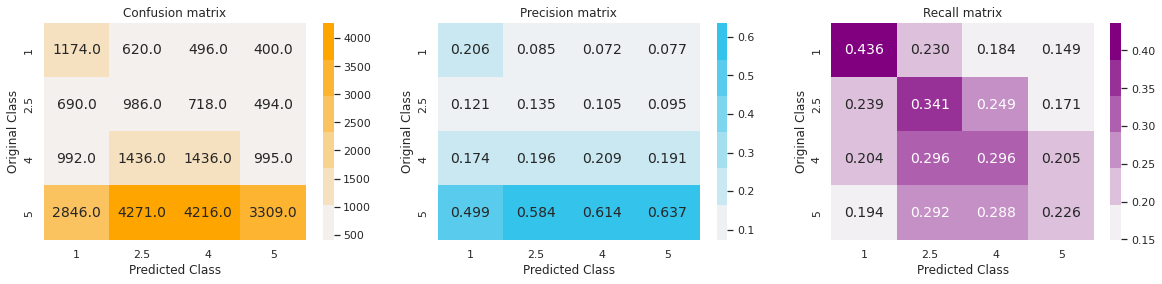

In [ ]:
plot_confusion_matrix(y_test, undersample_pipe_KNN.predict(X_test))

In [ ]:
undersample_pipe_KNN_Prediction = undersample_pipe_KNN.predict(X_train)
forest_mse = mean_squared_error(y_train, undersample_pipe_KNN_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.9020910800732058


####Hyperparameter tuning

In [ ]:
undersample_pipe_KNN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomundersampler', 'pipeline', 'randomundersampler__random_state', 'randomundersampler__replacement', 'randomundersampler__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__KNN', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__KNN__algorithm', 'pipeline__KNN__leaf_size', 'pipeline__KNN__metric', 'pipeline__KNN__metric_params', 'pipeline__KNN__n_jobs', 'pipeline__KNN__n_neighbors', 'pipeline__KNN__p', 'pipeline__KNN__weights'])

In [ ]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(3,30,2))

#Convert to dictionary
hyperparameters = dict(pipeline__KNN__n_neighbors=n_neighbors)

#Use GridSearch
clf_knn = GridSearchCV(undersample_pipe_KNN, hyperparameters, cv=sk_folds)

#Fit the model
best_model = clf_knn.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['pipeline__KNN__n_neighbors'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

Best n_neighbors: 27


In [ ]:
#model
clf_knn = GridSearchCV(estimator=undersample_pipe_KNN,param_grid={'pipeline__KNN__n_neighbors': [27]},cv=sk_folds, verbose=True,return_train_score=True)
clf_knn.fit(X_train,y_train)


#predicted value of y
y_pred_train_knn = clf_knn.predict(X_train)
y_pred_test_knn = clf_knn.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

In [ ]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           1       0.21      0.36      0.27      2690
         2.5       0.12      0.25      0.16      2888
           4       0.21      0.30      0.24      4859
           5       0.63      0.32      0.42     14642

    accuracy                           0.31     25079
   macro avg       0.29      0.31      0.27     25079
weighted avg       0.44      0.31      0.34     25079



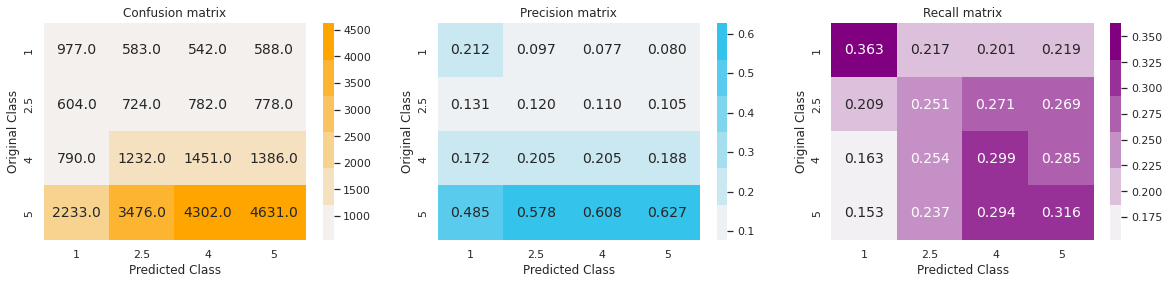

In [ ]:
plot_confusion_matrix(y_test, y_pred_test_knn)

In [ ]:
forest_mse_KNN = mean_squared_error(y_train, y_pred_train_knn)
forest_rmse_KNN = np.sqrt(forest_mse_KNN)
print('error = ',forest_rmse_KNN)

error =  1.8892620890125087


### Model 3: Logistic regression

In [ ]:
undersample_pipe_lr = make_imb_pipeline(RandomUnderSampler(), pipe_lr)
undersample_pipe_lr.fit(X_train, y_train)

CV_Result = cross_val_score(undersample_pipe_lr, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="f1_weighted")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[0.62442557 0.57422782 0.60494548 0.59643655 0.60818867]
0.6016448182632677
0.016440784772476954


In [ ]:
print(classification_report(y_test, undersample_pipe_lr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.26      0.43      0.33      2690
         2.5       0.13      0.15      0.14      2888
           4       0.20      0.11      0.15      4859
           5       0.64      0.65      0.65     14642

    accuracy                           0.46     25079
   macro avg       0.31      0.34      0.32     25079
weighted avg       0.46      0.46      0.46     25079



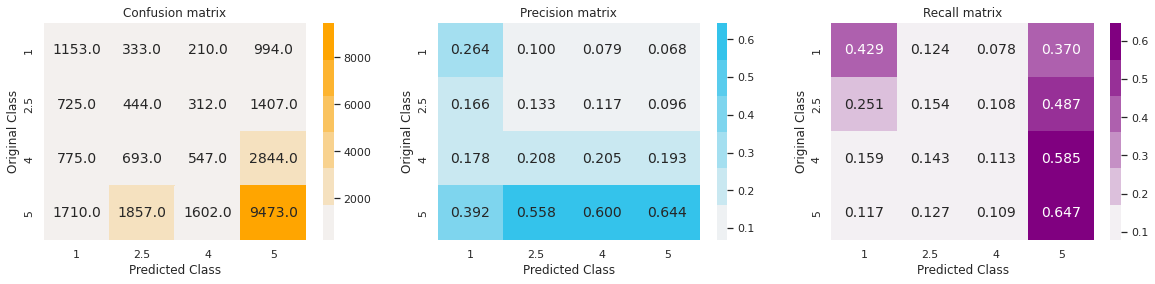

In [ ]:
plot_confusion_matrix(y_test, undersample_pipe_lr.predict(X_test))

In [ ]:
undersample_pipe_lr_Prediction = undersample_pipe_lr.predict(X_train)
forest_mse = mean_squared_error(y_train, undersample_pipe_lr_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.437395409448758


Hyperparameter tuning

In [ ]:
undersample_pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'randomundersampler', 'pipeline', 'randomundersampler__random_state', 'randomundersampler__replacement', 'randomundersampler__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__lr', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__lr__C', 'pipeline__lr__class_weight', 'pipeline__lr__dual', 'pipeline__lr__fit_intercept', 'pipeline__lr__intercept_scaling', 'pipeline__lr__l1_ratio', 'pipeline__lr__max_iter', 'pipeline__lr__multi_class', 'pipeline__lr__n_jobs', 'pipeline__lr__penalty', 'pipeline__lr__random_state', 'pipeline__lr__solver', 'pipeline__lr__tol', 'pipeline__lr__verbose', 'pipeline__lr__warm_sta

In [ ]:
param_grid={'pipeline__lr__C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(undersample_pipe_lr, param_grid, cv=sk_folds)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

{'pipeline__lr__C': 0.1}
0.46899796642609354


In [ ]:
#model
clf_lr = GridSearchCV(estimator=undersample_pipe_lr,param_grid={'pipeline__lr__C': [0.1]},cv=sk_folds, verbose=True,return_train_score=True)
clf_lr.fit(X_train,y_train)


#predicted value of y
y_pred_train_lr = clf_lr.predict(X_train)
y_pred_test_lr = clf_lr.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

In [ ]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           1       0.27      0.43      0.33      2690
         2.5       0.15      0.10      0.12      2888
           4       0.19      0.19      0.19      4859
           5       0.65      0.62      0.63     14642

    accuracy                           0.46     25079
   macro avg       0.31      0.33      0.32     25079
weighted avg       0.46      0.46      0.45     25079



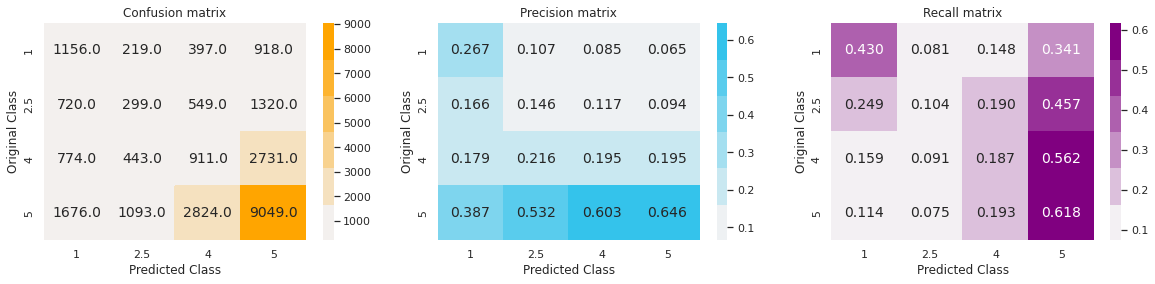

In [ ]:
plot_confusion_matrix(y_test, y_pred_test_lr)

In [ ]:
forest_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
forest_rmse_lr = np.sqrt(forest_mse_lr)
print('error = ',forest_rmse_lr)

error =  1.403613126956935


## Imbalance learning - Over sampling

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_train_SMOTE.shape)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


(75803, 50)
(176372, 50)


In [ ]:
y_train_SMOTE.value_counts()

1      44093
2.5    44093
4      44093
5      44093
Name: review_score, dtype: int64

### Model 1: RF

In [ ]:
SMOTE_pipe_RF = make_imb_pipeline(SMOTE, pipe_RF)
SMOTE_pipe_RF.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('pipeline',
                 Pipeline(steps=[('ct',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std',
                                                                   StandardScaler(),
                                                                   ['Cost_per_delivery_size',
                                                                    'freight_value',
                                                                    'freight_value_per_product',
                                                                    'packing_density',
                                                                    'payment_value',
                                                                    'price',
                                                                    'product_description_lenght',
                     

In [ ]:
print(classification_report(y_test, SMOTE_pipe_RF.predict(X_test)))

              precision    recall  f1-score   support

           1       0.35      0.36      0.35      2690
         2.5       0.19      0.17      0.18      2888
           4       0.25      0.19      0.21      4859
           5       0.65      0.72      0.68     14642

    accuracy                           0.51     25079
   macro avg       0.36      0.36      0.36     25079
weighted avg       0.49      0.51      0.50     25079



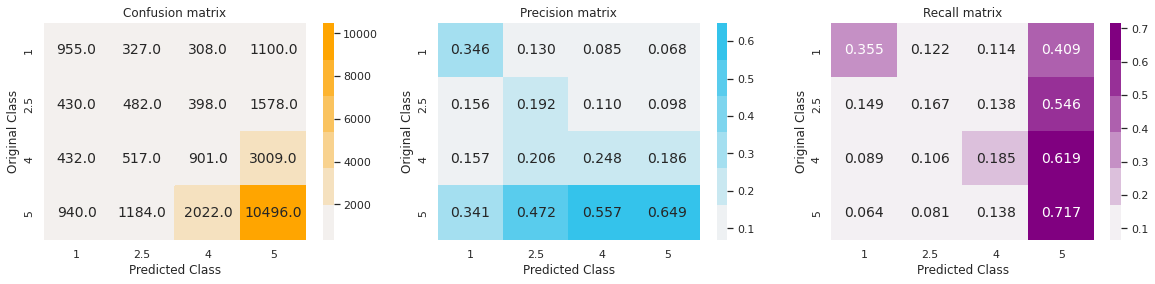

In [ ]:
plot_confusion_matrix(y_test, SMOTE_pipe_RF.predict(X_test))

In [ ]:
SMOTE_pipe_RF_Prediction = SMOTE_pipe_RF.predict(X_train)
forest_mse = mean_squared_error(y_train, SMOTE_pipe_RF_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  0.09590716745068045


Hyperparameter tuning

In [ ]:
SMOTE_pipe_RF.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'pipeline', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__RF', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__RF__bootstrap', 'pipeline__RF__ccp_alpha', 'pipeline__RF__class_weight', 'pipeline__RF__criterion', 'pipeline__RF__max_depth', 'pipeline__RF__max_features', 'pipeline__RF__max_leaf_nodes', 'pipeline__RF__max_samples', 'pipeline__RF__min_impurity_decrease', 'pipeline__RF__min_samples_leaf', 'pipeline__RF__min_samples_split', 'pipeline__RF__min_weight_fraction_leaf', 'pipeline__RF__n_estimators', 'pipeline__RF__n

In [ ]:
#hyper parameters
parameters = {'pipeline__RF__max_depth':  [10,15,20], 'pipeline__RF__min_samples_split': [100, 300,500]}

sk_folds = StratifiedKFold(n_splits = 5)

#Grid search CV
SMOTE_RF = GridSearchCV(estimator=SMOTE_pipe_RF,param_grid=parameters)
SMOTE_RF.fit(X_train, y_train)

#Now we are using print statements to print the results. It will give the values of hyperparameters as a result.

#print("Best Number Of Components:", DT.best_estimator_.get_params()["pca__n_components"])
print(SMOTE_RF.best_estimator_.get_params()["pipeline"])
CV_Result = cross_val_score(SMOTE_RF, X_train, y_train, cv=sk_folds, n_jobs=-1, scoring="accuracy")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['Cost_per_delivery_size',
                                                   'freight_value',
                                                   'freight_value_per_product',
                                                   'packing_density',
                                                   'payment_value', 'price',
                                                   'product_description_lenght',
                                                   'product_name_lenght',
                                                   'product_weight_g'])])),
                ('RF',
                 RandomForestClassifier(max_depth=20, min_samples_split=100))])
[0.67192138 0.67330651 0.67007453 0.67915567 0.67816623]
0.6745248640841599
0.0035432156800164686


In [ ]:
#model
clf_RF = GridSearchCV(estimator=SMOTE_pipe_RF,param_grid={'pipeline__RF__max_depth':[20], 'pipeline__RF__min_samples_split': [100]},cv=sk_folds, verbose=True,return_train_score=True)
clf_RF.fit(X_train,y_train)

#predicted value of y
y_pred_train_RF = clf_RF.predict(X_train)
y_pred_test_RF = clf_RF.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

In [ ]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           1       0.32      0.39      0.35      2690
         2.5       0.17      0.15      0.16      2888
           4       0.22      0.14      0.17      4859
           5       0.64      0.70      0.67     14642

    accuracy                           0.50     25079
   macro avg       0.34      0.35      0.34     25079
weighted avg       0.47      0.50      0.48     25079



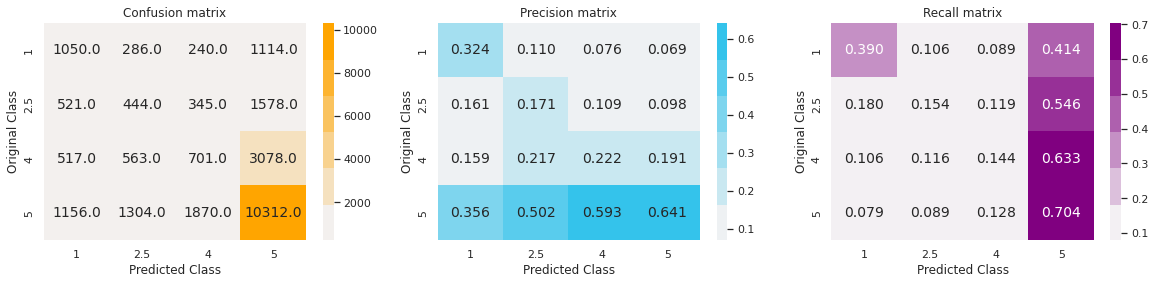

In [ ]:
plot_confusion_matrix(y_test, y_pred_test_RF)

In [ ]:
forest_mse_RF = mean_squared_error(y_train, y_pred_train_RF)
forest_rmse_RF = np.sqrt(forest_mse_RF)
print('error = ',forest_rmse_RF)

error =  1.2172872790444718


### Model 2: KNN

In [ ]:
SMOTE_pipe_KNN = make_imb_pipeline(SMOTE, pipe_KNN)
SMOTE_pipe_KNN.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('pipeline',
                 Pipeline(steps=[('ct',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std',
                                                                   StandardScaler(),
                                                                   ['Cost_per_delivery_size',
                                                                    'freight_value',
                                                                    'freight_value_per_product',
                                                                    'packing_density',
                                                                    'payment_value',
                                                                    'price',
                                                                    'product_description_lenght',
                     

In [ ]:
print(classification_report(y_test, SMOTE_pipe_KNN.predict(X_test)))

              precision    recall  f1-score   support

           1       0.24      0.46      0.31      2690
         2.5       0.14      0.33      0.19      2888
           4       0.22      0.33      0.27      4859
           5       0.67      0.25      0.37     14642

    accuracy                           0.30     25079
   macro avg       0.32      0.34      0.28     25079
weighted avg       0.48      0.30      0.32     25079



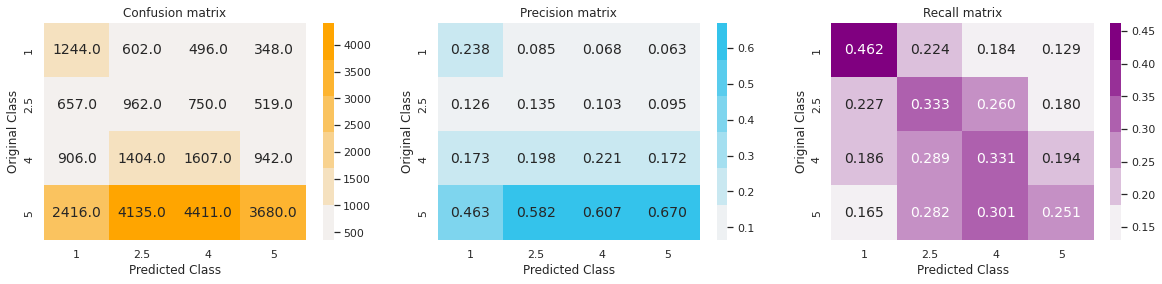

In [ ]:
plot_confusion_matrix(y_test, SMOTE_pipe_KNN.predict(X_test))

In [ ]:
SMOTE_pipe_KNN_Prediction = SMOTE_pipe_KNN.predict(X_train)
forest_mse = mean_squared_error(y_train, SMOTE_pipe_KNN_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.5715209133455854


####Hyperparameter tuning

In [ ]:
SMOTE_pipe_KNN.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'pipeline', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__KNN', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__KNN__algorithm', 'pipeline__KNN__leaf_size', 'pipeline__KNN__metric', 'pipeline__KNN__metric_params', 'pipeline__KNN__n_jobs', 'pipeline__KNN__n_neighbors', 'pipeline__KNN__p', 'pipeline__KNN__weights'])

In [ ]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(3,30,2))

#Convert to dictionary
hyperparameters = dict(pipeline__KNN__n_neighbors=n_neighbors)

#Use GridSearch
clf_knn = GridSearchCV(SMOTE_pipe_KNN, hyperparameters, cv=sk_folds)

#Fit the model
best_model = clf_knn.fit(X_train,y_train)

#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['pipeline__KNN__n_neighbors'])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

Best n_neighbors: 29


In [ ]:
#model
clf_knn = GridSearchCV(estimator=undersample_pipe_KNN,param_grid={'pipeline__KNN__n_neighbors': [29]},cv=sk_folds, verbose=True,return_train_score=True)
clf_knn.fit(X_train,y_train)


#predicted value of y
y_pred_train_knn = clf_knn.predict(X_train)
y_pred_test_knn = clf_knn.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

In [ ]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           1       0.21      0.36      0.27      2690
         2.5       0.12      0.26      0.17      2888
           4       0.21      0.30      0.24      4859
           5       0.62      0.31      0.41     14642

    accuracy                           0.31     25079
   macro avg       0.29      0.31      0.27     25079
weighted avg       0.44      0.31      0.34     25079



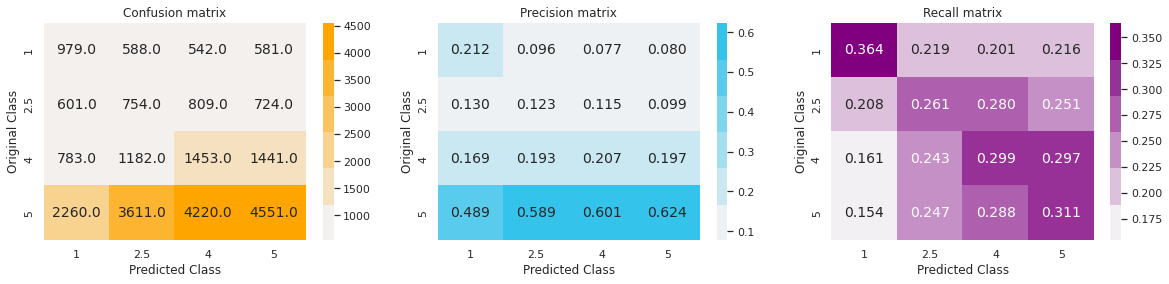

In [ ]:
plot_confusion_matrix(y_test, y_pred_test_knn)

In [ ]:
forest_mse_KNN = mean_squared_error(y_train, y_pred_train_knn)
forest_rmse_KNN = np.sqrt(forest_mse_RF)
print('error = ',forest_rmse_KNN)

error =  1.2172872790444718


### Model 3: Logistic regression

In [ ]:
SMOTE_pipe_lr = make_imb_pipeline(SMOTE, pipe_lr)
SMOTE_pipe_lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('pipeline',
                 Pipeline(steps=[('ct',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('std',
                                                                   StandardScaler(),
                                                                   ['Cost_per_delivery_size',
                                                                    'freight_value',
                                                                    'freight_value_per_product',
                                                                    'packing_density',
                                                                    'payment_value',
                                                                    'price',
                                                                    'product_description_lenght',
                     

In [ ]:
print(classification_report(y_test, SMOTE_pipe_lr.predict(X_test)))

              precision    recall  f1-score   support

           1       0.26      0.36      0.30      2690
         2.5       0.16      0.08      0.11      2888
           4       0.19      0.11      0.14      4859
           5       0.63      0.74      0.68     14642

    accuracy                           0.50     25079
   macro avg       0.31      0.32      0.31     25079
weighted avg       0.45      0.50      0.47     25079



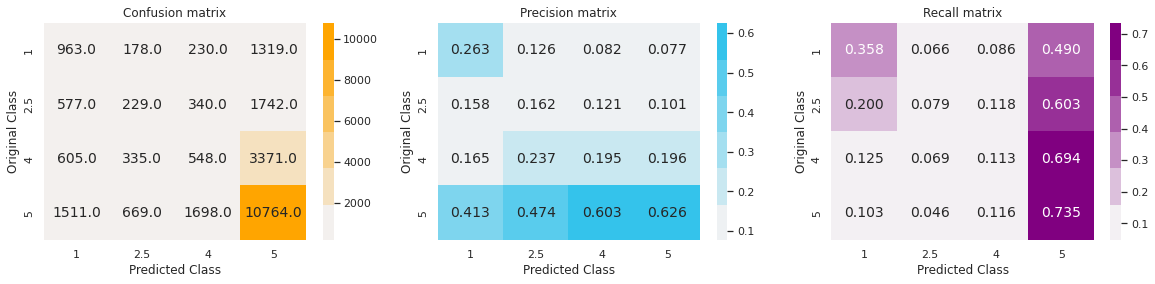

In [ ]:
plot_confusion_matrix(y_test, SMOTE_pipe_lr.predict(X_test))

In [ ]:
SMOTE_pipe_lr_Prediction = SMOTE_pipe_lr.predict(X_train)
forest_mse = mean_squared_error(y_train, SMOTE_pipe_lr_Prediction)
forest_rmse = np.sqrt(forest_mse)
print('error = ',forest_rmse)

error =  1.4197855231538736


Hyperparameter tuning

In [ ]:
SMOTE_pipe_lr.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'smote', 'pipeline', 'smote__k_neighbors', 'smote__n_jobs', 'smote__random_state', 'smote__sampling_strategy', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__ct', 'pipeline__lr', 'pipeline__ct__n_jobs', 'pipeline__ct__remainder', 'pipeline__ct__sparse_threshold', 'pipeline__ct__transformer_weights', 'pipeline__ct__transformers', 'pipeline__ct__verbose', 'pipeline__ct__verbose_feature_names_out', 'pipeline__ct__std', 'pipeline__ct__std__copy', 'pipeline__ct__std__with_mean', 'pipeline__ct__std__with_std', 'pipeline__lr__C', 'pipeline__lr__class_weight', 'pipeline__lr__dual', 'pipeline__lr__fit_intercept', 'pipeline__lr__intercept_scaling', 'pipeline__lr__l1_ratio', 'pipeline__lr__max_iter', 'pipeline__lr__multi_class', 'pipeline__lr__n_jobs', 'pipeline__lr__penalty', 'pipeline__lr__random_state', 'pipeline__lr__solver', 'pipeline__lr__tol', 'pipeline__lr__verbose', 'pipeline__lr__warm_start'])

In [ ]:
param_grid={'pipeline__lr__C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(undersample_pipe_lr, param_grid, cv=sk_folds)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

{'pipeline__lr__C': 10}
0.4519318952111328


In [ ]:
#model
clf_lr = GridSearchCV(estimator=undersample_pipe_lr,param_grid={'pipeline__lr__C': [10]},cv=sk_folds, verbose=True,return_train_score=True)
clf_lr.fit(X_train,y_train)


#predicted value of y
y_pred_train_lr = clf_lr.predict(X_train)
y_pred_test_lr = clf_lr.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:624: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/uti

In [ ]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           1       0.25      0.37      0.30      2690
         2.5       0.16      0.12      0.13      2888
           4       0.19      0.20      0.20      4859
           5       0.64      0.61      0.63     14642

    accuracy                           0.45     25079
   macro avg       0.31      0.33      0.31     25079
weighted avg       0.46      0.45      0.45     25079



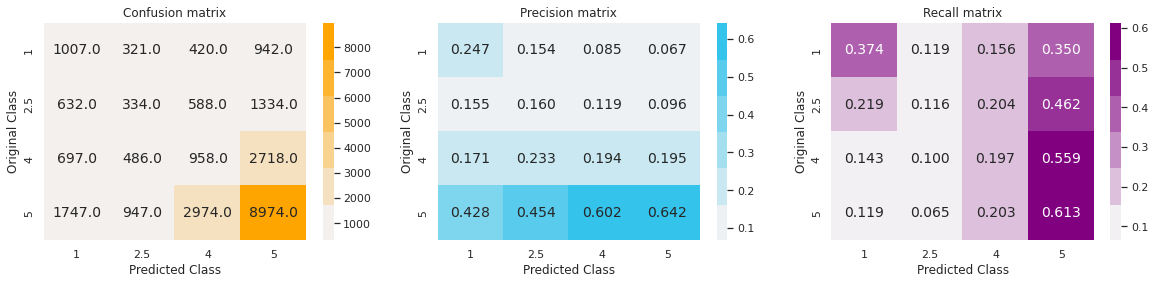

In [ ]:
plot_confusion_matrix(y_test, y_pred_test_lr)

In [ ]:
forest_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
forest_rmse_lr = np.sqrt(forest_mse_lr)
print('error = ',forest_rmse_lr)

error =  1.4252570287440258
